In [ ]:
pip install jupyternotify

In [38]:
%load_ext jupyternotify

<IPython.core.display.Javascript object>

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import scipy
import os    
import re
import math
from array import array
import openpyxl

In [2]:
apparentmag_u = []
apparentmag_g = []
apparentmag_r = []
apparentmag_i = []
apparentmag_z = []
absolutemag_u = []
absolutemag_g = []
absolutemag_r = []
absolutemag_i = []
absolutemag_z = []
df = pd.DataFrame()

In [31]:
data = pd.read_excel('/Users/alanroden/Documents/SDSSQuasarData.xlsx')

Text(0, 0.5, 'Number')

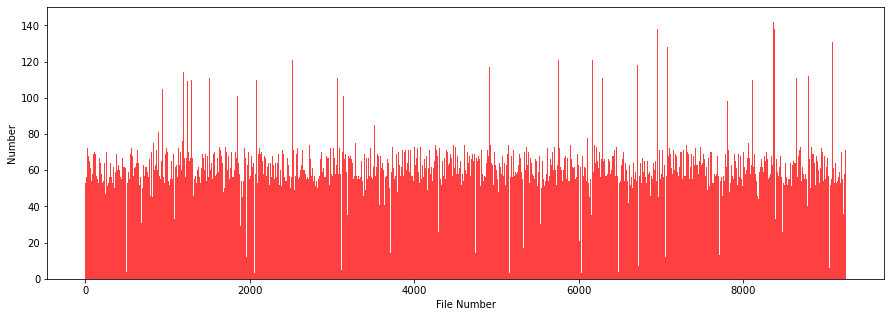

In [32]:
#Finding the distribution of observations
filenums = data['File Number']

plt.figure(figsize = (15,5))
plt.hist(filenums, bins=9258, color='r', alpha=0.75)
#plt.axvline(np.mean(u_amp_var),color='b', linestyle='solid', linewidth=1.5, label = 'u-band mean= '+ str(round(np.mean(u_amp_var), 3)))
plt.xlabel("File Number")
plt.ylabel("Number")

In [33]:
u = data['u-band mag']
g = data['g-band mag']
r = data['r-band mag']
i = data['i-band mag']
z = data['z-band mag']

In [34]:
apparentmag_u = lists_u
apparentmag_g = lists_g
apparentmag_r = lists_r
apparentmag_i = lists_i
apparentmag_z = lists_z

apparentmag_u = [i * 2 for i in lists_u]
print(lists_u[34])
print(apparentmag_u[34])


NameError: name 'lists_u' is not defined

In [35]:
apparentmag_u = [i for i in u if i > 0] #getting rid of -99.99 values
apparentmag_g = [i for i in g if i > 0]
apparentmag_r = [i for i in r if i > 0]
apparentmag_i = [i for i in i if i > 0]
apparentmag_z = [i for i in z if i > 0]

for u in apparentmag_u:
    absolutemag_u.append(10**(-0.4*u))
for g in apparentmag_g:
    absolutemag_g.append(10**(-0.4*g))
for r in apparentmag_r:
    absolutemag_r.append(10**(-0.4*r))
for i in apparentmag_i:
    absolutemag_i.append(10**(-0.4*i))
for z in apparentmag_z:
    absolutemag_z.append(10**(-0.4*z))

In [8]:
Nu = len(absolutemag_u)
Ng = len(absolutemag_g)
Nr = len(absolutemag_r)
Ni = len(absolutemag_i)
Nz = len(absolutemag_z)
print('N for u:', Nu)
print('N for g:', Ng)
print('N for r:', Nr)
print('N for i:', Ni)
print('N for z:', Nz)

N for u: 535708
N for g: 548642
N for r: 560392
N for i: 558808
N for z: 551577


In [39]:
#Getting each file number and the number of observations into different lists
filenums_edited = []

n = 9258
targetnums = [[] for _ in range(n)]

#filenums = data['File Number']
for i in range(0, 9258):
    for j in filenums:
        if i == j:
            targetnums[i].append(j)

In [40]:
#Finding how many files have less than 40 observations
little = []
for i in range(9258):
    if len(targetnums[i]) < 40:
        little.append(targetnums[i])
        print(targetnums[i])
        print(len(targetnums[i]))
        print()
print(len(little))

[5, 5, 5, 5, 5, 5, 5]
7

[12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12]
20

[28, 28, 28, 28, 28, 28, 28, 28, 28, 28]
10

[30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30]
27

[40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40]
24

[64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64]
39

[67, 67, 67, 67]
4

[114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114]
28

[122, 122, 122, 122, 122, 122, 122, 122, 122, 122, 122, 122, 122, 122, 122, 122, 122, 122, 122, 122, 122, 122, 122, 122, 122, 122, 122, 122, 122, 122, 122, 122, 122, 122, 122, 122, 122, 122, 122]
39

[178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178,

In [41]:
#Removed targets that have less than 40 observations and added the good 
targets = []
for i in targetnums:
    if len(i) >= 40:
        targets.append(i)
        

In [42]:
alltargets = [i for j in targets for i in j]


In [43]:
#Creating lists containing data and putting those two lists together
#allows to assign a mag to a target number
file = [j for j in alltargets]
u = [i for i in data['u-band mag']]
g = [i for i in data['g-band mag']]
r = [i for i in data['r-band mag']]
i = [i for i in data['i-band mag']]
z = [i for i in data['z-band mag']]

u_zip = zip(file, u)
g_zip = zip(file, g)
r_zip = zip(file, r)
i_zip = zip(file, i)
z_zip = zip(file, z)

u_list = []
for i in u_zip:
    u_list.append(i)

g_list = []
for i in g_zip:
    g_list.append(i)
    
r_list = []
for i in r_zip:
    r_list.append(i)
    
i_list = []
for i in i_zip:
    i_list.append(i)
    
z_list = []
for i in z_zip:
    z_list.append(i)

In [44]:
#steps to get to next code (checking)
n = 9258
lists_u = [[] for _ in range(n)]
lists_g = [[] for _ in range(n)]
lists_r = [[] for _ in range(n)]
lists_i = [[] for _ in range(n)]
lists_z = [[] for _ in range(n)]


for file,mag in u_list:
    if file == 1 and 3 < mag < 30:
        abs_mag = 10**(-0.4*mag)
        lists_u[1].append(abs_mag)
        
print(lists_u[1])

[1.4047531026968764e-08, 1.0232929922807516e-08, 1.4203651240480122e-08, 1.4900471117870978e-08, 1.0944602678150774e-08, 1.0597416418830951e-08, 1.3589391171007972e-08, 1.2033722711826848e-08, 9.981596274917245e-09, 1.0804383723712297e-08, 1.1386755619502084e-08, 1.163054323328467e-08, 9.709570065288237e-09, 1.0027669229965868e-08, 8.340651974086643e-09, 9.745407417663052e-09, 9.298223905853789e-09, 8.72569442770115e-09, 1.0365732567670052e-08, 1.0529312128434398e-08, 1.2359474334445095e-08, 1.0665961212302568e-08, 9.576349769692675e-09, 1.085425449306823e-08, 1.103570289964014e-08, 1.0111137119549057e-08, 9.086570489581444e-09, 9.835580562269554e-09, 9.212977276685544e-09, 1.0413578615284342e-08, 9.682778562612466e-09, 9.281111710201665e-09, 8.340651974086643e-09, 9.306791831626531e-09, 8.879734893257655e-09, 7.663020722739184e-09, 9.594006315159316e-09, 8.814547044472212e-09, 9.826525828295316e-09, 9.003264310597219e-09, 8.863392873279329e-09, 9.629417129715539e-09, 8.379150674384088

HERE BEGINS APPARENT MAGNITUDE -- SKIP TO ABSOLUTE

In [15]:
%%time
#separate by target, putting mags into lists depending on target, apparent magnitude
#U-BAND
for i in range(0, 9258):
    for file,mag in u_list:
        if file == i and 3 < mag < 30:
            lists_u[i].append(mag)
        elif file != i:
            pass
    

CPU times: user 9min 2s, sys: 1.85 s, total: 9min 3s
Wall time: 9min 8s


In [16]:
%%time
#separate by target, putting mags into lists depending on target, apparent magnitude
#G-BAND
for i in range(0, 9258):
    for file,mag in g_list:
        if file == i and 3 < mag < 30:
            lists_g[i].append(mag)
        elif file != i:
            pass
    

CPU times: user 9min, sys: 1.24 s, total: 9min 2s
Wall time: 9min 5s


In [17]:
%%time
#separate by target, putting mags into lists depending on target, apparent magnitude
#R-BAND
for i in range(0, 9258):
    for file,mag in r_list:
        if file == i and 3 < mag < 30:
            lists_r[i].append(mag)
        elif file != i:
            pass
    

CPU times: user 8min 36s, sys: 850 ms, total: 8min 36s
Wall time: 8min 38s


In [18]:
%%time
#separate by target, putting mags into lists depending on target, apparent magnitude
#I-BAND
for i in range(0, 9258):
    for file,mag in i_list:
        if file == i and 3 < mag < 30:
            lists_i[i].append(mag)
        elif file != i:
            pass
    

CPU times: user 8min 34s, sys: 1 s, total: 8min 35s
Wall time: 8min 38s


In [19]:
%%time
#separate by target, putting mags into lists depending on target, apparent magnitude
#Z-BAND
for i in range(0, 9258):
    for file,mag in z_list:
        if file == i and 3 < mag < 30:
            lists_z[i].append(mag)
        elif file != i:
            pass
    

CPU times: user 9min 54s, sys: 3.21 s, total: 9min 57s
Wall time: 1h 9min 18s


In [45]:
#converting apparent magnitude into absolute
n = 9258
lists_u_abs = [[] for _ in range(n)]
lists_g_abs = [[] for _ in range(n)]
lists_r_abs = [[] for _ in range(n)]
lists_i_abs = [[] for _ in range(n)]
lists_z_abs = [[] for _ in range(n)]

In [46]:
%%time
#doing the same thing as before with the apparent magnitude, but now converting to absolute mag
#separate by target, putting mags into lists depending on target
#U-BAND
for i in range(0, 9258):
    for file,mag in u_list:
        if file == i and 3 < mag < 30:
            abs_mag = 10**(-0.4*mag)
            lists_u_abs[i].append(abs_mag)
        elif file != i:
            pass

CPU times: user 9min 25s, sys: 6.88 s, total: 9min 32s
Wall time: 9min 50s


In [47]:
%%time
#doing the same thing as before with the apparent magnitude, but now converting to absolute mag
#separate by target, putting mags into lists depending on target
#G-BAND
for i in range(0, 9258):
    for file,mag in g_list:
        if file == i and 3 < mag < 30:
            abs_mag = 10**(-0.4*mag)
            lists_g_abs[i].append(abs_mag)
        elif file != i:
            pass

CPU times: user 8min 45s, sys: 3.3 s, total: 8min 48s
Wall time: 8min 56s


In [48]:
%%time
#doing the same thing as before with the apparent magnitude, but now converting to absolute mag
#separate by target, putting mags into lists depending on target
#R-BAND
for i in range(0, 9258):
    for file,mag in r_list:
        if file == i and 3 < mag < 30:
            abs_mag = 10**(-0.4*mag)
            lists_r_abs[i].append(abs_mag)
        elif file != i:
            pass

CPU times: user 9min 32s, sys: 7.93 s, total: 9min 40s
Wall time: 9min 57s


In [49]:
%%time
#doing the same thing as before with the apparent magnitude, but now converting to absolute mag
#separate by target, putting mags into lists depending on target
#I-BAND
for i in range(0, 9258):
    for file,mag in i_list:
        if file == i and 3 < mag < 30:
            abs_mag = 10**(-0.4*mag)
            lists_i_abs[i].append(abs_mag)
        elif file != i:
            pass

CPU times: user 9min 37s, sys: 7.16 s, total: 9min 44s
Wall time: 10min 3s


In [50]:
%%time
#doing the same thing as before with the apparent magnitude, but now converting to absolute mag
#separate by target, putting mags into lists depending on target
#Z-BAND
for i in range(0, 9258):
    for file,mag in z_list:
        if file == i and 3 < mag < 30:
            abs_mag = 10**(-0.4*mag)
            lists_z_abs[i].append(abs_mag)
        elif file != i:
            pass

CPU times: user 9min 33s, sys: 6.93 s, total: 9min 40s
Wall time: 9min 56s


In [75]:
for i in lists_u_abs:
    if i == []:
        lists_u_abs.remove(i)
        
for i in lists_g_abs:
    if i == []:
        lists_g_abs.remove(i)
        
for i in lists_r_abs:
    if i == []:
        lists_r_abs.remove(i)
        
for i in lists_i_abs:
    if i == []:
        lists_i_abs.remove(i)
        
for i in lists_z_abs:
    if i == []:
        lists_z_abs.remove(i)


In [76]:
#create average of files in each target for each band
lists_u_av = []
lists_u_std = []
for i in range(0, 8855):
    u_av = np.mean(lists_u_abs[i])
    u_std = np.std(lists_u_abs[i])
    lists_u_av.append(u_av)
    lists_u_std.append(u_std)

lists_g_av = []
lists_g_std = []
for i in range(0, 8855):
    g_av = np.mean(lists_g_abs[i])
    g_std = np.std(lists_g_abs[i])
    lists_g_av.append(g_av)
    lists_g_std.append(g_std)

lists_r_av = []
lists_r_std = []
for i in range(0, 8855):
    r_av = np.mean(lists_r_abs[i])
    r_std = np.std(lists_r_abs[i])
    lists_r_av.append(r_av)
    lists_r_std.append(r_std)
    
lists_i_av = []
lists_i_std = []
for i in range(0, 8855):
    i_av = np.mean(lists_i_abs[i])
    i_std = np.std(lists_i_abs[i])
    lists_i_av.append(i_av)
    lists_i_std.append(i_std)
    
lists_z_av = []
lists_z_std = []
for i in range(0, 8855):
    z_av = np.mean(lists_z_abs[i])
    z_std = np.std(lists_z_abs[i])
    lists_z_av.append(z_av)
    lists_z_std.append(z_std)

#df_u = pd.DataFrame(lists_u_av)
#print(df_u)
#df_u.to_excel("SDSSQuasarData.xlsx", sheet_name='Sheet_name2', columns=18)

In [77]:
u_amp_var = []
for i in range(0, 8855):
    u_amp_var.append(lists_u_std[i] / lists_u_av[i])
    
g_amp_var = []
for i in range(0, 8855):
    g_amp_var.append(lists_g_std[i] / lists_g_av[i])

r_amp_var = []
for i in range(0, 8855):
    r_amp_var.append(lists_r_std[i] / lists_r_av[i])
    
i_amp_var = []
for i in range(0, 8855):
    i_amp_var.append(lists_i_std[i] / lists_i_av[i])
    
z_amp_var = []
for i in range(0, 8855):
    z_amp_var.append(lists_z_std[i] / lists_z_av[i])

In [78]:
print(np.mean(u_amp_var))
print(np.mean(g_amp_var))
print(np.mean(r_amp_var))
print(np.mean(i_amp_var))
print(np.mean(z_amp_var))

0.4239367817043411
0.3427764643669618
0.3150077129830425
0.30597846549702906
0.32317840776734513


In [79]:
u_g_ratio = []
u_r_ratio = []
u_i_ratio = []
u_z_ratio = []
g_u_ratio = []
g_r_ratio = []
g_i_ratio = []
g_z_ratio = []
r_u_ratio = []
r_g_ratio = []
r_i_ratio = []
r_z_ratio = []
i_u_ratio = []
i_g_ratio = []
i_r_ratio = []
i_z_ratio = []
z_u_ratio = []
z_g_ratio = []
z_r_ratio = []
z_i_ratio = []
for j in range(0, 8855):
    u_g_ratio.append(u_amp_var[j] / g_amp_var[j])
    u_r_ratio.append(u_amp_var[j] / r_amp_var[j])
    u_i_ratio.append(u_amp_var[j] / i_amp_var[j])
    u_z_ratio.append(u_amp_var[j] / z_amp_var[j])
    g_u_ratio.append(g_amp_var[j] / u_amp_var[j])
    g_r_ratio.append(g_amp_var[j] / r_amp_var[j])
    g_i_ratio.append(g_amp_var[j] / i_amp_var[j])
    g_z_ratio.append(g_amp_var[j] / z_amp_var[j])
    r_u_ratio.append(r_amp_var[j] / u_amp_var[j])
    r_g_ratio.append(r_amp_var[j] / g_amp_var[j])
    r_i_ratio.append(r_amp_var[j] / i_amp_var[j])
    r_z_ratio.append(r_amp_var[j] / z_amp_var[j])
    i_u_ratio.append(i_amp_var[j] / u_amp_var[j])
    i_g_ratio.append(i_amp_var[j] / g_amp_var[j])
    i_r_ratio.append(i_amp_var[j] / r_amp_var[j])
    i_z_ratio.append(i_amp_var[j] / z_amp_var[j])
    z_u_ratio.append(z_amp_var[j] / u_amp_var[j])
    z_g_ratio.append(z_amp_var[j] / g_amp_var[j])
    z_r_ratio.append(z_amp_var[j] / r_amp_var[j])
    z_i_ratio.append(z_amp_var[j] / i_amp_var[j])   

In [80]:
#Finding overall ratios of amplitude

print(np.mean(u_g_ratio))
print(np.mean(u_r_ratio))
print(np.mean(u_i_ratio))
print(np.mean(u_z_ratio))
print()
print(np.mean(g_u_ratio))
print(np.mean(g_r_ratio))
print(np.mean(g_i_ratio))
print(np.mean(g_z_ratio))
print()
print(np.mean(r_u_ratio))
print(np.mean(r_g_ratio))
print(np.mean(r_i_ratio))
print(np.mean(r_z_ratio))
print()
print(np.mean(i_u_ratio))
print(np.mean(i_g_ratio))
print(np.mean(i_r_ratio))
print(np.mean(i_z_ratio))
print()
print(np.mean(z_u_ratio))
print(np.mean(z_g_ratio))
print(np.mean(z_r_ratio))
print(np.mean(z_i_ratio))

1.4543276536238998
1.7300342539964095
1.8292960467517292
1.578862876237968

0.8694613649672531
1.1818944690125963
1.2713962866664033
1.13620911520854

0.8235966281381675
0.9512357919225912
1.0820531264925275
0.9913325034134766

0.8064272282822321
0.9397100672759122
1.000371271767309
0.9276005222359891

0.8993494074029817
1.0700525017511495
1.1642607589322043
1.1763875031984077


In [2]:
#combining all lists and putting them together and creating a dataframe
all_analysis = []
for i in zip(texts1, u_rest, g_rest, r_rest, i_rest, z_rest, lists_u_av, lists_g_av, lists_r_av, lists_i_av, lists_z_av, lists_u_std, lists_g_std, lists_r_std, lists_i_std, lists_z_std, u_amp_var, g_amp_var, r_amp_var, i_amp_var, z_amp_var,u_g_ratio, u_r_ratio, u_i_ratio, u_z_ratio, g_u_ratio, g_r_ratio, g_i_ratio, g_z_ratio, r_u_ratio, r_g_ratio, r_i_ratio, r_z_ratio, i_u_ratio, i_g_ratio, i_r_ratio, i_z_ratio, z_u_ratio, z_g_ratio, z_r_ratio, z_i_ratio, redshifts, bh_masses, bo_luminosities):
    all_analysis.append(i)
df_analysis = pd.DataFrame(all_analysis)

NameError: name 'texts1' is not defined

In [1]:
print(df_analysis)

NameError: name 'df_analysis' is not defined

In [305]:
#exporting to excel
df_analysis.to_excel("SDSSQuasarDatas1.xlsx", sheet_name='Sheet_name1')

## Creating Light Curves and SDSS Data Plots

ValueError: x and y must have same first dimension, but have shapes (0,) and (56,)

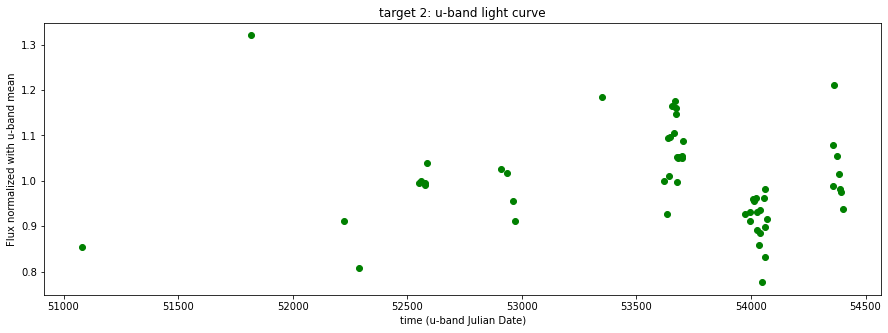

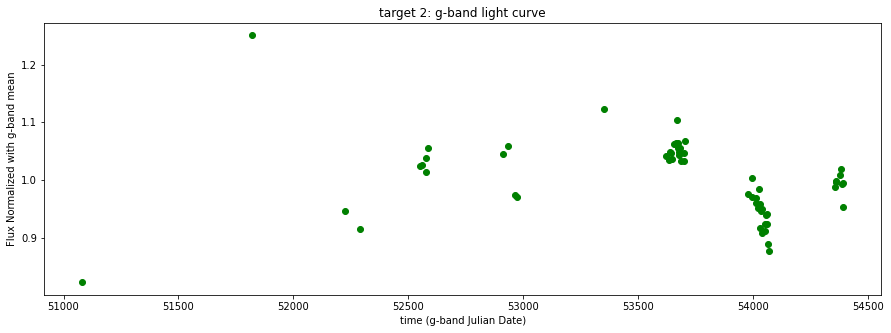

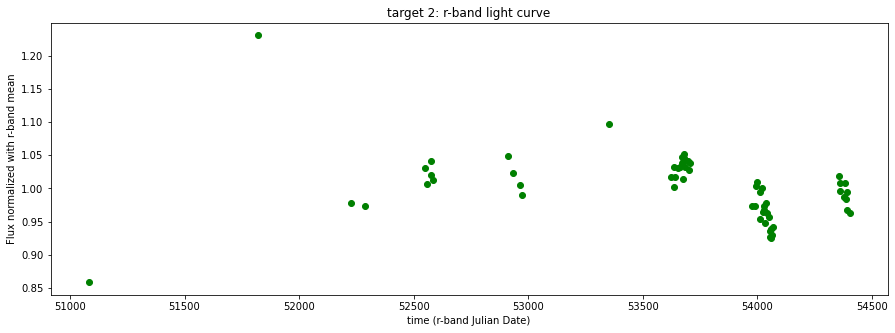

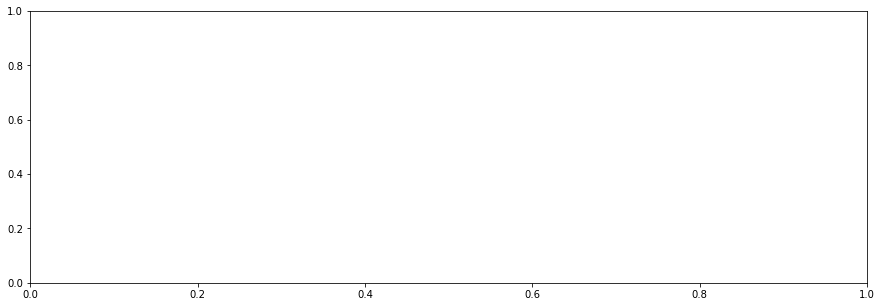

In [81]:
#SDSS Light Curves

#Creating lists containing data and putting those two lists together
#allows to assign a mag to a target number
u_time_list = []
g_time_list = []
r_time_list = []
i_time_list = []
z_time_list = []

file = [j for j in data['File Number']]
u = [i for i in data['u-band mag']]
g = [i for i in data['g-band mag']]
r = [i for i in data['r-band mag']]
i = [i for i in data['i-band mag']]
z = [i for i in data['z-band mag']]

u_time = [i for i in data['u-band Julian Data']]
g_time = [i for i in data['g-band Julian Data']]
r_time = [i for i in data['r-band Julian Data']]
i_time = [i for i in data['i-band Julian Data']]
z_time = [i for i in data['z-band Julian Data']]

'''
u_list = list(zip(file, u))
g_list = list(zip(file, g))
r_list = list(zip(file, r))
i_list = list(zip(file, i))
z_list = list(zip(file, z))
'''

for i in zip(file, u_time, u):
    u_time_list.append(i)
for i in zip(file, g_time, g):
    g_time_list.append(i)
for i in zip(file, r_time, r):
    r_time_list.append(i)
for i in zip(file, i_time, i):
    i_time_list.append(i)
for i in zip(file, z_time, z):
    z_time_list.append(i)

n = 9258
curve_u = [[] for _ in range(n)]
curve_g = [[] for _ in range(n)]
curve_r = [[] for _ in range(n)]
curve_i = [[] for _ in range(n)]
curve_z = [[] for _ in range(n)]

targ = 2
for file,time,mag in u_time_list:
    if file == targ and 3 < mag < 30:
        curve_u[targ].append(time)
for file,time,mag in g_time_list:
    if file == targ and 3 < mag < 30:
        curve_g[targ].append(time)
for file,time,mag in r_time_list:
    if file == targ and 3 < mag < 30:
        curve_r[targ].append(time)
for file,time,mag in i_time_list:
    if file == targ and 3 < mag < 30:
        curve_i[targ].append(time)
for file,time,mag in z_time_list:
    if file == targ and 3 < mag < 30:
        curve_z[targ].append(time)

#plotting light curves
plt.figure(figsize = (15,5))
plt.plot(curve_u[targ], lists_u_abs[targ]/lists_u_av[targ], marker='o',linestyle='None', color='g')
plt.xlabel('time (u-band Julian Date)')
plt.ylabel('Flux normalized with u-band mean')   
plt.title("target 2: u-band light curve")

plt.figure(figsize = (15,5))
plt.plot(curve_g[targ], lists_g_abs[targ]/lists_g_av[targ], marker='o', linestyle='None', color='g')
plt.xlabel('time (g-band Julian Date)')
plt.ylabel('Flux Normalized with g-band mean')   
plt.title("target 2: g-band light curve")

plt.figure(figsize = (15,5))
plt.plot(curve_r[targ], lists_r_abs[targ]/lists_r_av[targ], marker='o', linestyle='None', color='g')
plt.xlabel('time (r-band Julian Date)')
plt.ylabel('Flux normalized with r-band mean')   
plt.title("target 2: r-band light curve")

plt.figure(figsize = (15,5))
plt.plot(curve_i[targ], lists_i_abs[targ]/lists_i_av[targ], marker='o',linestyle='None', color='g')
plt.xlabel('time (i-band Julian Date)')
plt.ylabel('Flux normalized with i-band mean')   
plt.title("target 2: i-band light curve")

plt.figure(figsize = (15,5))
plt.plot(curve_z[targ], lists_z_abs[targ]/lists_z_av[targ], marker='o',linestyle='None', color='g')
plt.xlabel('time (z-band Julian Date)')
plt.ylabel('Flux normalized with z-band mean')   
plt.title("target 2: z-band light curve")

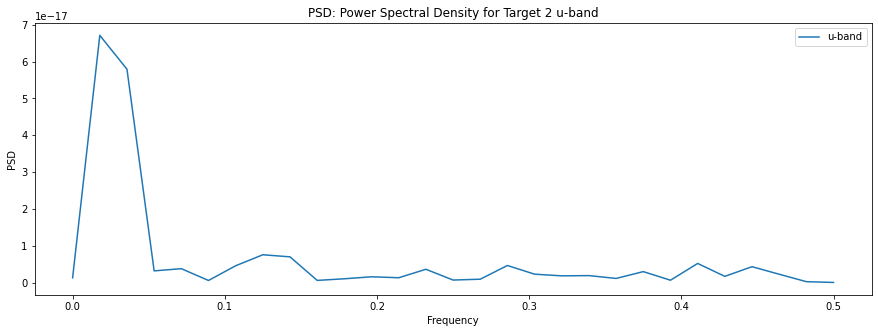

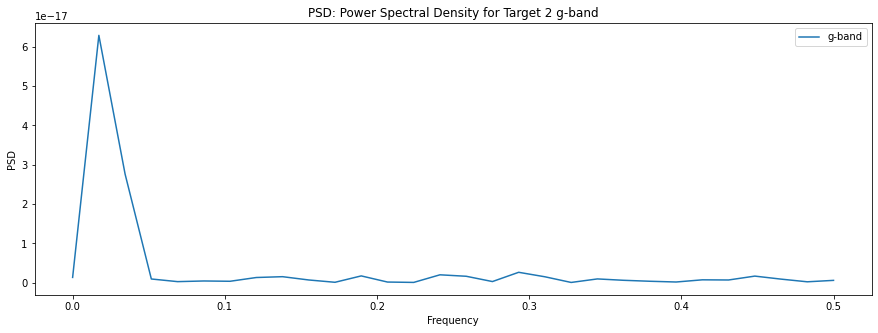

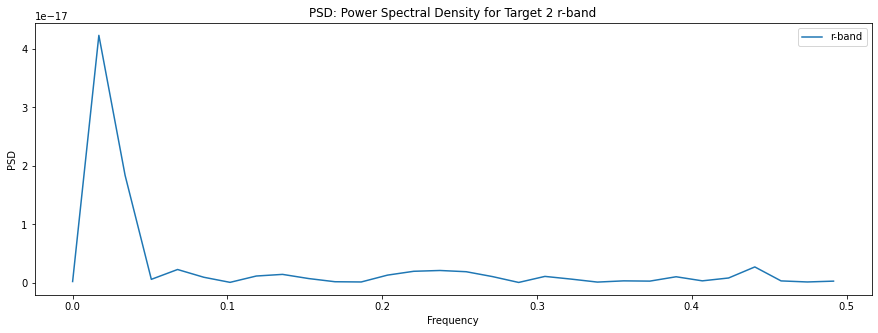

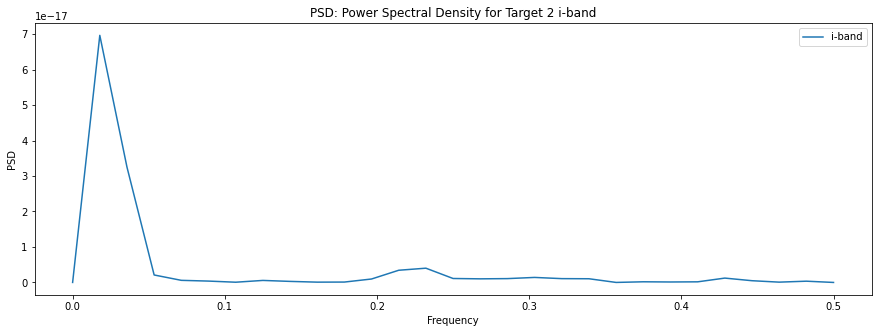

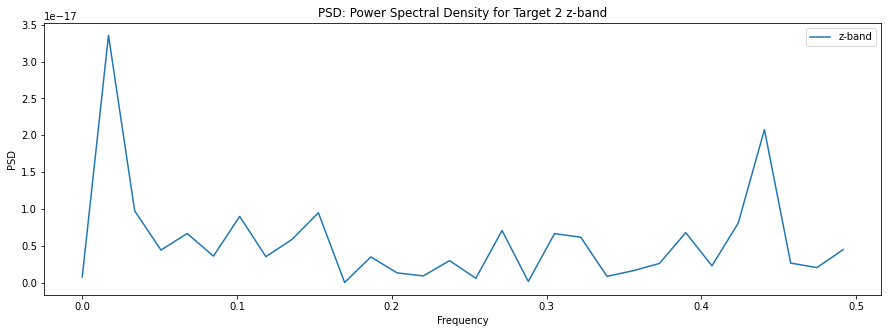

In [82]:
#developing psd plots
from scipy import signal
tar = 2
fs = 1
freqs_u, psd_u = signal.welch(lists_u_abs[tar], fs, nperseg= len(lists_u_abs[tar]))
freqs_g, psd_g = signal.welch(lists_g_abs[tar], fs, nperseg= len(lists_g_abs[tar]))
freqs_r, psd_r = signal.welch(lists_r_abs[tar], fs, nperseg= len(lists_r_abs[tar]))
freqs_i, psd_i = signal.welch(lists_i_abs[tar], fs, nperseg= len(lists_i_abs[tar]))
freqs_z, psd_z = signal.welch(lists_z_abs[tar], fs, nperseg= len(lists_z_abs[tar]))

plt.figure(figsize = (15,5))
plt.plot(freqs_u, psd_u, label = "u-band")
plt.xlabel('Frequency')
plt.ylabel('PSD')
plt.title('PSD: Power Spectral Density for Target 2 u-band')
plt.legend()

plt.figure(figsize = (15,5))
plt.plot(freqs_g, psd_g, label = "g-band")
plt.xlabel('Frequency')
plt.ylabel('PSD')
plt.title('PSD: Power Spectral Density for Target 2 g-band')
plt.legend()

plt.figure(figsize = (15,5))
plt.plot(freqs_r, psd_r, label = "r-band")
plt.xlabel('Frequency')
plt.ylabel('PSD')
plt.title('PSD: Power Spectral Density for Target 2 r-band')
plt.legend()

plt.figure(figsize = (15,5))
plt.plot(freqs_i, psd_i, label = "i-band")
plt.xlabel('Frequency')
plt.ylabel('PSD')
plt.title('PSD: Power Spectral Density for Target 2 i-band')
plt.legend()

plt.figure(figsize = (15,5))
plt.plot(freqs_z, psd_z, label = "z-band")
plt.xlabel('Frequency')
plt.ylabel('PSD')
plt.title('PSD: Power Spectral Density for Target 2 z-band')
plt.legend()

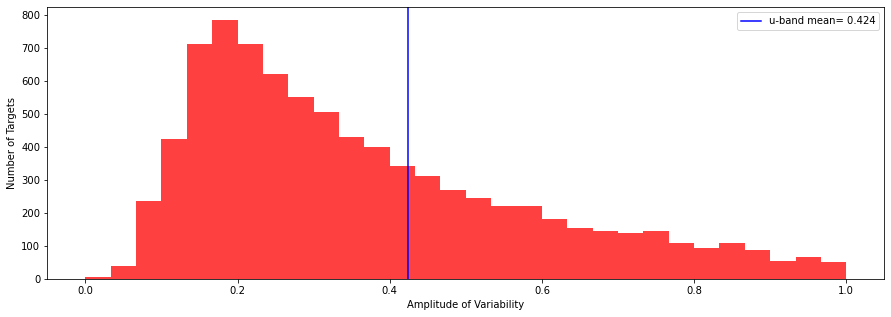

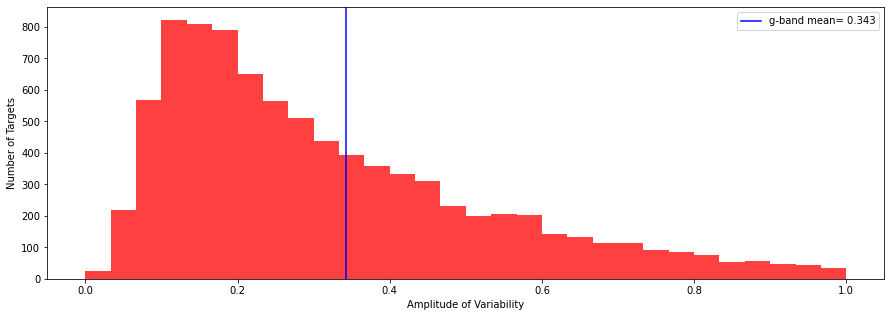

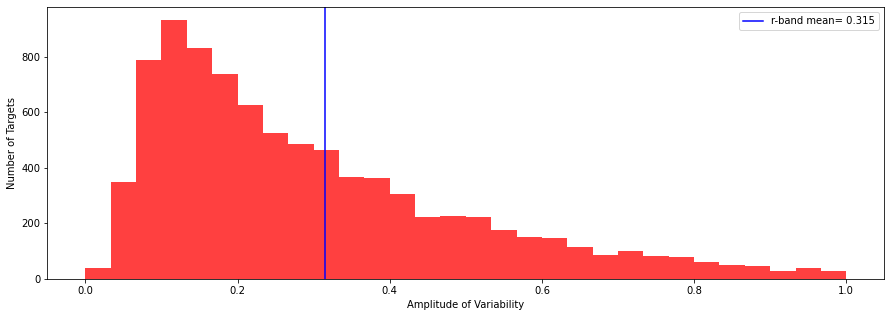

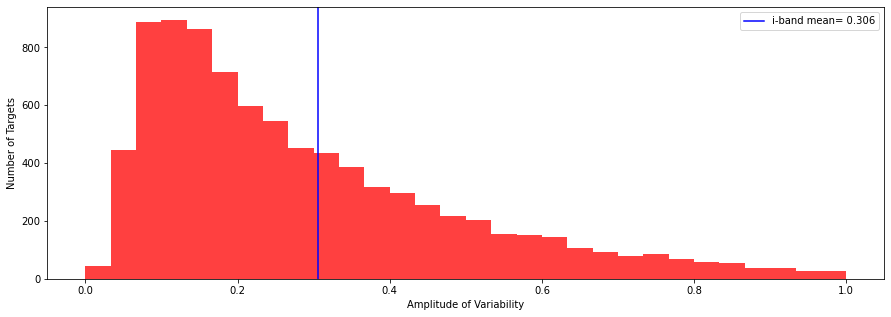

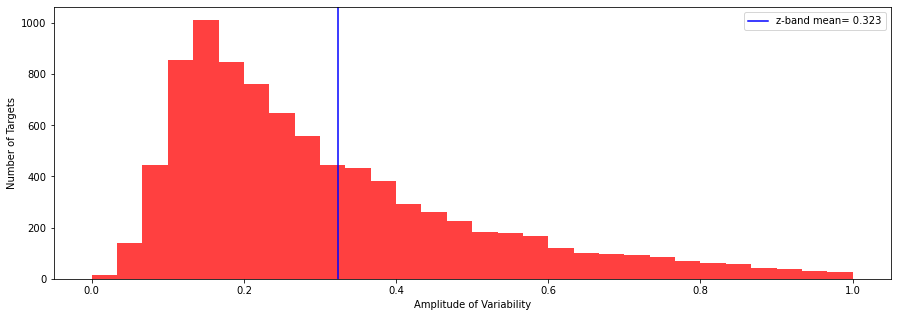

In [83]:
#developing histograms for amplitude of variability data

plt.figure(figsize = (15,5))
plt.hist(u_amp_var, range=[0, 1], bins=30, color='r', alpha=0.75)
plt.axvline(np.mean(u_amp_var),color='b', linestyle='solid', linewidth=1.5, label = 'u-band mean= '+ str(round(np.mean(u_amp_var), 3)))
plt.xlabel("Amplitude of Variability")
plt.ylabel("Number of Targets")
plt.legend()

plt.figure(figsize = (15,5))
plt.hist(g_amp_var, range=[0, 1], bins=30, color='r', alpha=0.75)
plt.axvline(np.mean(g_amp_var),color='b', linestyle='solid', linewidth=1.5, label = 'g-band mean= '+ str(round(np.mean(g_amp_var), 3)))
plt.xlabel("Amplitude of Variability")
plt.ylabel("Number of Targets")
plt.legend()

plt.figure(figsize = (15,5))
plt.hist(r_amp_var, range=[0, 1], bins=30, color='r', alpha=0.75)
plt.axvline(np.mean(r_amp_var),color='b', linestyle='solid', linewidth=1.5, label = 'r-band mean= '+ str(round(np.mean(r_amp_var), 3)))
plt.xlabel("Amplitude of Variability")
plt.ylabel("Number of Targets")
plt.legend()

plt.figure(figsize = (15,5))
plt.hist(i_amp_var, range=[0, 1], bins=30, color='r', alpha=0.75)
plt.axvline(np.mean(i_amp_var),color='b', linestyle='solid', linewidth=1.5, label = 'i-band mean= '+ str(round(np.mean(i_amp_var), 3)))
plt.xlabel("Amplitude of Variability")
plt.ylabel("Number of Targets")
plt.legend()

plt.figure(figsize = (15,5))
plt.hist(z_amp_var, range=[0, 1], bins=30, color='r', alpha=0.75)
plt.axvline(np.mean(z_amp_var),color='b', linestyle='solid', linewidth=1.5, label = 'z-band mean= '+ str(round(np.mean(z_amp_var), 3)))
plt.xlabel("Amplitude of Variability")
plt.ylabel("Number of Targets")
plt.legend()

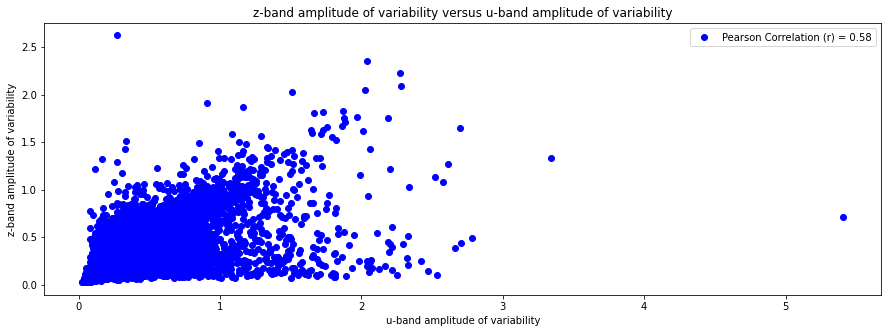

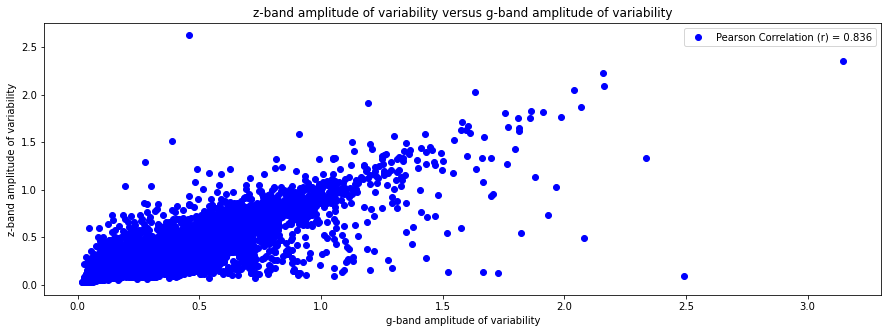

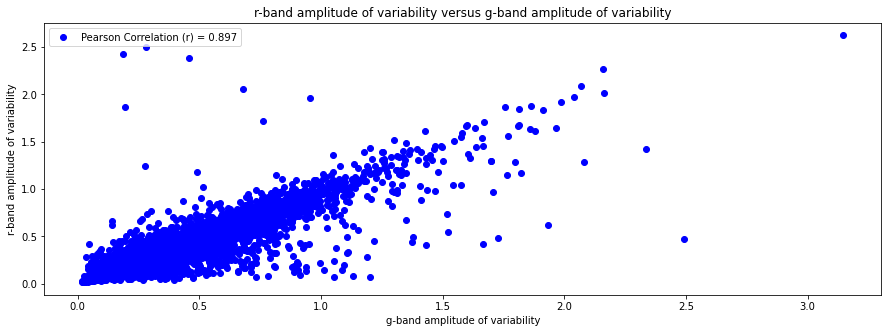

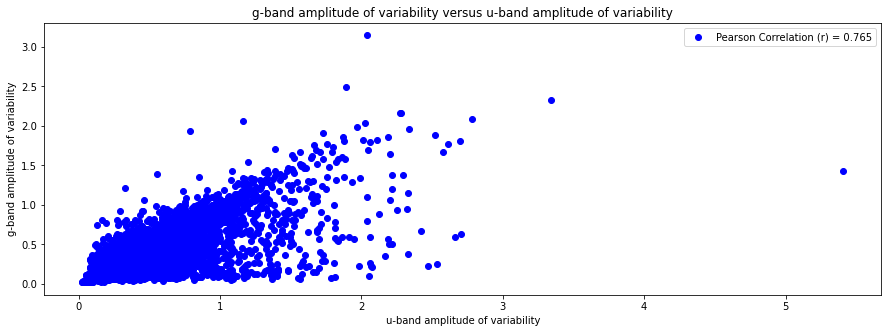

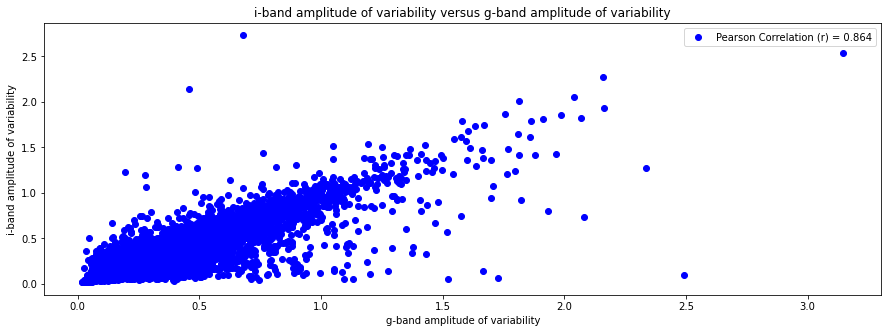

In [84]:
#making scatter plots to compare amplitude of variabilities for different bands
from scipy.stats import pearsonr

corr_u_z, _ = pearsonr(u_amp_var, z_amp_var)

plt.figure(figsize = (15,5))
plt.scatter(u_amp_var, z_amp_var, color = 'b', label=f'Pearson Correlation (r) = {np.round(np.corrcoef(u_amp_var, z_amp_var)[0,1], 3)}')
plt.title('z-band amplitude of variability versus u-band amplitude of variability')
plt.xlabel('u-band amplitude of variability')
plt.ylabel('z-band amplitude of variability')
plt.legend()

plt.figure(figsize = (15,5))
plt.scatter(g_amp_var, z_amp_var, color = 'b', label=f'Pearson Correlation (r) = {np.round(np.corrcoef(g_amp_var, z_amp_var)[0,1], 3)}')
plt.title('z-band amplitude of variability versus g-band amplitude of variability')
plt.xlabel('g-band amplitude of variability')
plt.ylabel('z-band amplitude of variability')
plt.legend()

plt.figure(figsize = (15,5))
plt.scatter(g_amp_var, r_amp_var, color = 'b', label=f'Pearson Correlation (r) = {np.round(np.corrcoef(g_amp_var, r_amp_var)[0,1], 3)}')
plt.title('r-band amplitude of variability versus g-band amplitude of variability')
plt.xlabel('g-band amplitude of variability')
plt.ylabel('r-band amplitude of variability')
plt.legend()

plt.figure(figsize = (15,5))
plt.scatter(u_amp_var, g_amp_var, color = 'b', label=f'Pearson Correlation (r) = {np.round(np.corrcoef(u_amp_var, g_amp_var)[0,1], 3)}')
plt.title('g-band amplitude of variability versus u-band amplitude of variability')
plt.xlabel('u-band amplitude of variability')
plt.ylabel('g-band amplitude of variability')
plt.legend()

plt.figure(figsize = (15,5))
plt.scatter(g_amp_var, i_amp_var, color = 'b', label=f'Pearson Correlation (r) = {np.round(np.corrcoef(g_amp_var, i_amp_var)[0,1], 3)}')
plt.title('i-band amplitude of variability versus g-band amplitude of variability')
plt.xlabel('g-band amplitude of variability')
plt.ylabel('i-band amplitude of variability')
plt.legend()



https://www.machinelearningplus.com/plots/python-scatter-plot/

from scipy.stats import pearsonr

corr_u_z, _ = pearsonr(u_amp_var, z_amp_var)
print(corr_u_z)

## Getting redshifts, black hole mass, bolometric luminosity for correct targets

In [8]:
#getting redshift, black hole mass, bolometric luminosity

red_bhm_bolum = pd.read_csv("/Users/alanroden/Documents/DB_QSO_S82.txt")
red_bhm_bolum.to_excel("SDSSQuasarAttributes.xlsx", sheet_name='Sheet_name1')

In [9]:
attributes = pd.read_excel('/Users/alanroden/Documents/SDSSQuasarAttributes.xlsx')

In [10]:
import glob
folder_path1 = '/Users/alanroden/Library/Mobile Documents/com~apple~CloudDocs/QSO_S82.Edit_Full3'
keys = range(9258)
dicts = {}
dicts_vals = []
dicts_keys = []
values = [filename for filename in glob.glob(os.path.join(folder_path1, '*.txt'))]
for i in keys:
    dicts[i] = values[i]
for i in dicts.values():
    dicts_vals.append(i)
for i in dicts.keys():
    dicts_keys.append(i)

In [11]:
texts = []
for i in dicts_vals:
    texts.append(i[81:])

In [12]:
texts1 = []
for i in texts:
    texts1.append(i[:-4])


In [13]:
names = []
reds = []
bhm = []
bolum = []
texts2 = []
texts3 = []
texts4 = []
for i in attributes['dbID']:
    j = str(i)
    names.append(j)
    
for i in attributes['redshift']:
    reds.append(i)
for i in attributes['mass_BH(log(M/M_sun))']:
    bhm.append(i)
for i in attributes['Lbol(log(ergs/s))']:
    bolum.append(i)
for i in zip(names, reds):
    texts2.append(i)
for i in zip(names, bhm):
    texts3.append(i)
for i in zip(names, bolum):
    texts4.append(i)

In [14]:
redshifts = []
for i in texts1:
    for j,k in texts2:
        if i == j:
            redshifts.append(k)

In [15]:
bh_masses = []
for i in texts1:
    for j,k in texts3:
        if i == j:
            bh_masses.append(k)

In [16]:
bo_luminosities = []
for i in texts1:
    for j,k in texts4:
        if i == j:
            bo_luminosities.append(k)

In [19]:
print(np.std(redshifts))
print(np.mean(redshifts))

0.7306972091372224
1.5836716137394684


## Flux-Flux plots 

Theory: We should see a linear relationship between the flux-flux plot of different bands.

Let's check this for the data. Start with the widest range between bands- the u and z bands.

In [ ]:
flux_u = lists_u_av
flux_g = lists_g_av
flux_r = lists_r_av
flux_i = lists_i_av
flux_z = lists_z_av

plt.figure(figsize = (15,5))
plt.scatter(flux_u, flux_z, color = 'b')
plt.title('z-band flux versus u-band flux')
plt.xlabel('u-band flux')
plt.ylabel('z-band flux')
#plt.xlim(0, 4e-7)
#plt.ylim(0, 4e-7)
plt.plot()

We see that besides a few outliers, out of 9258 targets, this relationship is fairly linear. It is to be expected that the data is not perfect, and that real data does not follow the theory perfectly.

## Redshift versus amplitude of variability 

ValueError: x and y must be the same size

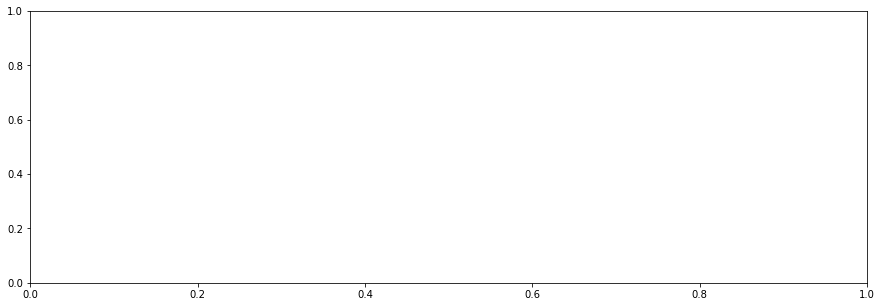

In [85]:
plt.figure(figsize = (15,5))
plt.scatter(redshifts, u_amp_var, color = 'b')
plt.title('u-band amplitude of variability versus redshift')
plt.xlabel('redshift')
plt.ylabel('u-band amplitude of variability')
#plt.xlim(0, 4e-7)
#plt.ylim(0, 4e-7)


## Redshift Corrections

In [86]:
#Standard Wavelengths
#u band = 350nm
#g band = 470nm
#r band = 620nm
#i band = 750nm
#z band = 890nm
u_obs = 350
g_obs = 470
r_obs = 620
i_obs = 750
z_obs = 890

Reference for redshift correction:

https://astronomy.swin.edu.au/cosmos/c/cosmological+redshift

In [87]:
u_rest = []
g_rest = []
r_rest = []
i_rest = []
z_rest = []

for i in redshifts:
    u_wave = u_obs / (i + 1)
    g_wave = g_obs / (i + 1)
    r_wave = r_obs / (i + 1)
    i_wave = i_obs / (i + 1)
    z_wave = z_obs / (i + 1)
    u_rest.append(u_wave)
    g_rest.append(g_wave)
    r_rest.append(r_wave)
    i_rest.append(i_wave)
    z_rest.append(z_wave)

In [88]:
#Average Rest Wavelengths in nm
print(np.mean(u_rest))
print(np.mean(g_rest))
print(np.mean(r_rest))
print(np.mean(i_rest))
print(np.mean(z_rest))

all_waves = []
for i in zip(u_rest, g_rest, r_rest, i_rest, z_rest):
    all_waves.append(i)

146.358740766317
196.53888045762565
259.2640550717615
313.6258730706792
372.16936937720607


In [89]:
all_wavel = []
for i in all_waves:
    for j in i:
        all_wavel.append(j)

In [90]:
#Grouping the wavelengths into EIGHT groups -- each have a range of 100 nm
group1 = []
group2 = []
group3 = []
group4 = []
group5 = []
group6 = []
group7 = []
group8 = []

for i in all_wavel:
    if i <= 100:
        group1.append(i)
    elif 100 < i <= 200:
        group2.append(i)
    elif 200 < i <= 300:
        group3.append(i)
    elif 300 < i <= 400:
        group4.append(i)
    elif 400 < i <= 500:
        group5.append(i)
    elif 500 < i <= 600:
        group6.append(i)
    elif 600 < i <= 700:
        group7.append(i)
    else:
        group8.append(i)

In [91]:
print(len(group1))
print(len(group2))
print(len(group3))
print(len(group4))
print(len(group5))
print(len(group6))
print(len(group7))
print(len(group8))
print()
print(np.mean(group1))
print(np.mean(group2))
print(np.mean(group3))
print(np.mean(group4))
print(np.mean(group5))
print(np.mean(group6))
print(np.mean(group7))
print(np.mean(group8))

1069
15296
15656
9131
3530
1291
295
22

87.92464336849787
154.28374615224848
247.74673032560855
342.9254943229398
441.5411774927679
540.9346223606242
633.7676649189667
730.2552279005236


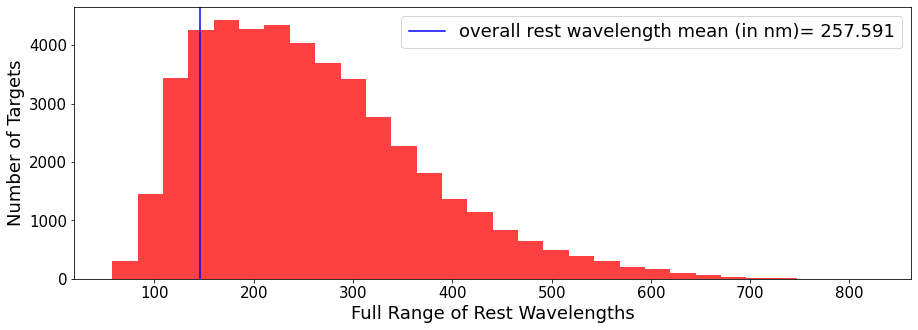

In [101]:
plt.figure(figsize = (15,5))
plt.hist(all_wavel, bins=30, color='r', alpha=0.75)
plt.axvline(np.mean(u_rest),color='b', linestyle='solid', linewidth=1.5, label = 'overall rest wavelength mean (in nm)= '+ str(round(np.mean(all_wavel), 3)))
plt.xlabel("Full Range of Rest Wavelengths", size = 18)
plt.ylabel("Number of Targets", size = 18)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)
plt.legend(prop={'size': 18})

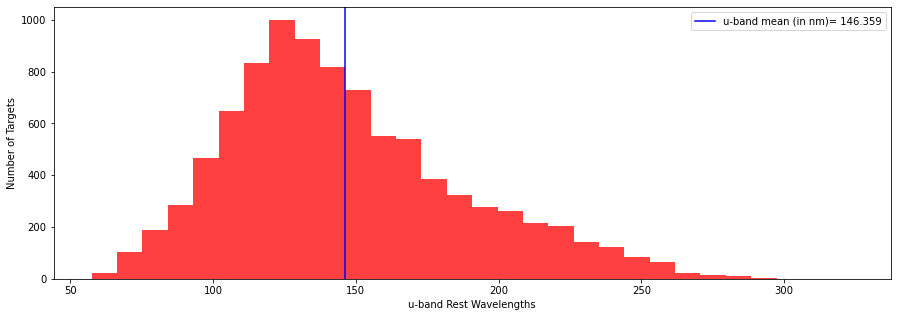

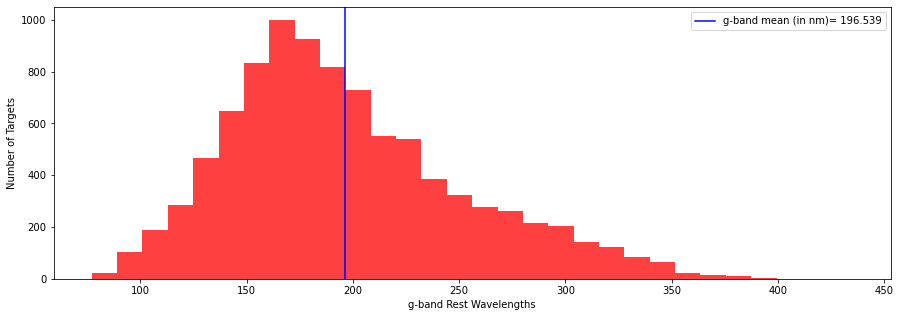

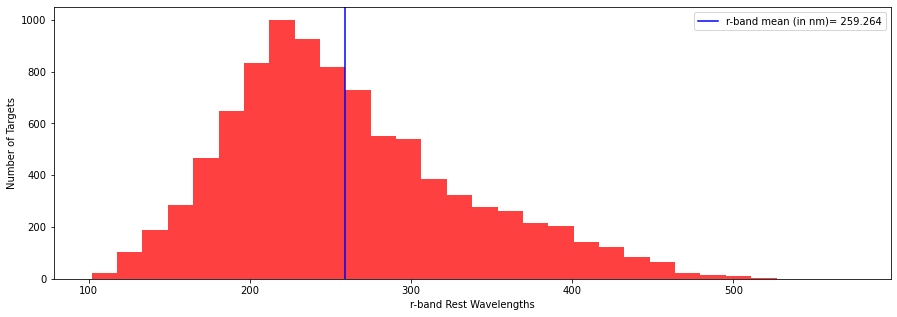

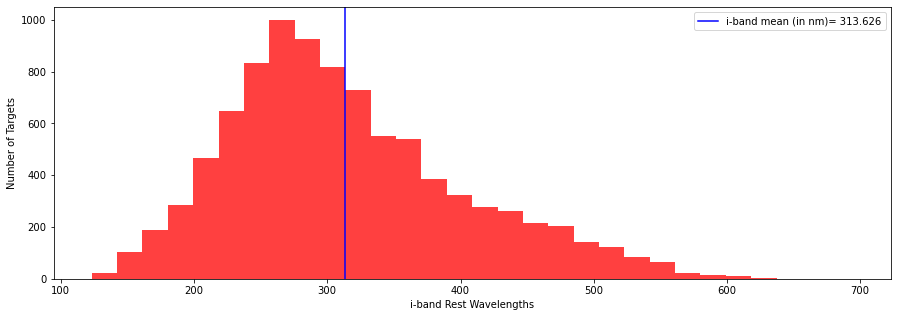

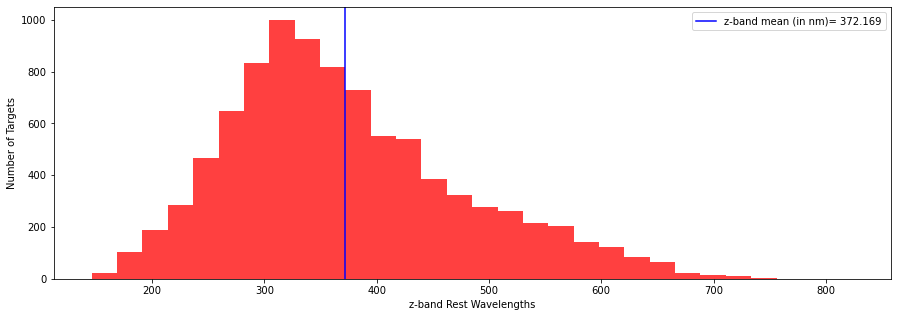

In [328]:
plt.figure(figsize = (15,5))
plt.hist(u_rest, bins=30, color='r', alpha=0.75)
plt.axvline(np.mean(u_rest),color='b', linestyle='solid', linewidth=1.5, label = 'u-band mean (in nm)= '+ str(round(np.mean(u_rest), 3)))
plt.xlabel("u-band Rest Wavelengths")
plt.ylabel("Number of Targets")
plt.legend()

plt.figure(figsize = (15,5))
plt.hist(g_rest, bins=30, color='r', alpha=0.75)
plt.axvline(np.mean(g_rest),color='b', linestyle='solid', linewidth=1.5, label = 'g-band mean (in nm)= '+ str(round(np.mean(g_rest), 3)))
plt.xlabel("g-band Rest Wavelengths")
plt.ylabel("Number of Targets")
plt.legend()

plt.figure(figsize = (15,5))
plt.hist(r_rest, bins=30, color='r', alpha=0.75)
plt.axvline(np.mean(r_rest),color='b', linestyle='solid', linewidth=1.5, label = 'r-band mean (in nm)= '+ str(round(np.mean(r_rest), 3)))
plt.xlabel("r-band Rest Wavelengths")
plt.ylabel("Number of Targets")
plt.legend()

plt.figure(figsize = (15,5))
plt.hist(i_rest, bins=30, color='r', alpha=0.75)
plt.axvline(np.mean(i_rest),color='b', linestyle='solid', linewidth=1.5, label = 'i-band mean (in nm)= '+ str(round(np.mean(i_rest), 3)))
plt.xlabel("i-band Rest Wavelengths")
plt.ylabel("Number of Targets")
plt.legend()

plt.figure(figsize = (15,5))
plt.hist(z_rest, bins=30, color='r', alpha=0.75)
plt.axvline(np.mean(z_rest),color='b', linestyle='solid', linewidth=1.5, label = 'z-band mean (in nm)= '+ str(round(np.mean(z_rest), 3)))
plt.xlabel("z-band Rest Wavelengths")
plt.ylabel("Number of Targets")
plt.legend()


## Black Hole Mass Correlation

In [29]:
bh_u = []
bh_g = []
bh_r = []
bh_i = []
bh_z = []

u_amp_var_bh = []
g_amp_var_bh = []
r_amp_var_bh = []
i_amp_var_bh = []
z_amp_var_bh = []

bh_masses_clean = []
for i in bh_masses:
    if i > 0:
        bh_masses_clean.append(i)
    else:
        continue

bh_mass_corr_u = zip(u_amp_var, bh_masses_clean)
bh_mass_corr_g = zip(g_amp_var, bh_masses_clean)
bh_mass_corr_r = zip(r_amp_var, bh_masses_clean)
bh_mass_corr_i = zip(i_amp_var, bh_masses_clean)
bh_mass_corr_z = zip(z_amp_var, bh_masses_clean)

for i,j in bh_mass_corr_u:
    bh_u.append(j)
    u_amp_var_bh.append(i)
    
for i,j in bh_mass_corr_g:
    bh_g.append(j)
    g_amp_var_bh.append(i)

for i,j in bh_mass_corr_r:
    bh_r.append(j)
    r_amp_var_bh.append(i)
    
for i,j in bh_mass_corr_i:
    bh_i.append(j)
    i_amp_var_bh.append(i)
    
for i,j in bh_mass_corr_z:
    bh_z.append(j)
    z_amp_var_bh.append(i)

NameError: name 'u_amp_var' is not defined

Text(0, 0.5, 'z-band amplitude of variability')

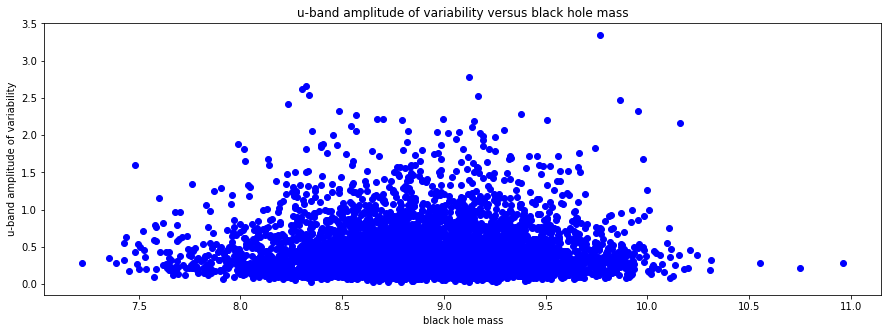

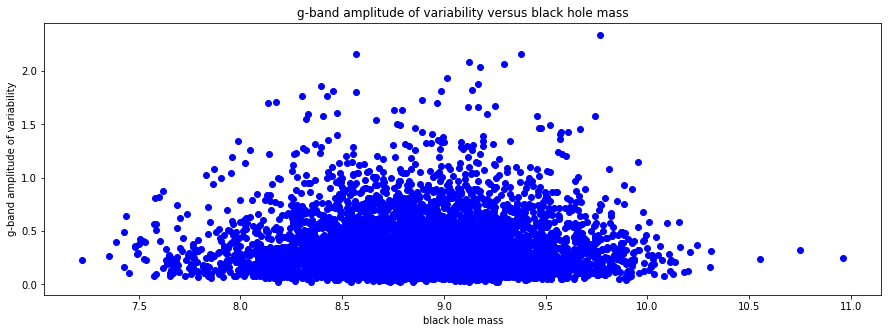

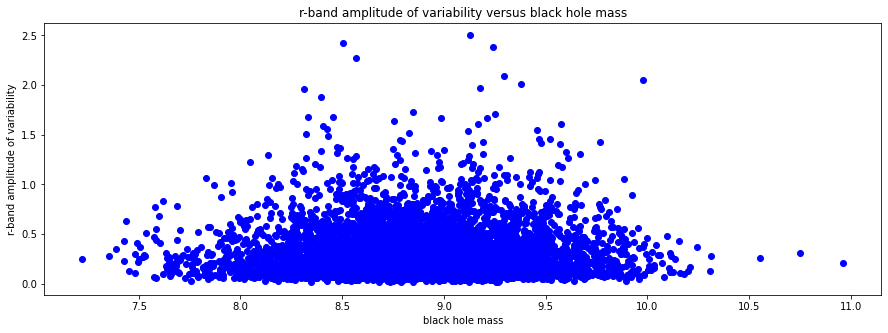

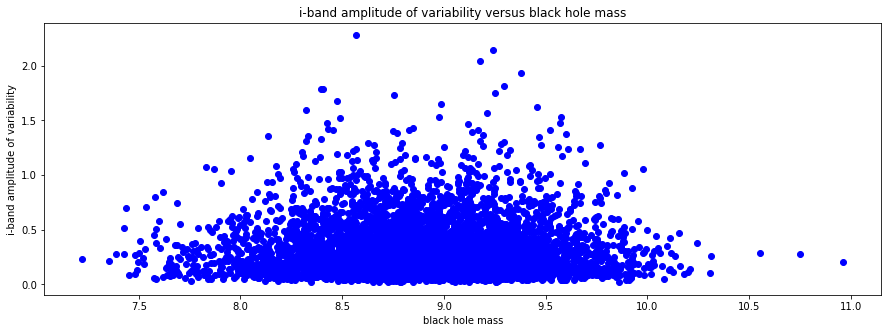

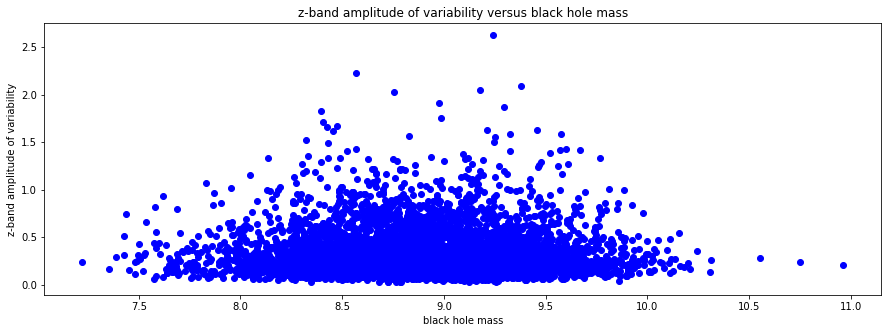

In [392]:
plt.figure(figsize = (15,5))
plt.scatter(bh_u, u_amp_var_bh, color = 'b')
plt.title('u-band amplitude of variability versus black hole mass')
plt.xlabel('black hole mass')
plt.ylabel('u-band amplitude of variability')

plt.figure(figsize = (15,5))
plt.scatter(bh_g, g_amp_var_bh, color = 'b')
plt.title('g-band amplitude of variability versus black hole mass')
plt.xlabel('black hole mass')
plt.ylabel('g-band amplitude of variability')

plt.figure(figsize = (15,5))
plt.scatter(bh_r, r_amp_var_bh, color = 'b')
plt.title('r-band amplitude of variability versus black hole mass')
plt.xlabel('black hole mass')
plt.ylabel('r-band amplitude of variability')

plt.figure(figsize = (15,5))
plt.scatter(bh_i, i_amp_var_bh, color = 'b')
plt.title('i-band amplitude of variability versus black hole mass')
plt.xlabel('black hole mass')
plt.ylabel('i-band amplitude of variability')

plt.figure(figsize = (15,5))
plt.scatter(bh_z, z_amp_var_bh, color = 'b')
plt.title('z-band amplitude of variability versus black hole mass')
plt.xlabel('black hole mass')
plt.ylabel('z-band amplitude of variability')

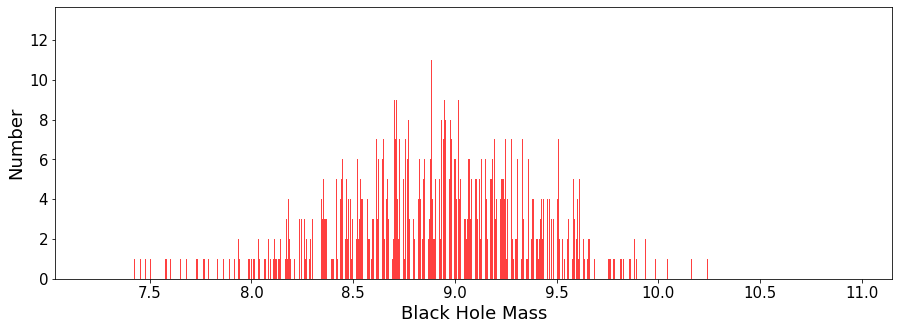

In [104]:
plt.figure(figsize = (15,5))
plt.hist(bh_masses_clean, bins=5876, color='r', alpha=0.75)
plt.xlabel("Black Hole Mass", size = 18)
plt.ylabel("Number", size = 18)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)

# Results Gathering -- Observational Data

In [7]:
datas = pd.read_excel('/Users/alanroden/Documents/SDSSQuasarDatas.xlsx')

In [164]:
#GETTING OBSERVATIONAL DATA AND ASSOCIATING RATIO DATA WITH BLACK HOLE MASS
new_bhm_dict = {datas['Index'][i]: datas['Black Hole Mass'][i] for i in range(len(datas['Index'])) if datas['Black Hole Mass'][i]>0}
new_bhm_dict_keys = []
for i in new_bhm_dict.keys():
    new_bhm_dict_keys.append(i)

clean_bhm = []
for i in bh_masses:
    if i > 0:
        clean_bhm.append(i)
    else:
        pass

cor_units_bhm = []
for i in clean_bhm:
    cor_units_bhm.append((10**i)/(10**8))
    
bhm_dict = {new_bhm_dict_keys[i]: cor_units_bhm[i] for i in range(len(new_bhm_dict_keys))}
bhm_dict_keys = []
bhm_dict_values = []
for i in bhm_dict.keys():
    bhm_dict_keys.append(i)
for i in bhm_dict.values():
    bhm_dict_values.append(i)
#print(len(bhm_dict))
#print(bhm_dict)

new_bhm_dict_ug = {datas['Index'][i]: datas['u/g'][i] for i in range(len(datas['Index']))}
new_bhm_dict_keys_ug = []
new_bhm_dict_values_ug = []
for i in new_bhm_dict_ug.keys():
    new_bhm_dict_keys_ug.append(i)
for i in new_bhm_dict_ug.values():
    new_bhm_dict_values_ug.append(i)

ug_dict = {}
for i in range(len(bhm_dict_keys)):
    if i in new_bhm_dict_keys_ug and bhm_dict_keys:
        ug_dict[new_bhm_dict_values_ug[i]] = bhm_dict_values[i]

ug_dict_keys = []
ug_dict_values = []
for i in ug_dict.keys():
    ug_dict_keys.append(i)
for i in ug_dict.values():
    ug_dict_values.append(i)
    
bhm_group1_ug = []
bhm_group2_ug = []
bhm_group3_ug = []
bhm_group4_ug = []
bhm_group5_ug = []
bhm_group6_ug = []
bhm_group7_ug = []
ug_group1 = []
ug_group2 = []
ug_group3 = []
ug_group4 = []
ug_group5 = []
ug_group6 = []
ug_group7 = []


for i, j in ug_dict.items():
    if j*(10**8) <= 10**8.0:
        bhm_group1_ug.append(j)
        ug_group1.append(i)
    elif j*(10**8) <= 10**8.5:
        bhm_group2_ug.append(j)
        ug_group2.append(i)
    elif j*(10**8) <= 10**9.0:
        bhm_group3_ug.append(j)
        ug_group3.append(i)
    elif j*(10**8) <= 10**9.5:
        bhm_group4_ug.append(j)
        ug_group4.append(i)
    elif j*(10**8) <= 10**10.0:
        bhm_group5_ug.append(j)
        ug_group5.append(i)
    elif j*(10**8) <= 10**10.5:
        bhm_group6_ug.append(j)
        ug_group6.append(i)
    elif j*(10**8) <= 10**11.0:
        bhm_group7_ug.append(j)
        ug_group7.append(i)

In [165]:
#GETTING OBSERVATIONAL DATA AND ASSOCIATING RATIO DATA WITH BLACK HOLE MASS
new_bhm_dict = {datas['Index'][i]: datas['Black Hole Mass'][i] for i in range(len(datas['Index'])) if datas['Black Hole Mass'][i]>0}
new_bhm_dict_keys = []
for i in new_bhm_dict.keys():
    new_bhm_dict_keys.append(i)

clean_bhm = []
for i in bh_masses:
    if i > 0:
        clean_bhm.append(i)
    else:
        pass

cor_units_bhm = []
for i in clean_bhm:
    cor_units_bhm.append((10**i)/(10**8))
    
bhm_dict = {new_bhm_dict_keys[i]: cor_units_bhm[i] for i in range(len(new_bhm_dict_keys))}
bhm_dict_keys = []
bhm_dict_values = []
for i in bhm_dict.keys():
    bhm_dict_keys.append(i)
for i in bhm_dict.values():
    bhm_dict_values.append(i)
#print(len(bhm_dict))
#print(bhm_dict)

new_bhm_dict_ur = {datas['Index'][i]: datas['u/r'][i] for i in range(len(datas['Index']))}
new_bhm_dict_keys_ur = []
new_bhm_dict_values_ur = []
for i in new_bhm_dict_ur.keys():
    new_bhm_dict_keys_ur.append(i)
for i in new_bhm_dict_ur.values():
    new_bhm_dict_values_ur.append(i)

ur_dict = {}
for i in range(len(bhm_dict_keys)):
    if i in new_bhm_dict_keys_ur and bhm_dict_keys:
        ur_dict[new_bhm_dict_values_ur[i]] = bhm_dict_values[i]

ur_dict_keys = []
ur_dict_values = []
for i in ur_dict.keys():
    ur_dict_keys.append(i)
for i in ur_dict.values():
    ur_dict_values.append(i)
    
bhm_group1_ur = []
bhm_group2_ur = []
bhm_group3_ur = []
bhm_group4_ur = []
bhm_group5_ur = []
bhm_group6_ur = []
bhm_group7_ur = []
ur_group1 = []
ur_group2 = []
ur_group3 = []
ur_group4 = []
ur_group5 = []
ur_group6 = []
ur_group7 = []


for i, j in ur_dict.items():
    if j*(10**8) <= 10**8.0:
        bhm_group1_ur.append(j)
        ur_group1.append(i)
    elif j*(10**8) <= 10**8.5:
        bhm_group2_ur.append(j)
        ur_group2.append(i)
    elif j*(10**8) <= 10**9.0:
        bhm_group3_ur.append(j)
        ur_group3.append(i)
    elif j*(10**8) <= 10**9.5:
        bhm_group4_ur.append(j)
        ur_group4.append(i)
    elif j*(10**8) <= 10**10.0:
        bhm_group5_ur.append(j)
        ur_group5.append(i)
    elif j*(10**8) <= 10**10.5:
        bhm_group6_ur.append(j)
        ur_group6.append(i)
    elif j*(10**8) <= 10**11.0:
        bhm_group7_ur.append(j)
        ur_group7.append(i)

In [166]:
#GETTING OBSERVATIONAL DATA AND ASSOCIATING RATIO DATA WITH BLACK HOLE MASS
new_bhm_dict = {datas['Index'][i]: datas['Black Hole Mass'][i] for i in range(len(datas['Index'])) if datas['Black Hole Mass'][i]>0}
new_bhm_dict_keys = []
for i in new_bhm_dict.keys():
    new_bhm_dict_keys.append(i)

clean_bhm = []
for i in bh_masses:
    if i > 0:
        clean_bhm.append(i)
    else:
        pass

cor_units_bhm = []
for i in clean_bhm:
    cor_units_bhm.append((10**i)/(10**8))
    
bhm_dict = {new_bhm_dict_keys[i]: cor_units_bhm[i] for i in range(len(new_bhm_dict_keys))}
bhm_dict_keys = []
bhm_dict_values = []
for i in bhm_dict.keys():
    bhm_dict_keys.append(i)
for i in bhm_dict.values():
    bhm_dict_values.append(i)
#print(len(bhm_dict))
#print(bhm_dict)

new_bhm_dict_ui = {datas['Index'][i]: datas['u/i'][i] for i in range(len(datas['Index']))}
new_bhm_dict_keys_ui = []
new_bhm_dict_values_ui = []
for i in new_bhm_dict_ui.keys():
    new_bhm_dict_keys_ui.append(i)
for i in new_bhm_dict_ui.values():
    new_bhm_dict_values_ui.append(i)

ui_dict = {}
for i in range(len(bhm_dict_keys)):
    if i in new_bhm_dict_keys_ui and bhm_dict_keys:
        ui_dict[new_bhm_dict_values_ui[i]] = bhm_dict_values[i]

ui_dict_keys = []
ui_dict_values = []
for i in ui_dict.keys():
    ui_dict_keys.append(i)
for i in ui_dict.values():
    ui_dict_values.append(i)
    
bhm_group1_ui = []
bhm_group2_ui = []
bhm_group3_ui = []
bhm_group4_ui = []
bhm_group5_ui = []
bhm_group6_ui = []
bhm_group7_ui = []
ui_group1 = []
ui_group2 = []
ui_group3 = []
ui_group4 = []
ui_group5 = []
ui_group6 = []
ui_group7 = []


for i, j in ui_dict.items():
    if j*(10**8) <= 10**8.0:
        bhm_group1_ui.append(j)
        ui_group1.append(i)
    elif j*(10**8) <= 10**8.5:
        bhm_group2_ui.append(j)
        ui_group2.append(i)
    elif j*(10**8) <= 10**9.0:
        bhm_group3_ui.append(j)
        ui_group3.append(i)
    elif j*(10**8) <= 10**9.5:
        bhm_group4_ui.append(j)
        ui_group4.append(i)
    elif j*(10**8) <= 10**10.0:
        bhm_group5_ui.append(j)
        ui_group5.append(i)
    elif j*(10**8) <= 10**10.5:
        bhm_group6_ui.append(j)
        ui_group6.append(i)
    elif j*(10**8) <= 10**11.0:
        bhm_group7_ui.append(j)
        ui_group7.append(i)

In [167]:
#GETTING OBSERVATIONAL DATA AND ASSOCIATING RATIO DATA WITH BLACK HOLE MASS
new_bhm_dict = {datas['Index'][i]: datas['Black Hole Mass'][i] for i in range(len(datas['Index'])) if datas['Black Hole Mass'][i]>0}
new_bhm_dict_keys = []
for i in new_bhm_dict.keys():
    new_bhm_dict_keys.append(i)

clean_bhm = []
for i in bh_masses:
    if i > 0:
        clean_bhm.append(i)
    else:
        pass

cor_units_bhm = []
for i in clean_bhm:
    cor_units_bhm.append((10**i)/(10**8))
    
bhm_dict = {new_bhm_dict_keys[i]: cor_units_bhm[i] for i in range(len(new_bhm_dict_keys))}
bhm_dict_keys = []
bhm_dict_values = []
for i in bhm_dict.keys():
    bhm_dict_keys.append(i)
for i in bhm_dict.values():
    bhm_dict_values.append(i)
#print(len(bhm_dict))
#print(bhm_dict)

new_bhm_dict_uz = {datas['Index'][i]: datas['u/z'][i] for i in range(len(datas['Index']))}
new_bhm_dict_keys_uz = []
new_bhm_dict_values_uz = []
for i in new_bhm_dict_uz.keys():
    new_bhm_dict_keys_uz.append(i)
for i in new_bhm_dict_uz.values():
    new_bhm_dict_values_uz.append(i)

uz_dict = {}
for i in range(len(bhm_dict_keys)):
    if i in new_bhm_dict_keys_uz and bhm_dict_keys:
        uz_dict[new_bhm_dict_values_uz[i]] = bhm_dict_values[i]

uz_dict_keys = []
uz_dict_values = []
for i in uz_dict.keys():
    uz_dict_keys.append(i)
for i in uz_dict.values():
    uz_dict_values.append(i)
    
bhm_group1_uz = []
bhm_group2_uz = []
bhm_group3_uz = []
bhm_group4_uz = []
bhm_group5_uz = []
bhm_group6_uz = []
bhm_group7_uz = []
uz_group1 = []
uz_group2 = []
uz_group3 = []
uz_group4 = []
uz_group5 = []
uz_group6 = []
uz_group7 = []


for i, j in uz_dict.items():
    if j*(10**8) <= 10**8.0:
        bhm_group1_uz.append(j)
        uz_group1.append(i)
    elif j*(10**8) <= 10**8.5:
        bhm_group2_uz.append(j)
        uz_group2.append(i)
    elif j*(10**8) <= 10**9.0:
        bhm_group3_uz.append(j)
        uz_group3.append(i)
    elif j*(10**8) <= 10**9.5:
        bhm_group4_uz.append(j)
        uz_group4.append(i)
    elif j*(10**8) <= 10**10.0:
        bhm_group5_uz.append(j)
        uz_group5.append(i)
    elif j*(10**8) <= 10**10.5:
        bhm_group6_uz.append(j)
        uz_group6.append(i)
    elif j*(10**8) <= 10**11.0:
        bhm_group7_uz.append(j)
        uz_group7.append(i)

In [168]:
#GETTING OBSERVATIONAL DATA AND ASSOCIATING RATIO DATA WITH BLACK HOLE MASS
new_bhm_dict = {datas['Index'][i]: datas['Black Hole Mass'][i] for i in range(len(datas['Index'])) if datas['Black Hole Mass'][i]>0}
new_bhm_dict_keys = []
for i in new_bhm_dict.keys():
    new_bhm_dict_keys.append(i)

clean_bhm = []
for i in bh_masses:
    if i > 0:
        clean_bhm.append(i)
    else:
        pass

cor_units_bhm = []
for i in clean_bhm:
    cor_units_bhm.append((10**i)/(10**8))
    
bhm_dict = {new_bhm_dict_keys[i]: cor_units_bhm[i] for i in range(len(new_bhm_dict_keys))}
bhm_dict_keys = []
bhm_dict_values = []
for i in bhm_dict.keys():
    bhm_dict_keys.append(i)
for i in bhm_dict.values():
    bhm_dict_values.append(i)
#print(len(bhm_dict))
#print(bhm_dict)

new_bhm_dict_gu = {datas['Index'][i]: datas['g/u'][i] for i in range(len(datas['Index']))}
new_bhm_dict_keys_gu = []
new_bhm_dict_values_gu = []
for i in new_bhm_dict_gu.keys():
    new_bhm_dict_keys_gu.append(i)
for i in new_bhm_dict_gu.values():
    new_bhm_dict_values_gu.append(i)

gu_dict = {}
for i in range(len(bhm_dict_keys)):
    if i in new_bhm_dict_keys_gu and bhm_dict_keys:
        gu_dict[new_bhm_dict_values_gu[i]] = bhm_dict_values[i]

gu_dict_keys = []
gu_dict_values = []
for i in gu_dict.keys():
    gu_dict_keys.append(i)
for i in gu_dict.values():
    gu_dict_values.append(i)
    
bhm_group1_gu = []
bhm_group2_gu = []
bhm_group3_gu = []
bhm_group4_gu = []
bhm_group5_gu = []
bhm_group6_gu = []
bhm_group7_gu = []
gu_group1 = []
gu_group2 = []
gu_group3 = []
gu_group4 = []
gu_group5 = []
gu_group6 = []
gu_group7 = []


for i, j in gu_dict.items():
    if j*(10**8) <= 10**8.0:
        bhm_group1_gu.append(j)
        gu_group1.append(i)
    elif j*(10**8) <= 10**8.5:
        bhm_group2_gu.append(j)
        gu_group2.append(i)
    elif j*(10**8) <= 10**9.0:
        bhm_group3_gu.append(j)
        gu_group3.append(i)
    elif j*(10**8) <= 10**9.5:
        bhm_group4_gu.append(j)
        gu_group4.append(i)
    elif j*(10**8) <= 10**10.0:
        bhm_group5_gu.append(j)
        gu_group5.append(i)
    elif j*(10**8) <= 10**10.5:
        bhm_group6_gu.append(j)
        gu_group6.append(i)
    elif j*(10**8) <= 10**11.0:
        bhm_group7_gu.append(j)
        gu_group7.append(i)

In [169]:
#GETTING OBSERVATIONAL DATA AND ASSOCIATING RATIO DATA WITH BLACK HOLE MASS
new_bhm_dict = {datas['Index'][i]: datas['Black Hole Mass'][i] for i in range(len(datas['Index'])) if datas['Black Hole Mass'][i]>0}
new_bhm_dict_keys = []
for i in new_bhm_dict.keys():
    new_bhm_dict_keys.append(i)

clean_bhm = []
for i in bh_masses:
    if i > 0:
        clean_bhm.append(i)
    else:
        pass

cor_units_bhm = []
for i in clean_bhm:
    cor_units_bhm.append((10**i)/(10**8))
    
bhm_dict = {new_bhm_dict_keys[i]: cor_units_bhm[i] for i in range(len(new_bhm_dict_keys))}
bhm_dict_keys = []
bhm_dict_values = []
for i in bhm_dict.keys():
    bhm_dict_keys.append(i)
for i in bhm_dict.values():
    bhm_dict_values.append(i)
#print(len(bhm_dict))
#print(bhm_dict)

new_bhm_dict_gr = {datas['Index'][i]: datas['g/r'][i] for i in range(len(datas['Index']))}
new_bhm_dict_keys_gr = []
new_bhm_dict_values_gr = []
for i in new_bhm_dict_gr.keys():
    new_bhm_dict_keys_gr.append(i)
for i in new_bhm_dict_gr.values():
    new_bhm_dict_values_gr.append(i)

gr_dict = {}
for i in range(len(bhm_dict_keys)):
    if i in new_bhm_dict_keys_gr and bhm_dict_keys:
        gr_dict[new_bhm_dict_values_gr[i]] = bhm_dict_values[i]

gr_dict_keys = []
gr_dict_values = []
for i in gr_dict.keys():
    gr_dict_keys.append(i)
for i in gr_dict.values():
    gr_dict_values.append(i)
    
bhm_group1_gr = []
bhm_group2_gr = []
bhm_group3_gr = []
bhm_group4_gr = []
bhm_group5_gr = []
bhm_group6_gr = []
bhm_group7_gr = []
gr_group1 = []
gr_group2 = []
gr_group3 = []
gr_group4 = []
gr_group5 = []
gr_group6 = []
gr_group7 = []


for i, j in gr_dict.items():
    if j*(10**8) <= 10**8.0:
        bhm_group1_gr.append(j)
        gr_group1.append(i)
    elif j*(10**8) <= 10**8.5:
        bhm_group2_gr.append(j)
        gr_group2.append(i)
    elif j*(10**8) <= 10**9.0:
        bhm_group3_gr.append(j)
        gr_group3.append(i)
    elif j*(10**8) <= 10**9.5:
        bhm_group4_gr.append(j)
        gr_group4.append(i)
    elif j*(10**8) <= 10**10.0:
        bhm_group5_gr.append(j)
        gr_group5.append(i)
    elif j*(10**8) <= 10**10.5:
        bhm_group6_gr.append(j)
        gr_group6.append(i)
    elif j*(10**8) <= 10**11.0:
        bhm_group7_gr.append(j)
        gr_group7.append(i)

In [170]:
#GETTING OBSERVATIONAL DATA AND ASSOCIATING RATIO DATA WITH BLACK HOLE MASS
new_bhm_dict = {datas['Index'][i]: datas['Black Hole Mass'][i] for i in range(len(datas['Index'])) if datas['Black Hole Mass'][i]>0}
new_bhm_dict_keys = []
for i in new_bhm_dict.keys():
    new_bhm_dict_keys.append(i)

clean_bhm = []
for i in bh_masses:
    if i > 0:
        clean_bhm.append(i)
    else:
        pass

cor_units_bhm = []
for i in clean_bhm:
    cor_units_bhm.append((10**i)/(10**8))
    
bhm_dict = {new_bhm_dict_keys[i]: cor_units_bhm[i] for i in range(len(new_bhm_dict_keys))}
bhm_dict_keys = []
bhm_dict_values = []
for i in bhm_dict.keys():
    bhm_dict_keys.append(i)
for i in bhm_dict.values():
    bhm_dict_values.append(i)
#print(len(bhm_dict))
#print(bhm_dict)

new_bhm_dict_gi = {datas['Index'][i]: datas['g/i'][i] for i in range(len(datas['Index']))}
new_bhm_dict_keys_gi = []
new_bhm_dict_values_gi = []
for i in new_bhm_dict_gi.keys():
    new_bhm_dict_keys_gi.append(i)
for i in new_bhm_dict_gi.values():
    new_bhm_dict_values_gi.append(i)

gi_dict = {}
for i in range(len(bhm_dict_keys)):
    if i in new_bhm_dict_keys_gi and bhm_dict_keys:
        gi_dict[new_bhm_dict_values_gi[i]] = bhm_dict_values[i]

gi_dict_keys = []
gi_dict_values = []
for i in gi_dict.keys():
    gi_dict_keys.append(i)
for i in gi_dict.values():
    gi_dict_values.append(i)
    
bhm_group1_gi = []
bhm_group2_gi = []
bhm_group3_gi = []
bhm_group4_gi = []
bhm_group5_gi = []
bhm_group6_gi = []
bhm_group7_gi = []
gi_group1 = []
gi_group2 = []
gi_group3 = []
gi_group4 = []
gi_group5 = []
gi_group6 = []
gi_group7 = []


for i, j in gi_dict.items():
    if j*(10**8) <= 10**8.0:
        bhm_group1_gi.append(j)
        gi_group1.append(i)
    elif j*(10**8) <= 10**8.5:
        bhm_group2_gi.append(j)
        gi_group2.append(i)
    elif j*(10**8) <= 10**9.0:
        bhm_group3_gi.append(j)
        gi_group3.append(i)
    elif j*(10**8) <= 10**9.5:
        bhm_group4_gi.append(j)
        gi_group4.append(i)
    elif j*(10**8) <= 10**10.0:
        bhm_group5_gi.append(j)
        gi_group5.append(i)
    elif j*(10**8) <= 10**10.5:
        bhm_group6_gi.append(j)
        gi_group6.append(i)
    elif j*(10**8) <= 10**11.0:
        bhm_group7_gi.append(j)
        gi_group7.append(i)

In [171]:
#GETTING OBSERVATIONAL DATA AND ASSOCIATING RATIO DATA WITH BLACK HOLE MASS
new_bhm_dict = {datas['Index'][i]: datas['Black Hole Mass'][i] for i in range(len(datas['Index'])) if datas['Black Hole Mass'][i]>0}
new_bhm_dict_keys = []
for i in new_bhm_dict.keys():
    new_bhm_dict_keys.append(i)

clean_bhm = []
for i in bh_masses:
    if i > 0:
        clean_bhm.append(i)
    else:
        pass

cor_units_bhm = []
for i in clean_bhm:
    cor_units_bhm.append((10**i)/(10**8))
    
bhm_dict = {new_bhm_dict_keys[i]: cor_units_bhm[i] for i in range(len(new_bhm_dict_keys))}
bhm_dict_keys = []
bhm_dict_values = []
for i in bhm_dict.keys():
    bhm_dict_keys.append(i)
for i in bhm_dict.values():
    bhm_dict_values.append(i)
#print(len(bhm_dict))
#print(bhm_dict)

new_bhm_dict_gz = {datas['Index'][i]: datas['g/z'][i] for i in range(len(datas['Index']))}
new_bhm_dict_keys_gz = []
new_bhm_dict_values_gz = []
for i in new_bhm_dict_gz.keys():
    new_bhm_dict_keys_gz.append(i)
for i in new_bhm_dict_gz.values():
    new_bhm_dict_values_gz.append(i)

gz_dict = {}
for i in range(len(bhm_dict_keys)):
    if i in new_bhm_dict_keys_gz and bhm_dict_keys:
        gz_dict[new_bhm_dict_values_gz[i]] = bhm_dict_values[i]

gz_dict_keys = []
gz_dict_values = []
for i in gz_dict.keys():
    gz_dict_keys.append(i)
for i in gz_dict.values():
    gz_dict_values.append(i)
    
bhm_group1_gz = []
bhm_group2_gz = []
bhm_group3_gz = []
bhm_group4_gz = []
bhm_group5_gz = []
bhm_group6_gz = []
bhm_group7_gz = []
gz_group1 = []
gz_group2 = []
gz_group3 = []
gz_group4 = []
gz_group5 = []
gz_group6 = []
gz_group7 = []


for i, j in gz_dict.items():
    if j*(10**8) <= 10**8.0:
        bhm_group1_gz.append(j)
        gz_group1.append(i)
    elif j*(10**8) <= 10**8.5:
        bhm_group2_gz.append(j)
        gz_group2.append(i)
    elif j*(10**8) <= 10**9.0:
        bhm_group3_gz.append(j)
        gz_group3.append(i)
    elif j*(10**8) <= 10**9.5:
        bhm_group4_gz.append(j)
        gz_group4.append(i)
    elif j*(10**8) <= 10**10.0:
        bhm_group5_gz.append(j)
        gz_group5.append(i)
    elif j*(10**8) <= 10**10.5:
        bhm_group6_gz.append(j)
        gz_group6.append(i)
    elif j*(10**8) <= 10**11.0:
        bhm_group7_gz.append(j)
        gz_group7.append(i)

In [172]:
#GETTING OBSERVATIONAL DATA AND ASSOCIATING RATIO DATA WITH BLACK HOLE MASS
new_bhm_dict = {datas['Index'][i]: datas['Black Hole Mass'][i] for i in range(len(datas['Index'])) if datas['Black Hole Mass'][i]>0}
new_bhm_dict_keys = []
for i in new_bhm_dict.keys():
    new_bhm_dict_keys.append(i)

clean_bhm = []
for i in bh_masses:
    if i > 0:
        clean_bhm.append(i)
    else:
        pass

cor_units_bhm = []
for i in clean_bhm:
    cor_units_bhm.append((10**i)/(10**8))
    
bhm_dict = {new_bhm_dict_keys[i]: cor_units_bhm[i] for i in range(len(new_bhm_dict_keys))}
bhm_dict_keys = []
bhm_dict_values = []
for i in bhm_dict.keys():
    bhm_dict_keys.append(i)
for i in bhm_dict.values():
    bhm_dict_values.append(i)
#print(len(bhm_dict))
#print(bhm_dict)

new_bhm_dict_ru = {datas['Index'][i]: datas['r/u'][i] for i in range(len(datas['Index']))}
new_bhm_dict_keys_ru = []
new_bhm_dict_values_ru = []
for i in new_bhm_dict_ru.keys():
    new_bhm_dict_keys_ru.append(i)
for i in new_bhm_dict_ru.values():
    new_bhm_dict_values_ru.append(i)

ru_dict = {}
for i in range(len(bhm_dict_keys)):
    if i in new_bhm_dict_keys_ru and bhm_dict_keys:
        ru_dict[new_bhm_dict_values_ru[i]] = bhm_dict_values[i]

ru_dict_keys = []
ru_dict_values = []
for i in ru_dict.keys():
    ru_dict_keys.append(i)
for i in ru_dict.values():
    ru_dict_values.append(i)
    
bhm_group1_ru = []
bhm_group2_ru = []
bhm_group3_ru = []
bhm_group4_ru = []
bhm_group5_ru = []
bhm_group6_ru = []
bhm_group7_ru = []
ru_group1 = []
ru_group2 = []
ru_group3 = []
ru_group4 = []
ru_group5 = []
ru_group6 = []
ru_group7 = []


for i, j in ru_dict.items():
    if j*(10**8) <= 10**8.0:
        bhm_group1_ru.append(j)
        ru_group1.append(i)
    elif j*(10**8) <= 10**8.5:
        bhm_group2_ru.append(j)
        ru_group2.append(i)
    elif j*(10**8) <= 10**9.0:
        bhm_group3_ru.append(j)
        ru_group3.append(i)
    elif j*(10**8) <= 10**9.5:
        bhm_group4_ru.append(j)
        ru_group4.append(i)
    elif j*(10**8) <= 10**10.0:
        bhm_group5_ru.append(j)
        ru_group5.append(i)
    elif j*(10**8) <= 10**10.5:
        bhm_group6_ru.append(j)
        ru_group6.append(i)
    elif j*(10**8) <= 10**11.0:
        bhm_group7_ru.append(j)
        ru_group7.append(i)

In [173]:
#GETTING OBSERVATIONAL DATA AND ASSOCIATING RATIO DATA WITH BLACK HOLE MASS
new_bhm_dict = {datas['Index'][i]: datas['Black Hole Mass'][i] for i in range(len(datas['Index'])) if datas['Black Hole Mass'][i]>0}
new_bhm_dict_keys = []
for i in new_bhm_dict.keys():
    new_bhm_dict_keys.append(i)

clean_bhm = []
for i in bh_masses:
    if i > 0:
        clean_bhm.append(i)
    else:
        pass

cor_units_bhm = []
for i in clean_bhm:
    cor_units_bhm.append((10**i)/(10**8))
    
bhm_dict = {new_bhm_dict_keys[i]: cor_units_bhm[i] for i in range(len(new_bhm_dict_keys))}
bhm_dict_keys = []
bhm_dict_values = []
for i in bhm_dict.keys():
    bhm_dict_keys.append(i)
for i in bhm_dict.values():
    bhm_dict_values.append(i)
#print(len(bhm_dict))
#print(bhm_dict)

new_bhm_dict_rg = {datas['Index'][i]: datas['r/g'][i] for i in range(len(datas['Index']))}
new_bhm_dict_keys_rg = []
new_bhm_dict_values_rg = []
for i in new_bhm_dict_rg.keys():
    new_bhm_dict_keys_rg.append(i)
for i in new_bhm_dict_rg.values():
    new_bhm_dict_values_rg.append(i)

rg_dict = {}
for i in range(len(bhm_dict_keys)):
    if i in new_bhm_dict_keys_rg and bhm_dict_keys:
        rg_dict[new_bhm_dict_values_rg[i]] = bhm_dict_values[i]

rg_dict_keys = []
rg_dict_values = []
for i in rg_dict.keys():
    rg_dict_keys.append(i)
for i in rg_dict.values():
    rg_dict_values.append(i)
    
bhm_group1_rg = []
bhm_group2_rg = []
bhm_group3_rg = []
bhm_group4_rg = []
bhm_group5_rg = []
bhm_group6_rg = []
bhm_group7_rg = []
rg_group1 = []
rg_group2 = []
rg_group3 = []
rg_group4 = []
rg_group5 = []
rg_group6 = []
rg_group7 = []


for i, j in rg_dict.items():
    if j*(10**8) <= 10**8.0:
        bhm_group1_rg.append(j)
        rg_group1.append(i)
    elif j*(10**8) <= 10**8.5:
        bhm_group2_rg.append(j)
        rg_group2.append(i)
    elif j*(10**8) <= 10**9.0:
        bhm_group3_rg.append(j)
        rg_group3.append(i)
    elif j*(10**8) <= 10**9.5:
        bhm_group4_rg.append(j)
        rg_group4.append(i)
    elif j*(10**8) <= 10**10.0:
        bhm_group5_rg.append(j)
        rg_group5.append(i)
    elif j*(10**8) <= 10**10.5:
        bhm_group6_rg.append(j)
        rg_group6.append(i)
    elif j*(10**8) <= 10**11.0:
        bhm_group7_rg.append(j)
        rg_group7.append(i)

In [174]:
#GETTING OBSERVATIONAL DATA AND ASSOCIATING RATIO DATA WITH BLACK HOLE MASS
new_bhm_dict = {datas['Index'][i]: datas['Black Hole Mass'][i] for i in range(len(datas['Index'])) if datas['Black Hole Mass'][i]>0}
new_bhm_dict_keys = []
for i in new_bhm_dict.keys():
    new_bhm_dict_keys.append(i)

clean_bhm = []
for i in bh_masses:
    if i > 0:
        clean_bhm.append(i)
    else:
        pass

cor_units_bhm = []
for i in clean_bhm:
    cor_units_bhm.append((10**i)/(10**8))
    
bhm_dict = {new_bhm_dict_keys[i]: cor_units_bhm[i] for i in range(len(new_bhm_dict_keys))}
bhm_dict_keys = []
bhm_dict_values = []
for i in bhm_dict.keys():
    bhm_dict_keys.append(i)
for i in bhm_dict.values():
    bhm_dict_values.append(i)
#print(len(bhm_dict))
#print(bhm_dict)

new_bhm_dict_ri = {datas['Index'][i]: datas['r/i'][i] for i in range(len(datas['Index']))}
new_bhm_dict_keys_ri = []
new_bhm_dict_values_ri = []
for i in new_bhm_dict_ri.keys():
    new_bhm_dict_keys_ri.append(i)
for i in new_bhm_dict_ri.values():
    new_bhm_dict_values_ri.append(i)

ri_dict = {}
for i in range(len(bhm_dict_keys)):
    if i in new_bhm_dict_keys_ri and bhm_dict_keys:
        ri_dict[new_bhm_dict_values_ri[i]] = bhm_dict_values[i]

ri_dict_keys = []
ri_dict_values = []
for i in ri_dict.keys():
    ri_dict_keys.append(i)
for i in ri_dict.values():
    ri_dict_values.append(i)
    
bhm_group1_ri = []
bhm_group2_ri = []
bhm_group3_ri = []
bhm_group4_ri = []
bhm_group5_ri = []
bhm_group6_ri = []
bhm_group7_ri = []
ri_group1 = []
ri_group2 = []
ri_group3 = []
ri_group4 = []
ri_group5 = []
ri_group6 = []
ri_group7 = []


for i, j in ri_dict.items():
    if j*(10**8) <= 10**8.0:
        bhm_group1_ri.append(j)
        ri_group1.append(i)
    elif j*(10**8) <= 10**8.5:
        bhm_group2_ri.append(j)
        ri_group2.append(i)
    elif j*(10**8) <= 10**9.0:
        bhm_group3_ri.append(j)
        ri_group3.append(i)
    elif j*(10**8) <= 10**9.5:
        bhm_group4_ri.append(j)
        ri_group4.append(i)
    elif j*(10**8) <= 10**10.0:
        bhm_group5_ri.append(j)
        ri_group5.append(i)
    elif j*(10**8) <= 10**10.5:
        bhm_group6_ri.append(j)
        ri_group6.append(i)
    elif j*(10**8) <= 10**11.0:
        bhm_group7_ri.append(j)
        ri_group7.append(i)

In [175]:
#GETTING OBSERVATIONAL DATA AND ASSOCIATING RATIO DATA WITH BLACK HOLE MASS
new_bhm_dict = {datas['Index'][i]: datas['Black Hole Mass'][i] for i in range(len(datas['Index'])) if datas['Black Hole Mass'][i]>0}
new_bhm_dict_keys = []
for i in new_bhm_dict.keys():
    new_bhm_dict_keys.append(i)

clean_bhm = []
for i in bh_masses:
    if i > 0:
        clean_bhm.append(i)
    else:
        pass

cor_units_bhm = []
for i in clean_bhm:
    cor_units_bhm.append((10**i)/(10**8))
    
bhm_dict = {new_bhm_dict_keys[i]: cor_units_bhm[i] for i in range(len(new_bhm_dict_keys))}
bhm_dict_keys = []
bhm_dict_values = []
for i in bhm_dict.keys():
    bhm_dict_keys.append(i)
for i in bhm_dict.values():
    bhm_dict_values.append(i)
#print(len(bhm_dict))
#print(bhm_dict)

new_bhm_dict_rz = {datas['Index'][i]: datas['r/z'][i] for i in range(len(datas['Index']))}
new_bhm_dict_keys_rz = []
new_bhm_dict_values_rz = []
for i in new_bhm_dict_rz.keys():
    new_bhm_dict_keys_rz.append(i)
for i in new_bhm_dict_rz.values():
    new_bhm_dict_values_rz.append(i)

rz_dict = {}
for i in range(len(bhm_dict_keys)):
    if i in new_bhm_dict_keys_rz and bhm_dict_keys:
        rz_dict[new_bhm_dict_values_rz[i]] = bhm_dict_values[i]

rz_dict_keys = []
rz_dict_values = []
for i in rz_dict.keys():
    rz_dict_keys.append(i)
for i in rz_dict.values():
    rz_dict_values.append(i)
    
bhm_group1_rz = []
bhm_group2_rz = []
bhm_group3_rz = []
bhm_group4_rz = []
bhm_group5_rz = []
bhm_group6_rz = []
bhm_group7_rz = []
rz_group1 = []
rz_group2 = []
rz_group3 = []
rz_group4 = []
rz_group5 = []
rz_group6 = []
rz_group7 = []


for i, j in rz_dict.items():
    if j*(10**8) <= 10**8.0:
        bhm_group1_rz.append(j)
        rz_group1.append(i)
    elif j*(10**8) <= 10**8.5:
        bhm_group2_rz.append(j)
        rz_group2.append(i)
    elif j*(10**8) <= 10**9.0:
        bhm_group3_rz.append(j)
        rz_group3.append(i)
    elif j*(10**8) <= 10**9.5:
        bhm_group4_rz.append(j)
        rz_group4.append(i)
    elif j*(10**8) <= 10**10.0:
        bhm_group5_rz.append(j)
        rz_group5.append(i)
    elif j*(10**8) <= 10**10.5:
        bhm_group6_rz.append(j)
        rz_group6.append(i)
    elif j*(10**8) <= 10**11.0:
        bhm_group7_rz.append(j)
        rz_group7.append(i)

In [176]:
#GETTING OBSERVATIONAL DATA AND ASSOCIATING RATIO DATA WITH BLACK HOLE MASS
new_bhm_dict = {datas['Index'][i]: datas['Black Hole Mass'][i] for i in range(len(datas['Index'])) if datas['Black Hole Mass'][i]>0}
new_bhm_dict_keys = []
for i in new_bhm_dict.keys():
    new_bhm_dict_keys.append(i)

clean_bhm = []
for i in bh_masses:
    if i > 0:
        clean_bhm.append(i)
    else:
        pass

cor_units_bhm = []
for i in clean_bhm:
    cor_units_bhm.append((10**i)/(10**8))
    
bhm_dict = {new_bhm_dict_keys[i]: cor_units_bhm[i] for i in range(len(new_bhm_dict_keys))}
bhm_dict_keys = []
bhm_dict_values = []
for i in bhm_dict.keys():
    bhm_dict_keys.append(i)
for i in bhm_dict.values():
    bhm_dict_values.append(i)
#print(len(bhm_dict))
#print(bhm_dict)

new_bhm_dict_iu = {datas['Index'][i]: datas['i/u'][i] for i in range(len(datas['Index']))}
                  
new_bhm_dict_keys_iu = []
new_bhm_dict_values_iu = []
for i in new_bhm_dict_iu.keys():
    new_bhm_dict_keys_iu.append(i)
for i in new_bhm_dict_iu.values():
    new_bhm_dict_values_iu.append(i)

iu_dict = {}
for i in range(len(bhm_dict_keys)):
    if i in new_bhm_dict_keys_iu and bhm_dict_keys:
        iu_dict[new_bhm_dict_values_iu[i]] = bhm_dict_values[i]

iu_dict_keys = []
iu_dict_values = []
for i in iu_dict.keys():
    iu_dict_keys.append(i)
for i in iu_dict.values():
    iu_dict_values.append(i)
    
bhm_group1_iu = []
bhm_group2_iu = []
bhm_group3_iu = []
bhm_group4_iu = []
bhm_group5_iu = []
bhm_group6_iu = []
bhm_group7_iu = []
iu_group1 = []
iu_group2 = []
iu_group3 = []
iu_group4 = []
iu_group5 = []
iu_group6 = []
iu_group7 = []


for i, j in iu_dict.items():
    if j*(10**8) <= 10**8.0:
        bhm_group1_iu.append(j)
        iu_group1.append(i)
    elif j*(10**8) <= 10**8.5:
        bhm_group2_iu.append(j)
        iu_group2.append(i)
    elif j*(10**8) <= 10**9.0:
        bhm_group3_iu.append(j)
        iu_group3.append(i)
    elif j*(10**8) <= 10**9.5:
        bhm_group4_iu.append(j)
        iu_group4.append(i)
    elif j*(10**8) <= 10**10.0:
        bhm_group5_iu.append(j)
        iu_group5.append(i)
    elif j*(10**8) <= 10**10.5:
        bhm_group6_iu.append(j)
        iu_group6.append(i)
    elif j*(10**8) <= 10**11.0:
        bhm_group7_iu.append(j)
        iu_group7.append(i)

In [177]:
#GETTING OBSERVATIONAL DATA AND ASSOCIATING RATIO DATA WITH BLACK HOLE MASS
new_bhm_dict = {datas['Index'][i]: datas['Black Hole Mass'][i] for i in range(len(datas['Index'])) if datas['Black Hole Mass'][i]>0}
new_bhm_dict_keys = []
for i in new_bhm_dict.keys():
    new_bhm_dict_keys.append(i)

clean_bhm = []
for i in bh_masses:
    if i > 0:
        clean_bhm.append(i)
    else:
        pass

cor_units_bhm = []
for i in clean_bhm:
    cor_units_bhm.append((10**i)/(10**8))
    
bhm_dict = {new_bhm_dict_keys[i]: cor_units_bhm[i] for i in range(len(new_bhm_dict_keys))}
bhm_dict_keys = []
bhm_dict_values = []
for i in bhm_dict.keys():
    bhm_dict_keys.append(i)
for i in bhm_dict.values():
    bhm_dict_values.append(i)
#print(len(bhm_dict))
#print(bhm_dict)

new_bhm_dict_ig = {datas['Index'][i]: datas['i/g'][i] for i in range(len(datas['Index']))}
new_bhm_dict_keys_ig = []
new_bhm_dict_values_ig = []
for i in new_bhm_dict_ig.keys():
    new_bhm_dict_keys_ig.append(i)
for i in new_bhm_dict_ig.values():
    new_bhm_dict_values_ig.append(i)

ig_dict = {}
for i in range(len(bhm_dict_keys)):
    if i in new_bhm_dict_keys_ig and bhm_dict_keys:
        ig_dict[new_bhm_dict_values_ig[i]] = bhm_dict_values[i]

ig_dict_keys = []
ig_dict_values = []
for i in ig_dict.keys():
    ig_dict_keys.append(i)
for i in ig_dict.values():
    ig_dict_values.append(i)
    
bhm_group1_ig = []
bhm_group2_ig = []
bhm_group3_ig = []
bhm_group4_ig = []
bhm_group5_ig = []
bhm_group6_ig = []
bhm_group7_ig = []
ig_group1 = []
ig_group2 = []
ig_group3 = []
ig_group4 = []
ig_group5 = []
ig_group6 = []
ig_group7 = []


for i, j in ig_dict.items():
    if j*(10**8) <= 10**8.0:
        bhm_group1_ig.append(j)
        ig_group1.append(i)
    elif j*(10**8) <= 10**8.5:
        bhm_group2_ig.append(j)
        ig_group2.append(i)
    elif j*(10**8) <= 10**9.0:
        bhm_group3_ig.append(j)
        ig_group3.append(i)
    elif j*(10**8) <= 10**9.5:
        bhm_group4_ig.append(j)
        ig_group4.append(i)
    elif j*(10**8) <= 10**10.0:
        bhm_group5_ig.append(j)
        ig_group5.append(i)
    elif j*(10**8) <= 10**10.5:
        bhm_group6_ig.append(j)
        ig_group6.append(i)
    elif j*(10**8) <= 10**11.0:
        bhm_group7_ig.append(j)
        ig_group7.append(i)

In [178]:
#GETTING OBSERVATIONAL DATA AND ASSOCIATING RATIO DATA WITH BLACK HOLE MASS
new_bhm_dict = {datas['Index'][i]: datas['Black Hole Mass'][i] for i in range(len(datas['Index'])) if datas['Black Hole Mass'][i]>0}
new_bhm_dict_keys = []
for i in new_bhm_dict.keys():
    new_bhm_dict_keys.append(i)

clean_bhm = []
for i in bh_masses:
    if i > 0:
        clean_bhm.append(i)
    else:
        pass

cor_units_bhm = []
for i in clean_bhm:
    cor_units_bhm.append((10**i)/(10**8))
    
bhm_dict = {new_bhm_dict_keys[i]: cor_units_bhm[i] for i in range(len(new_bhm_dict_keys))}
bhm_dict_keys = []
bhm_dict_values = []
for i in bhm_dict.keys():
    bhm_dict_keys.append(i)
for i in bhm_dict.values():
    bhm_dict_values.append(i)
#print(len(bhm_dict))
#print(bhm_dict)

new_bhm_dict_ir = {datas['Index'][i]: datas['i/r'][i] for i in range(len(datas['Index']))}
new_bhm_dict_keys_ir = []
new_bhm_dict_values_ir = []
for i in new_bhm_dict_ir.keys():
    new_bhm_dict_keys_ir.append(i)
for i in new_bhm_dict_ir.values():
    new_bhm_dict_values_ir.append(i)

ir_dict = {}
for i in range(len(bhm_dict_keys)):
    if i in new_bhm_dict_keys_ir and bhm_dict_keys:
        ir_dict[new_bhm_dict_values_ir[i]] = bhm_dict_values[i]

ir_dict_keys = []
ir_dict_values = []
for i in ir_dict.keys():
    ir_dict_keys.append(i)
for i in ir_dict.values():
    ir_dict_values.append(i)
    
bhm_group1_ir = []
bhm_group2_ir = []
bhm_group3_ir = []
bhm_group4_ir = []
bhm_group5_ir = []
bhm_group6_ir = []
bhm_group7_ir = []
ir_group1 = []
ir_group2 = []
ir_group3 = []
ir_group4 = []
ir_group5 = []
ir_group6 = []
ir_group7 = []


for i, j in ir_dict.items():
    if j*(10**8) <= 10**8.0:
        bhm_group1_ir.append(j)
        ir_group1.append(i)
    elif j*(10**8) <= 10**8.5:
        bhm_group2_ir.append(j)
        ir_group2.append(i)
    elif j*(10**8) <= 10**9.0:
        bhm_group3_ir.append(j)
        ir_group3.append(i)
    elif j*(10**8) <= 10**9.5:
        bhm_group4_ir.append(j)
        ir_group4.append(i)
    elif j*(10**8) <= 10**10.0:
        bhm_group5_ir.append(j)
        ir_group5.append(i)
    elif j*(10**8) <= 10**10.5:
        bhm_group6_ir.append(j)
        ir_group6.append(i)
    elif j*(10**8) <= 10**11.0:
        bhm_group7_ir.append(j)
        ir_group7.append(i)

In [179]:
#GETTING OBSERVATIONAL DATA AND ASSOCIATING RATIO DATA WITH BLACK HOLE MASS
new_bhm_dict = {datas['Index'][i]: datas['Black Hole Mass'][i] for i in range(len(datas['Index'])) if datas['Black Hole Mass'][i]>0}
new_bhm_dict_keys = []
for i in new_bhm_dict.keys():
    new_bhm_dict_keys.append(i)

clean_bhm = []
for i in bh_masses:
    if i > 0:
        clean_bhm.append(i)
    else:
        pass

cor_units_bhm = []
for i in clean_bhm:
    cor_units_bhm.append((10**i)/(10**8))
    
bhm_dict = {new_bhm_dict_keys[i]: cor_units_bhm[i] for i in range(len(new_bhm_dict_keys))}
bhm_dict_keys = []
bhm_dict_values = []
for i in bhm_dict.keys():
    bhm_dict_keys.append(i)
for i in bhm_dict.values():
    bhm_dict_values.append(i)
#print(len(bhm_dict))
#print(bhm_dict)

new_bhm_dict_iz = {datas['Index'][i]: datas['i/z'][i] for i in range(len(datas['Index']))}
new_bhm_dict_keys_iz = []
new_bhm_dict_values_iz = []
for i in new_bhm_dict_iz.keys():
    new_bhm_dict_keys_iz.append(i)
for i in new_bhm_dict_iz.values():
    new_bhm_dict_values_iz.append(i)

iz_dict = {}
for i in range(len(bhm_dict_keys)):
    if i in new_bhm_dict_keys_iz and bhm_dict_keys:
        iz_dict[new_bhm_dict_values_iz[i]] = bhm_dict_values[i]

iz_dict_keys = []
iz_dict_values = []
for i in iz_dict.keys():
    iz_dict_keys.append(i)
for i in iz_dict.values():
    iz_dict_values.append(i)
    
bhm_group1_iz = []
bhm_group2_iz = []
bhm_group3_iz = []
bhm_group4_iz = []
bhm_group5_iz = []
bhm_group6_iz = []
bhm_group7_iz = []
iz_group1 = []
iz_group2 = []
iz_group3 = []
iz_group4 = []
iz_group5 = []
iz_group6 = []
iz_group7 = []


for i, j in iz_dict.items():
    if j*(10**8) <= 10**8.0:
        bhm_group1_iz.append(j)
        iz_group1.append(i)
    elif j*(10**8) <= 10**8.5:
        bhm_group2_iz.append(j)
        iz_group2.append(i)
    elif j*(10**8) <= 10**9.0:
        bhm_group3_iz.append(j)
        iz_group3.append(i)
    elif j*(10**8) <= 10**9.5:
        bhm_group4_iz.append(j)
        iz_group4.append(i)
    elif j*(10**8) <= 10**10.0:
        bhm_group5_iz.append(j)
        iz_group5.append(i)
    elif j*(10**8) <= 10**10.5:
        bhm_group6_iz.append(j)
        iz_group6.append(i)
    elif j*(10**8) <= 10**11.0:
        bhm_group7_iz.append(j)
        iz_group7.append(i)

In [180]:
#GETTING OBSERVATIONAL DATA AND ASSOCIATING RATIO DATA WITH BLACK HOLE MASS
new_bhm_dict = {datas['Index'][i]: datas['Black Hole Mass'][i] for i in range(len(datas['Index'])) if datas['Black Hole Mass'][i]>0}
new_bhm_dict_keys = []
for i in new_bhm_dict.keys():
    new_bhm_dict_keys.append(i)

clean_bhm = []
for i in bh_masses:
    if i > 0:
        clean_bhm.append(i)
    else:
        pass

cor_units_bhm = []
for i in clean_bhm:
    cor_units_bhm.append((10**i)/(10**8))
    
bhm_dict = {new_bhm_dict_keys[i]: cor_units_bhm[i] for i in range(len(new_bhm_dict_keys))}
bhm_dict_keys = []
bhm_dict_values = []
for i in bhm_dict.keys():
    bhm_dict_keys.append(i)
for i in bhm_dict.values():
    bhm_dict_values.append(i)
#print(len(bhm_dict))
#print(bhm_dict)

new_bhm_dict_zu = {datas['Index'][i]: datas['z/u'][i] for i in range(len(datas['Index']))}
new_bhm_dict_keys_zu = []
new_bhm_dict_values_zu = []
for i in new_bhm_dict_zu.keys():
    new_bhm_dict_keys_zu.append(i)
for i in new_bhm_dict_zu.values():
    new_bhm_dict_values_zu.append(i)

zu_dict = {}
for i in range(len(bhm_dict_keys)):
    if i in new_bhm_dict_keys_zu and bhm_dict_keys:
        zu_dict[new_bhm_dict_values_zu[i]] = bhm_dict_values[i]

zu_dict_keys = []
zu_dict_values = []
for i in zu_dict.keys():
    zu_dict_keys.append(i)
for i in zu_dict.values():
    zu_dict_values.append(i)
    
bhm_group1_zu = []
bhm_group2_zu = []
bhm_group3_zu = []
bhm_group4_zu = []
bhm_group5_zu = []
bhm_group6_zu = []
bhm_group7_zu = []
zu_group1 = []
zu_group2 = []
zu_group3 = []
zu_group4 = []
zu_group5 = []
zu_group6 = []
zu_group7 = []


for i, j in zu_dict.items():
    if j*(10**8) <= 10**8.0:
        bhm_group1_zu.append(j)
        zu_group1.append(i)
    elif j*(10**8) <= 10**8.5:
        bhm_group2_zu.append(j)
        zu_group2.append(i)
    elif j*(10**8) <= 10**9.0:
        bhm_group3_zu.append(j)
        zu_group3.append(i)
    elif j*(10**8) <= 10**9.5:
        bhm_group4_zu.append(j)
        zu_group4.append(i)
    elif j*(10**8) <= 10**10.0:
        bhm_group5_zu.append(j)
        zu_group5.append(i)
    elif j*(10**8) <= 10**10.5:
        bhm_group6_zu.append(j)
        zu_group6.append(i)
    elif j*(10**8) <= 10**11.0:
        bhm_group7_zu.append(j)
        zu_group7.append(i)

In [181]:
#GETTING OBSERVATIONAL DATA AND ASSOCIATING RATIO DATA WITH BLACK HOLE MASS
new_bhm_dict = {datas['Index'][i]: datas['Black Hole Mass'][i] for i in range(len(datas['Index'])) if datas['Black Hole Mass'][i]>0}
new_bhm_dict_keys = []
for i in new_bhm_dict.keys():
    new_bhm_dict_keys.append(i)

clean_bhm = []
for i in bh_masses:
    if i > 0:
        clean_bhm.append(i)
    else:
        pass

cor_units_bhm = []
for i in clean_bhm:
    cor_units_bhm.append((10**i)/(10**8))
    
bhm_dict = {new_bhm_dict_keys[i]: cor_units_bhm[i] for i in range(len(new_bhm_dict_keys))}
bhm_dict_keys = []
bhm_dict_values = []
for i in bhm_dict.keys():
    bhm_dict_keys.append(i)
for i in bhm_dict.values():
    bhm_dict_values.append(i)
#print(len(bhm_dict))
#print(bhm_dict)

new_bhm_dict_zg = {datas['Index'][i]: datas['z/g'][i] for i in range(len(datas['Index']))}
new_bhm_dict_keys_zg = []
new_bhm_dict_values_zg = []
for i in new_bhm_dict_zg.keys():
    new_bhm_dict_keys_zg.append(i)
for i in new_bhm_dict_zg.values():
    new_bhm_dict_values_zg.append(i)

zg_dict = {}
for i in range(len(bhm_dict_keys)):
    if i in new_bhm_dict_keys_zg and bhm_dict_keys:
        zg_dict[new_bhm_dict_values_zg[i]] = bhm_dict_values[i]

zg_dict_keys = []
zg_dict_values = []
for i in zg_dict.keys():
    zg_dict_keys.append(i)
for i in zg_dict.values():
    zg_dict_values.append(i)
    
bhm_group1_zg = []
bhm_group2_zg = []
bhm_group3_zg = []
bhm_group4_zg = []
bhm_group5_zg = []
bhm_group6_zg = []
bhm_group7_zg = []
zg_group1 = []
zg_group2 = []
zg_group3 = []
zg_group4 = []
zg_group5 = []
zg_group6 = []
zg_group7 = []


for i, j in zg_dict.items():
    if j*(10**8) <= 10**8.0:
        bhm_group1_zg.append(j)
        zg_group1.append(i)
    elif j*(10**8) <= 10**8.5:
        bhm_group2_zg.append(j)
        zg_group2.append(i)
    elif j*(10**8) <= 10**9.0:
        bhm_group3_zg.append(j)
        zg_group3.append(i)
    elif j*(10**8) <= 10**9.5:
        bhm_group4_zg.append(j)
        zg_group4.append(i)
    elif j*(10**8) <= 10**10.0:
        bhm_group5_zg.append(j)
        zg_group5.append(i)
    elif j*(10**8) <= 10**10.5:
        bhm_group6_zg.append(j)
        zg_group6.append(i)
    elif j*(10**8) <= 10**11.0:
        bhm_group7_zg.append(j)
        zg_group7.append(i)

In [182]:
#GETTING OBSERVATIONAL DATA AND ASSOCIATING RATIO DATA WITH BLACK HOLE MASS
new_bhm_dict = {datas['Index'][i]: datas['Black Hole Mass'][i] for i in range(len(datas['Index'])) if datas['Black Hole Mass'][i]>0}
new_bhm_dict_keys = []
for i in new_bhm_dict.keys():
    new_bhm_dict_keys.append(i)

clean_bhm = []
for i in bh_masses:
    if i > 0:
        clean_bhm.append(i)
    else:
        pass

cor_units_bhm = []
for i in clean_bhm:
    cor_units_bhm.append((10**i)/(10**8))
    
bhm_dict = {new_bhm_dict_keys[i]: cor_units_bhm[i] for i in range(len(new_bhm_dict_keys))}
bhm_dict_keys = []
bhm_dict_values = []
for i in bhm_dict.keys():
    bhm_dict_keys.append(i)
for i in bhm_dict.values():
    bhm_dict_values.append(i)
#print(len(bhm_dict))
#print(bhm_dict)

new_bhm_dict_zr = {datas['Index'][i]: datas['z/r'][i] for i in range(len(datas['Index']))}
new_bhm_dict_keys_zr = []
new_bhm_dict_values_zr = []
for i in new_bhm_dict_zr.keys():
    new_bhm_dict_keys_zr.append(i)
for i in new_bhm_dict_zr.values():
    new_bhm_dict_values_zr.append(i)

zr_dict = {}
for i in range(len(bhm_dict_keys)):
    if i in new_bhm_dict_keys_zr and bhm_dict_keys:
        zr_dict[new_bhm_dict_values_zr[i]] = bhm_dict_values[i]

zr_dict_keys = []
zr_dict_values = []
for i in zr_dict.keys():
    zr_dict_keys.append(i)
for i in zr_dict.values():
    zr_dict_values.append(i)
    
bhm_group1_zr = []
bhm_group2_zr = []
bhm_group3_zr = []
bhm_group4_zr = []
bhm_group5_zr = []
bhm_group6_zr = []
bhm_group7_zr = []
zr_group1 = []
zr_group2 = []
zr_group3 = []
zr_group4 = []
zr_group5 = []
zr_group6 = []
zr_group7 = []


for i, j in zr_dict.items():
    if j*(10**8) <= 10**8.0:
        bhm_group1_zr.append(j)
        zr_group1.append(i)
    elif j*(10**8) <= 10**8.5:
        bhm_group2_zr.append(j)
        zr_group2.append(i)
    elif j*(10**8) <= 10**9.0:
        bhm_group3_zr.append(j)
        zr_group3.append(i)
    elif j*(10**8) <= 10**9.5:
        bhm_group4_zr.append(j)
        zr_group4.append(i)
    elif j*(10**8) <= 10**10.0:
        bhm_group5_zr.append(j)
        zr_group5.append(i)
    elif j*(10**8) <= 10**10.5:
        bhm_group6_zr.append(j)
        zr_group6.append(i)
    elif j*(10**8) <= 10**11.0:
        bhm_group7_zr.append(j)
        zr_group7.append(i)

In [183]:
print(len(bhm_group5_zr))

435


In [184]:
#GETTING OBSERVATIONAL DATA AND ASSOCIATING RATIO DATA WITH BLACK HOLE MASS
new_bhm_dict = {datas['Index'][i]: datas['Black Hole Mass'][i] for i in range(len(datas['Index'])) if datas['Black Hole Mass'][i]>0}
new_bhm_dict_keys = []
for i in new_bhm_dict.keys():
    new_bhm_dict_keys.append(i)

clean_bhm = []
for i in bh_masses:
    if i > 0:
        clean_bhm.append(i)
    else:
        pass

cor_units_bhm = []
for i in clean_bhm:
    cor_units_bhm.append((10**i)/(10**8))
    
bhm_dict = {new_bhm_dict_keys[i]: cor_units_bhm[i] for i in range(len(new_bhm_dict_keys))}
bhm_dict_keys = []
bhm_dict_values = []
for i in bhm_dict.keys():
    bhm_dict_keys.append(i)
for i in bhm_dict.values():
    bhm_dict_values.append(i)
#print(len(bhm_dict))
#print(bhm_dict)

new_bhm_dict_zi = {datas['Index'][i]: datas['z/i'][i] for i in range(len(datas['Index']))}
new_bhm_dict_keys_zi = []
new_bhm_dict_values_zi = []
for i in new_bhm_dict_zi.keys():
    new_bhm_dict_keys_zi.append(i)
for i in new_bhm_dict_zi.values():
    new_bhm_dict_values_zi.append(i)

zi_dict = {}
for i in range(len(bhm_dict_keys)):
    if i in new_bhm_dict_keys_zi and bhm_dict_keys:
        zi_dict[new_bhm_dict_values_zi[i]] = bhm_dict_values[i]

zi_dict_keys = []
zi_dict_values = []
for i in zi_dict.keys():
    zi_dict_keys.append(i)
for i in zi_dict.values():
    zi_dict_values.append(i)
    
bhm_group1_zi = []
bhm_group2_zi = []
bhm_group3_zi = []
bhm_group4_zi = []
bhm_group5_zi = []
bhm_group6_zi = []
bhm_group7_zi = []
zi_group1 = []
zi_group2 = []
zi_group3 = []
zi_group4 = []
zi_group5 = []
zi_group6 = []
zi_group7 = []


for i, j in zi_dict.items():
    if j*(10**8) <= 10**8.0:
        bhm_group1_zi.append(j)
        zi_group1.append(i)
    elif j*(10**8) <= 10**8.5:
        bhm_group2_zi.append(j)
        zi_group2.append(i)
    elif j*(10**8) <= 10**9.0:
        bhm_group3_zi.append(j)
        zi_group3.append(i)
    elif j*(10**8) <= 10**9.5:
        bhm_group4_zi.append(j)
        zi_group4.append(i)
    elif j*(10**8) <= 10**10.0:
        bhm_group5_zi.append(j)
        zi_group5.append(i)
    elif j*(10**8) <= 10**10.5:
        bhm_group6_zi.append(j)
        zi_group6.append(i)
    elif j*(10**8) <= 10**11.0:
        bhm_group7_zi.append(j)
        zi_group7.append(i)

In [185]:
print()
print("Ratios of Amplitudes of Variability")
print()

print("Group 1")
print()

print("u/g:", + np.mean(ug_group1))
print("u/r:", + np.mean(ur_group1))
print("u/i:", + np.mean(ui_group1))
print("u/z:", + np.mean(uz_group1))
print("g/u:", + np.mean(gu_group1))
print("g/r:", + np.mean(gr_group1))
print("g/i:", + np.mean(gi_group1))
print("g/z:", + np.mean(gz_group1))
print("r/u:", + np.mean(ru_group1))
print("r/g:", + np.mean(rg_group1))
print("r/i:", + np.mean(ri_group1))
print("r/z:", + np.mean(rz_group1))
print("i/u:", + np.mean(iu_group1))
print("i/g:", + np.mean(ig_group1))
print("i/r:", + np.mean(ir_group1))
print("i/z:", + np.mean(iz_group1))
print("z/u:", + np.mean(zu_group1))
print("z/g:", + np.mean(zg_group1))
print("z/r:", + np.mean(zr_group1))
print("z/i:", + np.mean(zi_group1))

print()
print("Group 2")
print()

print("u/g:", + np.mean(ug_group2))
print("u/r:", + np.mean(ur_group2))
print("u/i:", + np.mean(ui_group2))
print("u/z:", + np.mean(uz_group2))
print("g/u:", + np.mean(gu_group2))
print("g/r:", + np.mean(gr_group2))
print("g/i:", + np.mean(gi_group2))
print("g/z:", + np.mean(gz_group2))
print("r/u:", + np.mean(ru_group2))
print("r/g:", + np.mean(rg_group2))
print("r/i:", + np.mean(ri_group2))
print("r/z:", + np.mean(rz_group2))
print("i/u:", + np.mean(iu_group2))
print("i/g:", + np.mean(ig_group2))
print("i/r:", + np.mean(ir_group2))
print("i/z:", + np.mean(iz_group2))
print("z/u:", + np.mean(zu_group2))
print("z/g:", + np.mean(zg_group2))
print("z/r:", + np.mean(zr_group2))
print("z/i:", + np.mean(zi_group2))

print()
print("Group 3")
print()

print("u/g:", + np.mean(ug_group3))
print("u/r:", + np.mean(ur_group3))
print("u/i:", + np.mean(ui_group3))
print("u/z:", + np.mean(uz_group3))
print("g/u:", + np.mean(gu_group3))
print("g/r:", + np.mean(gr_group3))
print("g/i:", + np.mean(gi_group3))
print("g/z:", + np.mean(gz_group3))
print("r/u:", + np.mean(ru_group3))
print("r/g:", + np.mean(rg_group3))
print("r/i:", + np.mean(ri_group3))
print("r/z:", + np.mean(rz_group3))
print("i/u:", + np.mean(iu_group3))
print("i/g:", + np.mean(ig_group3))
print("i/r:", + np.mean(ir_group3))
print("i/z:", + np.mean(iz_group3))
print("z/u:", + np.mean(zu_group3))
print("z/g:", + np.mean(zg_group3))
print("z/r:", + np.mean(zr_group3))
print("z/i:", + np.mean(zi_group3))

print()
print("Group 4")
print()

print("u/g:", + np.mean(ug_group4))
print("u/r:", + np.mean(ur_group4))
print("u/i:", + np.mean(ui_group4))
print("u/z:", + np.mean(uz_group4))
print("g/u:", + np.mean(gu_group4))
print("g/r:", + np.mean(gr_group4))
print("g/i:", + np.mean(gi_group4))
print("g/z:", + np.mean(gz_group4))
print("r/u:", + np.mean(ru_group4))
print("r/g:", + np.mean(rg_group4))
print("r/i:", + np.mean(ri_group4))
print("r/z:", + np.mean(rz_group4))
print("i/u:", + np.mean(iu_group4))
print("i/g:", + np.mean(ig_group4))
print("i/r:", + np.mean(ir_group4))
print("i/z:", + np.mean(iz_group4))
print("z/u:", + np.mean(zu_group4))
print("z/g:", + np.mean(zg_group4))
print("z/r:", + np.mean(zr_group4))
print("z/i:", + np.mean(zi_group4))

print()
print("Group 5")
print()

print("u/g:", + np.mean(ug_group5))
print("u/r:", + np.mean(ur_group5))
print("u/i:", + np.mean(ui_group5))
print("u/z:", + np.mean(uz_group5))
print("g/u:", + np.mean(gu_group5))
print("g/r:", + np.mean(gr_group5))
print("g/i:", + np.mean(gi_group5))
print("g/z:", + np.mean(gz_group5))
print("r/u:", + np.mean(ru_group5))
print("r/g:", + np.mean(rg_group5))
print("r/i:", + np.mean(ri_group5))
print("r/z:", + np.mean(rz_group5))
print("i/u:", + np.mean(iu_group5))
print("i/g:", + np.mean(ig_group5))
print("i/r:", + np.mean(ir_group5))
print("i/z:", + np.mean(iz_group5))
print("z/u:", + np.mean(zu_group5))
print("z/g:", + np.mean(zg_group5))
print("z/r:", + np.mean(zr_group5))
print("z/i:", + np.mean(zi_group5))

print()
print("Group 6")
print()

print("u/g:", + np.mean(ug_group6))
print("u/r:", + np.mean(ur_group6))
print("u/i:", + np.mean(ui_group6))
print("u/z:", + np.mean(uz_group6))
print("g/u:", + np.mean(gu_group6))
print("g/r:", + np.mean(gr_group6))
print("g/i:", + np.mean(gi_group6))
print("g/z:", + np.mean(gz_group6))
print("r/u:", + np.mean(ru_group6))
print("r/g:", + np.mean(rg_group6))
print("r/i:", + np.mean(ri_group6))
print("r/z:", + np.mean(rz_group6))
print("i/u:", + np.mean(iu_group6))
print("i/g:", + np.mean(ig_group6))
print("i/r:", + np.mean(ir_group6))
print("i/z:", + np.mean(iz_group6))
print("z/u:", + np.mean(zu_group6))
print("z/g:", + np.mean(zg_group6))
print("z/r:", + np.mean(zr_group6))
print("z/i:", + np.mean(zi_group6))

print()
print("Group 7")
print()

print("u/g:", + np.mean(ug_group7))
print("u/r:", + np.mean(ur_group7))
print("u/i:", + np.mean(ui_group7))
print("u/z:", + np.mean(uz_group7))
print("g/u:", + np.mean(gu_group7))
print("g/r:", + np.mean(gr_group7))
print("g/i:", + np.mean(gi_group7))
print("g/z:", + np.mean(gz_group7))
print("r/u:", + np.mean(ru_group7))
print("r/g:", + np.mean(rg_group7))
print("r/i:", + np.mean(ri_group7))
print("r/z:", + np.mean(rz_group7))
print("i/u:", + np.mean(iu_group7))
print("i/g:", + np.mean(ig_group7))
print("i/r:", + np.mean(ir_group7))
print("i/z:", + np.mean(iz_group7))
print("z/u:", + np.mean(zu_group7))
print("z/g:", + np.mean(zg_group7))
print("z/r:", + np.mean(zr_group7))
print("z/i:", + np.mean(zi_group7))



Ratios of Amplitudes of Variability

Group 1

u/g: 1.533815261045781
u/r: 1.7956366128899204
u/i: 1.9191333162767885
u/z: 1.6324916601366477
g/u: 0.8295661017260041
g/r: 1.1866650190384957
g/i: 1.2656170611699284
g/z: 1.117766155592349
r/u: 0.7546731158050527
r/g: 0.9260265622385222
r/i: 1.084080025448286
r/z: 0.9825384078988844
i/u: 0.739258640787234
i/g: 0.9106668353984733
i/r: 0.9904645665780162
i/z: 0.9220154333736935
z/u: 0.823900137301265
z/g: 1.0351179316640113
z/r: 1.1712390979602532
z/i: 1.1919307231603355

Group 2

u/g: 1.4927907078173484
u/r: 1.7283185413566826
u/i: 1.800542761266237
u/z: 1.552787225859947
g/u: 0.8706199271296929
g/r: 1.142461695051656
g/i: 1.2062928498815393
g/z: 1.0856637924286008
r/u: 0.8301893440469493
r/g: 0.9664934901105194
r/i: 1.0682976586553543
r/z: 0.9801022669548881
i/u: 0.815095108595373
i/g: 0.9571975852383746
i/r: 1.0056252017213367
i/z: 0.9281434170685415
z/u: 0.9086407166631949
z/g: 1.0887370173747477
z/r: 1.1600965567073886
z/i: 1.164104344

In [186]:
R_AV_ug_1 = np.mean(ug_group1)
R_AV_ug_2 = np.mean(ug_group2)
R_AV_ug_3 = np.mean(ug_group3)
R_AV_ug_4 = np.mean(ug_group4)
R_AV_ug_5 = np.mean(ug_group5)
R_AV_ug_6 = np.mean(ug_group6)
R_AV_ug_7 = np.mean(ug_group7)

R_AV_ur_1 = np.mean(ur_group1)
R_AV_ur_2 = np.mean(ur_group2)
R_AV_ur_3 = np.mean(ur_group3)
R_AV_ur_4 = np.mean(ur_group4)
R_AV_ur_5 = np.mean(ur_group5)
R_AV_ur_6 = np.mean(ur_group6)
R_AV_ur_7 = np.mean(ur_group7)

R_AV_ui_1 = np.mean(ui_group1)
R_AV_ui_2 = np.mean(ui_group2)
R_AV_ui_3 = np.mean(ui_group3)
R_AV_ui_4 = np.mean(ui_group4)
R_AV_ui_5 = np.mean(ui_group5)
R_AV_ui_6 = np.mean(ui_group6)
R_AV_ui_7 = np.mean(ui_group7)

R_AV_uz_1 = np.mean(uz_group1)
R_AV_uz_2 = np.mean(uz_group2)
R_AV_uz_3 = np.mean(uz_group3)
R_AV_uz_4 = np.mean(uz_group4)
R_AV_uz_5 = np.mean(uz_group5)
R_AV_uz_6 = np.mean(uz_group6)
R_AV_uz_7 = np.mean(uz_group7)

R_AV_gu_1 = np.mean(gu_group1)
R_AV_gu_2 = np.mean(gu_group2)
R_AV_gu_3 = np.mean(gu_group3)
R_AV_gu_4 = np.mean(gu_group4)
R_AV_gu_5 = np.mean(gu_group5)
R_AV_gu_6 = np.mean(gu_group6)
R_AV_gu_7 = np.mean(gu_group7)

R_AV_gr_1 = np.mean(gr_group1)
R_AV_gr_2 = np.mean(gr_group2)
R_AV_gr_3 = np.mean(gr_group3)
R_AV_gr_4 = np.mean(gr_group4)
R_AV_gr_5 = np.mean(gr_group5)
R_AV_gr_6 = np.mean(gr_group6)
R_AV_gr_7 = np.mean(gr_group7)

R_AV_gi_1 = np.mean(gi_group1)
R_AV_gi_2 = np.mean(gi_group2)
R_AV_gi_3 = np.mean(gi_group3)
R_AV_gi_4 = np.mean(gi_group4)
R_AV_gi_5 = np.mean(gi_group5)
R_AV_gi_6 = np.mean(gi_group6)
R_AV_gi_7 = np.mean(gi_group7)

R_AV_gz_1 = np.mean(gz_group1)
R_AV_gz_2 = np.mean(gz_group2)
R_AV_gz_3 = np.mean(gz_group3)
R_AV_gz_4 = np.mean(gz_group4)
R_AV_gz_5 = np.mean(gz_group5)
R_AV_gz_6 = np.mean(gz_group6)
R_AV_gz_7 = np.mean(gz_group7)

R_AV_ru_1 = np.mean(ru_group1)
R_AV_ru_2 = np.mean(ru_group2)
R_AV_ru_3 = np.mean(ru_group3)
R_AV_ru_4 = np.mean(ru_group4)
R_AV_ru_5 = np.mean(ru_group5)
R_AV_ru_6 = np.mean(ru_group6)
R_AV_ru_7 = np.mean(ru_group7)

R_AV_rg_1 = np.mean(rg_group1)
R_AV_rg_2 = np.mean(rg_group2)
R_AV_rg_3 = np.mean(rg_group3)
R_AV_rg_4 = np.mean(rg_group4)
R_AV_rg_5 = np.mean(rg_group5)
R_AV_rg_6 = np.mean(rg_group6)
R_AV_rg_7 = np.mean(rg_group7)

R_AV_ri_1 = np.mean(ri_group1)
R_AV_ri_2 = np.mean(ri_group2)
R_AV_ri_3 = np.mean(ri_group3)
R_AV_ri_4 = np.mean(ri_group4)
R_AV_ri_5 = np.mean(ri_group5)
R_AV_ri_6 = np.mean(ri_group6)
R_AV_ri_7 = np.mean(ri_group7)

R_AV_rz_1 = np.mean(rz_group1)
R_AV_rz_2 = np.mean(rz_group2)
R_AV_rz_3 = np.mean(rz_group3)
R_AV_rz_4 = np.mean(rz_group4)
R_AV_rz_5 = np.mean(rz_group5)
R_AV_rz_6 = np.mean(rz_group6)
R_AV_rz_7 = np.mean(rz_group7)

R_AV_iu_1 = np.mean(iu_group1)
R_AV_iu_2 = np.mean(iu_group2)
R_AV_iu_3 = np.mean(iu_group3)
R_AV_iu_4 = np.mean(iu_group4)
R_AV_iu_5 = np.mean(iu_group5)
R_AV_iu_6 = np.mean(iu_group6)
R_AV_iu_7 = np.mean(iu_group7)

R_AV_ig_1 = np.mean(ig_group1)
R_AV_ig_2 = np.mean(ig_group2)
R_AV_ig_3 = np.mean(ig_group3)
R_AV_ig_4 = np.mean(ig_group4)
R_AV_ig_5 = np.mean(ig_group5)
R_AV_ig_6 = np.mean(ig_group6)
R_AV_ig_7 = np.mean(ig_group7)

R_AV_ir_1 = np.mean(ir_group1)
R_AV_ir_2 = np.mean(ir_group2)
R_AV_ir_3 = np.mean(ir_group3)
R_AV_ir_4 = np.mean(ir_group4)
R_AV_ir_5 = np.mean(ir_group5)
R_AV_ir_6 = np.mean(ir_group6)
R_AV_ir_7 = np.mean(ir_group7)

R_AV_iz_1 = np.mean(iz_group1)
R_AV_iz_2 = np.mean(iz_group2)
R_AV_iz_3 = np.mean(iz_group3)
R_AV_iz_4 = np.mean(iz_group4)
R_AV_iz_5 = np.mean(iz_group5)
R_AV_iz_6 = np.mean(iz_group6)
R_AV_iz_7 = np.mean(iz_group7)

R_AV_zu_1 = np.mean(zu_group1)
R_AV_zu_2 = np.mean(zu_group2)
R_AV_zu_3 = np.mean(zu_group3)
R_AV_zu_4 = np.mean(zu_group4)
R_AV_zu_5 = np.mean(zu_group5)
R_AV_zu_6 = np.mean(zu_group6)
R_AV_zu_7 = np.mean(zu_group7)

R_AV_zg_1 = np.mean(zg_group1)
R_AV_zg_2 = np.mean(zg_group2)
R_AV_zg_3 = np.mean(zg_group3)
R_AV_zg_4 = np.mean(zg_group4)
R_AV_zg_5 = np.mean(zg_group5)
R_AV_zg_6 = np.mean(zg_group6)
R_AV_zg_7 = np.mean(zg_group7)

R_AV_zr_1 = np.mean(zr_group1)
R_AV_zr_2 = np.mean(zr_group2)
R_AV_zr_3 = np.mean(zr_group3)
R_AV_zr_4 = np.mean(zr_group4)
R_AV_zr_5 = np.mean(zr_group5)
R_AV_zr_6 = np.mean(zr_group6)
R_AV_zr_7 = np.mean(zr_group7)

R_AV_zi_1 = np.mean(zi_group1)
R_AV_zi_2 = np.mean(zi_group2)
R_AV_zi_3 = np.mean(zi_group3)
R_AV_zi_4 = np.mean(zi_group4)
R_AV_zi_5 = np.mean(zi_group5)
R_AV_zi_6 = np.mean(zi_group6)
R_AV_zi_7 = np.mean(zi_group7)

In [187]:
results_ug = []
results_ug.extend((R_AV_ug_1, R_AV_ug_2, R_AV_ug_3, R_AV_ug_4, R_AV_ug_5, R_AV_ug_6, R_AV_ug_7))

results_ur = []
results_ur.extend((R_AV_ur_1, R_AV_ur_2, R_AV_ur_3, R_AV_ur_4, R_AV_ur_5, R_AV_ur_6, R_AV_ur_7))

results_ui = []
results_ui.extend((R_AV_ui_1, R_AV_ui_2, R_AV_ui_3, R_AV_ui_4, R_AV_ui_5, R_AV_ui_6, R_AV_ui_7))

results_uz = []
results_uz.extend((R_AV_uz_1, R_AV_uz_2,R_AV_uz_3,R_AV_uz_4,R_AV_uz_5, R_AV_uz_6, R_AV_uz_7))

results_gu = []
results_gu.extend((R_AV_gu_1, R_AV_gu_2, R_AV_gu_3, R_AV_gu_4, R_AV_gu_5, R_AV_gu_6, R_AV_gu_7))

results_gr = []
results_gr.extend((R_AV_gr_1, R_AV_gr_2, R_AV_gr_3, R_AV_gr_4, R_AV_gr_5, R_AV_gr_6, R_AV_gr_7))

results_gi = []
results_gi.extend((R_AV_gi_1, R_AV_gi_2, R_AV_gi_3, R_AV_gi_4, R_AV_gi_5, R_AV_gi_6, R_AV_gi_7))

results_gz = []
results_gz.extend((R_AV_gz_1, R_AV_gz_2, R_AV_gz_3, R_AV_gz_4, R_AV_gz_5, R_AV_gz_6, R_AV_gz_7))

results_ru = []
results_ru.extend((R_AV_ru_1, R_AV_ru_2, R_AV_ru_3, R_AV_ru_4, R_AV_ru_5, R_AV_ru_6, R_AV_ru_7))

results_rg = []
results_rg.extend((R_AV_rg_1, R_AV_rg_2, R_AV_rg_3, R_AV_rg_4, R_AV_rg_5, R_AV_rg_6, R_AV_rg_7))

results_ri = []
results_ri.extend((R_AV_ri_1, R_AV_ri_2, R_AV_ri_3, R_AV_ri_4, R_AV_ri_5, R_AV_ri_6, R_AV_ri_7))

results_rz = []
results_rz.extend((R_AV_rz_1, R_AV_rz_2, R_AV_rz_3, R_AV_rz_4, R_AV_rz_5, R_AV_rz_6, R_AV_rz_7))

results_iu = []
results_iu.extend((R_AV_iu_1, R_AV_iu_2, R_AV_iu_3, R_AV_iu_4, R_AV_iu_5, R_AV_iu_6, R_AV_iu_7))

results_ig = []
results_ig.extend((R_AV_ig_1, R_AV_ig_2, R_AV_ig_3, R_AV_ig_4, R_AV_ig_5, R_AV_ig_6, R_AV_ig_7))

results_ir = []
results_ir.extend((R_AV_ir_1, R_AV_ir_2, R_AV_ir_3, R_AV_ir_4, R_AV_ir_5, R_AV_ir_6, R_AV_ir_7))

results_iz = []
results_iz.extend((R_AV_iz_1, R_AV_iz_2, R_AV_iz_3, R_AV_iz_4, R_AV_iz_5, R_AV_iz_6, R_AV_iz_7))

results_zu = []
results_zu.extend((R_AV_zu_1, R_AV_zu_2, R_AV_zu_3, R_AV_zu_4, R_AV_zu_5, R_AV_zu_6, R_AV_zu_7))

results_zg = []
results_zg.extend((R_AV_zg_1, R_AV_zg_2, R_AV_zg_3, R_AV_zg_4, R_AV_zg_5, R_AV_zg_6, R_AV_zg_7))

results_zr = []
results_zr.extend((R_AV_zr_1, R_AV_zr_2, R_AV_zr_3, R_AV_zr_4, R_AV_zr_5, R_AV_zr_6, R_AV_zr_7))

results_zi = []
results_zi.extend((R_AV_zi_1, R_AV_zi_2, R_AV_zi_3, R_AV_zi_4, R_AV_zi_5, R_AV_zi_6, R_AV_zi_7))

In [188]:
all_results = [['u/g', results_ug], ['u/r', results_ur], ['u/i', results_ui], ['u/z', results_uz], ['g/u', results_gu], ['g/r', results_gr], ['g/i', results_gi], ['g/z', results_gz], ['r/u', results_ru], ['r/g', results_rg], ['r/i', results_ri], ['r/z', results_rz], ['i/u', results_iu], ['i/g', results_ig], ['i/r', results_ir], ['i/z', results_iz], ['z/u', results_zu], ['z/r', results_zr], ['z/g', results_zg], ['z/i', results_zi]]
#for i in zip(results_ug, results_ur, results_ui, results_uz, results_gu, results_gr, results_gi, results_gz, results_ru, results_rg, results_ri, results_rz, results_iu, results_ig, results_ir, results_iz, results_zu, results_zg, results_zr, results_zi):
#    all_results.append(i)

df_results = pd.DataFrame(all_results)

In [189]:
print(df_results)

      0                                                  1
0   u/g  [1.533815261045781, 1.4927907078173484, 1.4641...
1   u/r  [1.7956366128899204, 1.7283185413566826, 1.755...
2   u/i  [1.9191333162767885, 1.800542761266237, 1.8514...
3   u/z  [1.6324916601366477, 1.552787225859947, 1.5776...
4   g/u  [0.8295661017260041, 0.8706199271296929, 0.872...
5   g/r  [1.1866650190384957, 1.142461695051656, 1.2027...
6   g/i  [1.2656170611699284, 1.2062928498815393, 1.281...
7   g/z  [1.117766155592349, 1.0856637924286008, 1.1373...
8   r/u  [0.7546731158050527, 0.8301893440469493, 0.822...
9   r/g  [0.9260265622385222, 0.9664934901105194, 0.952...
10  r/i  [1.084080025448286, 1.0682976586553543, 1.0839...
11  r/z  [0.9825384078988844, 0.9801022669548881, 0.985...
12  i/u  [0.739258640787234, 0.815095108595373, 0.80719...
13  i/g  [0.9106668353984733, 0.9571975852383746, 0.941...
14  i/r  [0.9904645665780162, 1.0056252017213367, 1.005...
15  i/z  [0.9220154333736935, 0.9281434170685415, 0.922.

In [190]:
df_results.to_excel("ResearchBHMDatasheet1.xlsx", sheet_name='Sheet_name1')

## Absolute Value of Amp of Var

In [3]:
datas = pd.read_excel('/Users/alanroden/Documents/SDSSQuasarDatas.xlsx')

0.4239
0.4383
0.4199
0.4228
0.44
0.389
0.263


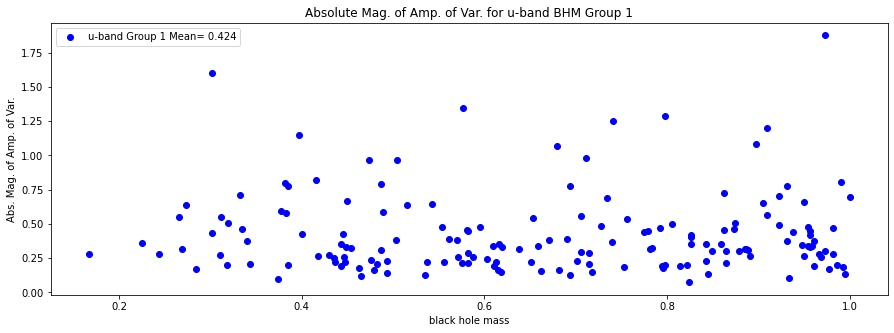

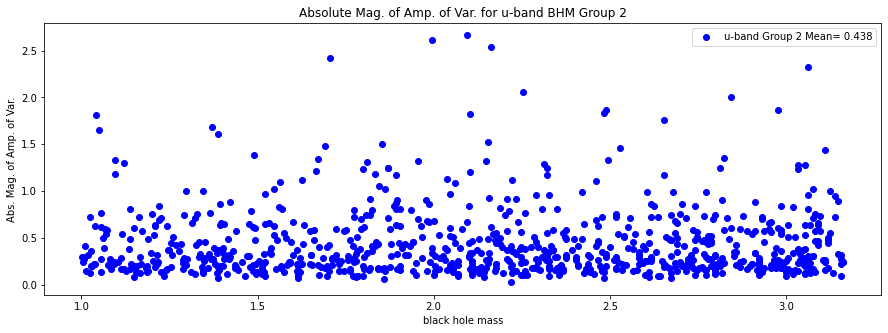

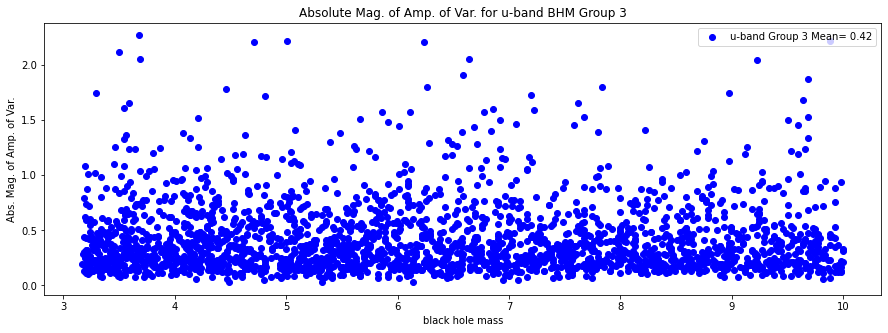

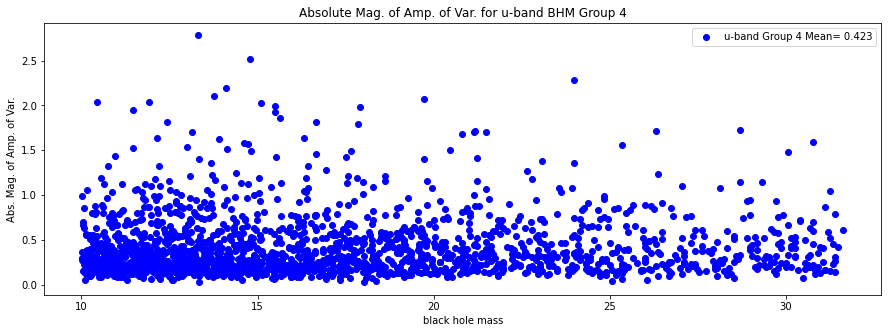

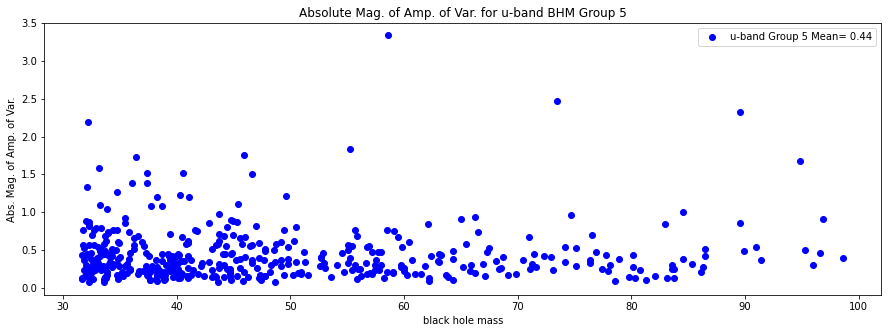

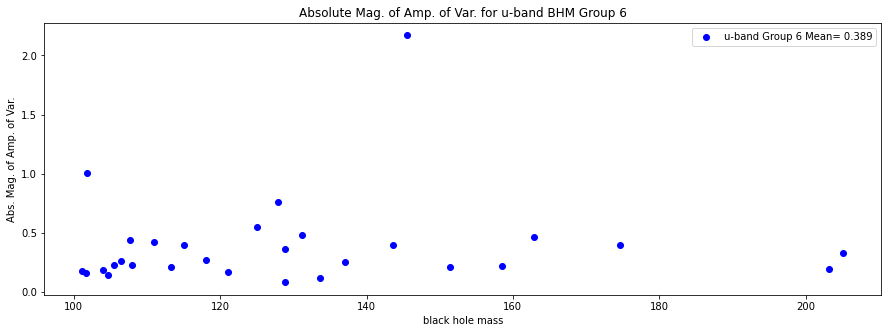

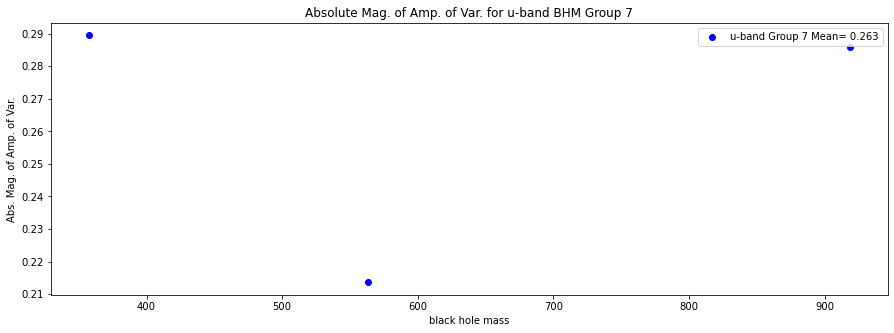

In [107]:
#U-BAND
new_bhm_dict = {datas['Index'][i]: datas['Black Hole Mass'][i] for i in range(len(datas['Index'])) if datas['Black Hole Mass'][i]>0}
new_bhm_dict_keys = []
for i in new_bhm_dict.keys():
    new_bhm_dict_keys.append(i)

clean_bhm = []
for i in bh_masses:
    if i > 0:
        clean_bhm.append(i)
    else:
        pass

cor_units_bhm = []
for i in clean_bhm:
    cor_units_bhm.append((10**i)/(10**8))
    
bhm_dict = {new_bhm_dict_keys[i]: cor_units_bhm[i] for i in range(len(new_bhm_dict_keys))}
bhm_dict_keys = []
bhm_dict_values = []
for i in bhm_dict.keys():
    bhm_dict_keys.append(i)
for i in bhm_dict.values():
    bhm_dict_values.append(i)
#print(len(bhm_dict))
#print(bhm_dict)

new_bhm_dict_uband = {datas['Index'][i]: datas['u amp var'][i] for i in range(len(datas['Index']))}
new_bhm_dict_keys_uband = []
new_bhm_dict_values_uband = []
for i in new_bhm_dict_uband.keys():
    new_bhm_dict_keys_uband.append(i)
for i in new_bhm_dict_uband.values():
    new_bhm_dict_values_uband.append(i)

uband_dict = {}
for i in range(len(bhm_dict_keys)):
    if i in new_bhm_dict_keys_uband and bhm_dict_keys:
        uband_dict[new_bhm_dict_values_uband[i]] = bhm_dict_values[i]

uband_dict_keys = []
uband_dict_values = []
for i in uband_dict.keys():
    uband_dict_keys.append(i)
for i in uband_dict.values():
    uband_dict_values.append(i)
    
bhm_group1_uband = []
bhm_group2_uband = []
bhm_group3_uband = []
bhm_group4_uband = []
bhm_group5_uband = []
bhm_group6_uband = []
bhm_group7_uband = []
uband_group1 = []
uband_group2 = []
uband_group3 = []
uband_group4 = []
uband_group5 = []
uband_group6 = []
uband_group7 = []


for i, j in uband_dict.items():
    if j*(10**8) <= 10**8.0:
        bhm_group1_uband.append(j)
        uband_group1.append(i)
    elif j*(10**8) <= 10**8.5 and j*(10**8) > 10**8.0:
        bhm_group2_uband.append(j)
        uband_group2.append(i)
    elif j*(10**8) <= 10**9 and j*(10**8) > 10**8.5:
        bhm_group3_uband.append(j)
        uband_group3.append(i)
    elif j*(10**8) <= 10**9.5 and j*(10**8) > 10**9.0:
        bhm_group4_uband.append(j)
        uband_group4.append(i)
    elif j*(10**8) <= 10**10.0 and j*(10**8) > 10**9.5:
        bhm_group5_uband.append(j)
        uband_group5.append(i)
    elif j*(10**8) <= 10**10.5 and j*(10**8) > 10**10.0:
        bhm_group6_uband.append(j)
        uband_group6.append(i)
    elif j*(10**8) <= 10**11.0 and j*(10**8) > 10**10.5:
        bhm_group7_uband.append(j)
        uband_group7.append(i)
        

print(str(round(np.mean(uband_group1),4)))
print(str(round(np.mean(uband_group2),4)))
print(str(round(np.mean(uband_group3),4)))
print(str(round(np.mean(uband_group4),4)))
print(str(round(np.mean(uband_group5),4)))
print(str(round(np.mean(uband_group6),4)))
print(str(round(np.mean(uband_group7),4)))

plt.figure(figsize = (15,5))
plt.scatter(bhm_group1_uband, uband_group1, color = 'b', label = 'u-band Group 1 Mean= '+ str(round(np.mean(uband_group1), 3)))
plt.title('Absolute Mag. of Amp. of Var. for u-band BHM Group 1')
plt.xlabel('black hole mass')
plt.ylabel('Abs. Mag. of Amp. of Var.')
plt.legend()

plt.figure(figsize = (15,5))
plt.scatter(bhm_group2_uband, uband_group2, color = 'b', label = 'u-band Group 2 Mean= '+ str(round(np.mean(uband_group2), 3)))
plt.title('Absolute Mag. of Amp. of Var. for u-band BHM Group 2')
plt.xlabel('black hole mass')
plt.ylabel('Abs. Mag. of Amp. of Var.')
plt.legend()

plt.figure(figsize = (15,5))
plt.scatter(bhm_group3_uband, uband_group3, color = 'b', label = 'u-band Group 3 Mean= '+ str(round(np.mean(uband_group3), 3)))
plt.title('Absolute Mag. of Amp. of Var. for u-band BHM Group 3')
plt.xlabel('black hole mass')
plt.ylabel('Abs. Mag. of Amp. of Var.')
plt.legend()

plt.figure(figsize = (15,5))
plt.scatter(bhm_group4_uband, uband_group4, color = 'b', label = 'u-band Group 4 Mean= '+ str(round(np.mean(uband_group4), 3)))
plt.title('Absolute Mag. of Amp. of Var. for u-band BHM Group 4')
plt.xlabel('black hole mass')
plt.ylabel('Abs. Mag. of Amp. of Var.')
plt.legend()

plt.figure(figsize = (15,5))
plt.scatter(bhm_group5_uband, uband_group5, color = 'b', label = 'u-band Group 5 Mean= '+ str(round(np.mean(uband_group5), 3)))
plt.title('Absolute Mag. of Amp. of Var. for u-band BHM Group 5')
plt.xlabel('black hole mass')
plt.ylabel('Abs. Mag. of Amp. of Var.')
plt.legend()

plt.figure(figsize = (15,5))
plt.scatter(bhm_group6_uband, uband_group6, color = 'b', label = 'u-band Group 6 Mean= '+ str(round(np.mean(uband_group6), 3)))
plt.title('Absolute Mag. of Amp. of Var. for u-band BHM Group 6')
plt.xlabel('black hole mass')
plt.ylabel('Abs. Mag. of Amp. of Var.')
plt.legend()

plt.figure(figsize = (15,5))
plt.scatter(bhm_group7_uband, uband_group7, color = 'b', label = 'u-band Group 7 Mean= '+ str(round(np.mean(uband_group7), 3)))
plt.title('Absolute Mag. of Amp. of Var. for u-band BHM Group 7')
plt.xlabel('black hole mass')
plt.ylabel('Abs. Mag. of Amp. of Var.')
plt.legend()

0.3306700518055311
0.34938450271255067
0.3398876110802885
0.3439655480743073
0.3482032223171732
0.26152130925897166
0.2676185042978489


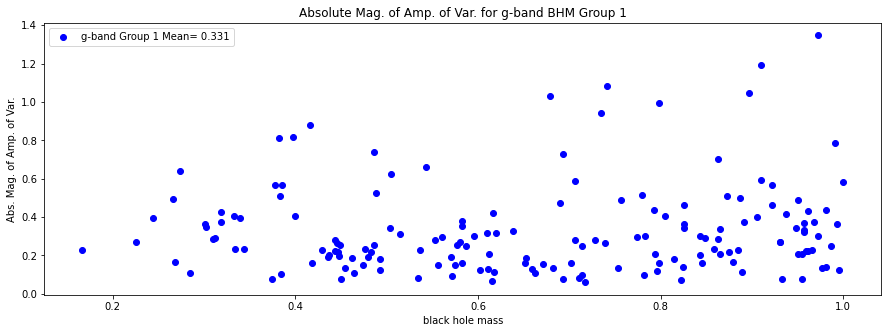

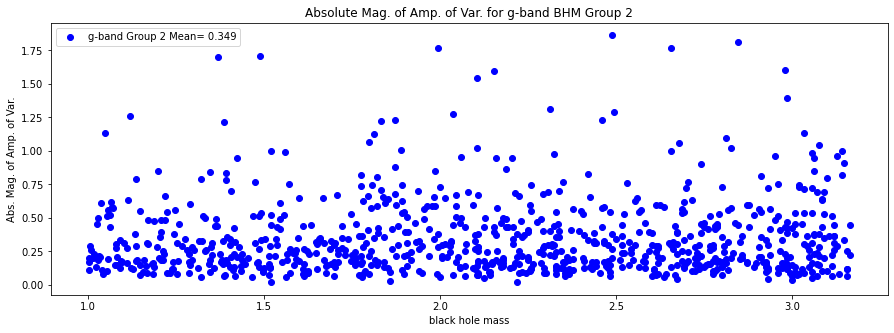

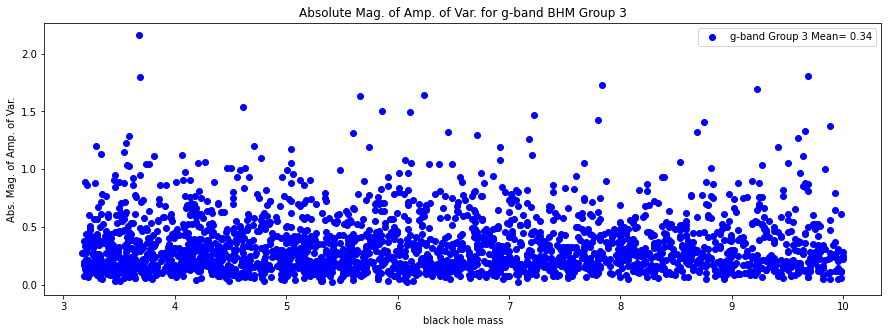

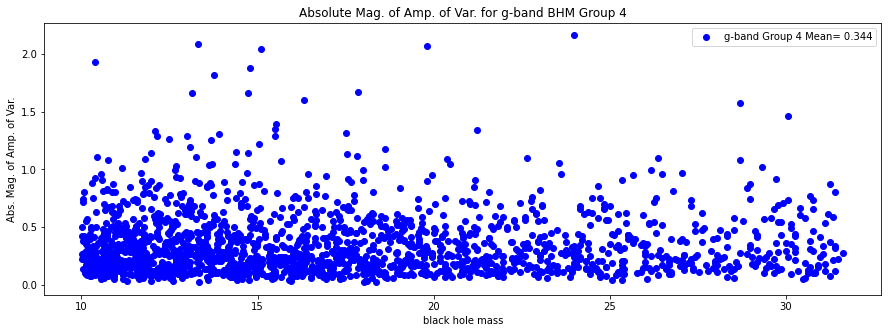

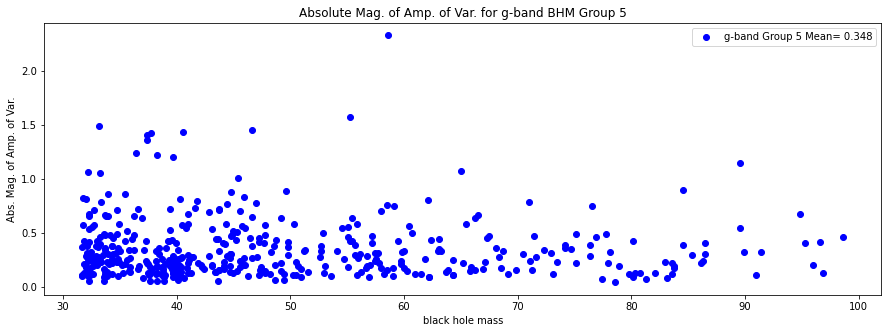

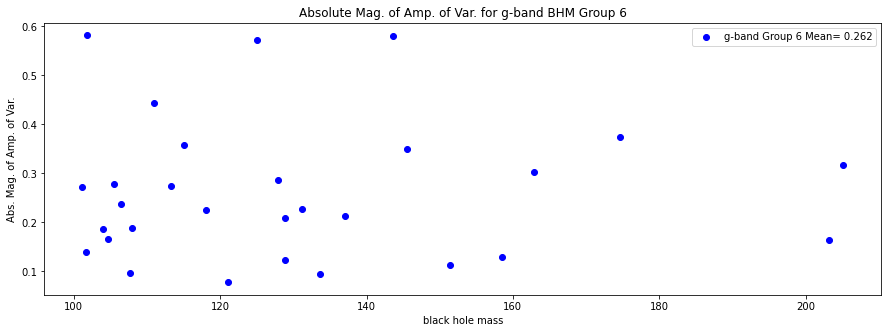

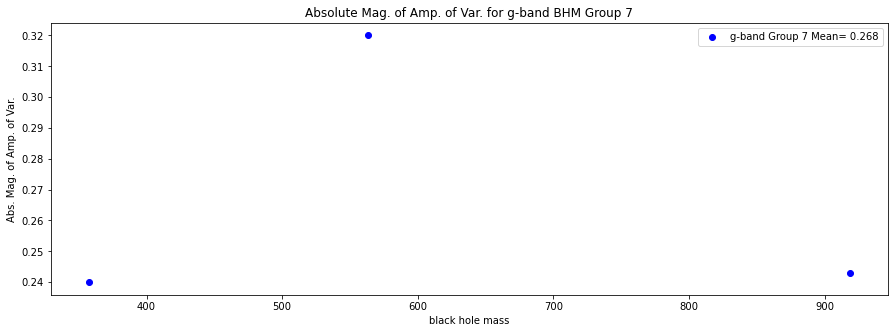

In [24]:
#G-BAND
new_bhm_dict = {datas['Index'][i]: datas['Black Hole Mass'][i] for i in range(len(datas['Index'])) if datas['Black Hole Mass'][i]>0}
new_bhm_dict_keys = []
for i in new_bhm_dict.keys():
    new_bhm_dict_keys.append(i)

clean_bhm = []
for i in bh_masses:
    if i > 0:
        clean_bhm.append(i)
    else:
        pass

cor_units_bhm = []
for i in clean_bhm:
    cor_units_bhm.append((10**i)/(10**8))
    
bhm_dict = {new_bhm_dict_keys[i]: cor_units_bhm[i] for i in range(len(new_bhm_dict_keys))}
bhm_dict_keys = []
bhm_dict_values = []
for i in bhm_dict.keys():
    bhm_dict_keys.append(i)
for i in bhm_dict.values():
    bhm_dict_values.append(i)
#print(len(bhm_dict))
#print(bhm_dict)

new_bhm_dict_gband = {datas['Index'][i]: datas['g amp var'][i] for i in range(len(datas['Index']))}
new_bhm_dict_keys_gband = []
new_bhm_dict_values_gband = []
for i in new_bhm_dict_gband.keys():
    new_bhm_dict_keys_gband.append(i)
for i in new_bhm_dict_gband.values():
    new_bhm_dict_values_gband.append(i)

gband_dict = {}
for i in range(len(bhm_dict_keys)):
    if i in new_bhm_dict_keys_gband and bhm_dict_keys:
        gband_dict[new_bhm_dict_values_gband[i]] = bhm_dict_values[i]

gband_dict_keys = []
gband_dict_values = []
for i in gband_dict.keys():
    gband_dict_keys.append(i)
for i in gband_dict.values():
    gband_dict_values.append(i)
    
bhm_group1_gband = []
bhm_group2_gband = []
bhm_group3_gband = []
bhm_group4_gband = []
bhm_group5_gband = []
bhm_group6_gband = []
bhm_group7_gband = []
gband_group1 = []
gband_group2 = []
gband_group3 = []
gband_group4 = []
gband_group5 = []
gband_group6 = []
gband_group7 = []


for i, j in gband_dict.items():
    if j*(10**8) <= 10**8.0:
        bhm_group1_gband.append(j)
        gband_group1.append(i)
    elif j*(10**8) <= 10**8.5 and j*(10**8) > 10**8.0:
        bhm_group2_gband.append(j)
        gband_group2.append(i)
    elif j*(10**8) <= 10**9 and j*(10**8) > 10**8.5:
        bhm_group3_gband.append(j)
        gband_group3.append(i)
    elif j*(10**8) <= 10**9.5 and j*(10**8) > 10**9.0:
        bhm_group4_gband.append(j)
        gband_group4.append(i)
    elif j*(10**8) <= 10**10.0 and j*(10**8) > 10**9.5:
        bhm_group5_gband.append(j)
        gband_group5.append(i)
    elif j*(10**8) <= 10**10.5 and j*(10**8) > 10**10.0:
        bhm_group6_gband.append(j)
        gband_group6.append(i)
    elif j*(10**8) <= 10**11.0 and j*(10**8) > 10**10.5:
        bhm_group7_gband.append(j)
        gband_group7.append(i)

print(np.mean(gband_group1))
print(np.mean(gband_group2))
print(np.mean(gband_group3))
print(np.mean(gband_group4))
print(np.mean(gband_group5))
print(np.mean(gband_group6))
print(np.mean(gband_group7))
        
plt.figure(figsize = (15,5))
plt.scatter(bhm_group1_gband, gband_group1, color = 'b', label = 'g-band Group 1 Mean= '+ str(round(np.mean(gband_group1), 3)))
plt.title('Absolute Mag. of Amp. of Var. for g-band BHM Group 1')
plt.xlabel('black hole mass')
plt.ylabel('Abs. Mag. of Amp. of Var.')
plt.legend()

plt.figure(figsize = (15,5))
plt.scatter(bhm_group2_gband, gband_group2, color = 'b', label = 'g-band Group 2 Mean= '+ str(round(np.mean(gband_group2), 3)))
plt.title('Absolute Mag. of Amp. of Var. for g-band BHM Group 2')
plt.xlabel('black hole mass')
plt.ylabel('Abs. Mag. of Amp. of Var.')
plt.legend()

plt.figure(figsize = (15,5))
plt.scatter(bhm_group3_gband, gband_group3, color = 'b', label = 'g-band Group 3 Mean= '+ str(round(np.mean(gband_group3), 3)))
plt.title('Absolute Mag. of Amp. of Var. for g-band BHM Group 3')
plt.xlabel('black hole mass')
plt.ylabel('Abs. Mag. of Amp. of Var.')
plt.legend()

plt.figure(figsize = (15,5))
plt.scatter(bhm_group4_gband, gband_group4, color = 'b', label = 'g-band Group 4 Mean= '+ str(round(np.mean(gband_group4), 3)))
plt.title('Absolute Mag. of Amp. of Var. for g-band BHM Group 4')
plt.xlabel('black hole mass')
plt.ylabel('Abs. Mag. of Amp. of Var.')
plt.legend()

plt.figure(figsize = (15,5))
plt.scatter(bhm_group5_gband, gband_group5, color = 'b', label = 'g-band Group 5 Mean= '+ str(round(np.mean(gband_group5), 3)))
plt.title('Absolute Mag. of Amp. of Var. for g-band BHM Group 5')
plt.xlabel('black hole mass')
plt.ylabel('Abs. Mag. of Amp. of Var.')
plt.legend()

plt.figure(figsize = (15,5))
plt.scatter(bhm_group6_gband, gband_group6, color = 'b', label = 'g-band Group 6 Mean= '+ str(round(np.mean(gband_group6), 3)))
plt.title('Absolute Mag. of Amp. of Var. for g-band BHM Group 6')
plt.xlabel('black hole mass')
plt.ylabel('Abs. Mag. of Amp. of Var.')
plt.legend()

plt.figure(figsize = (15,5))
plt.scatter(bhm_group7_gband, gband_group7, color = 'b', label = 'g-band Group 7 Mean= '+ str(round(np.mean(gband_group7), 3)))
plt.title('Absolute Mag. of Amp. of Var. for g-band BHM Group 7')
plt.xlabel('black hole mass')
plt.ylabel('Abs. Mag. of Amp. of Var.')
plt.legend()

0.29579509920829394
0.3267594515762994
0.3118143240205863
0.31631248038719756
0.3196509022162688
0.2219208273451348
0.26292046520085927


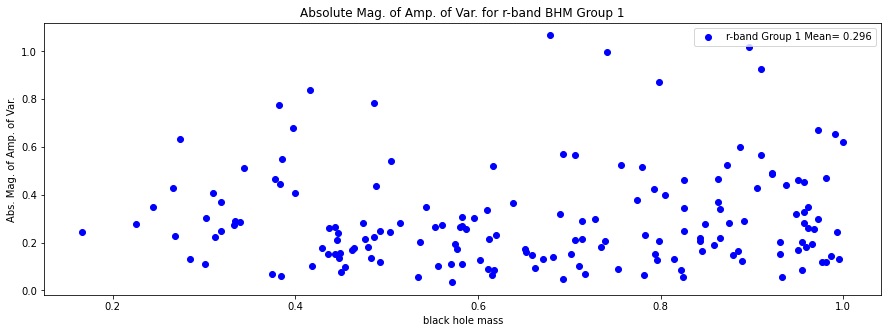

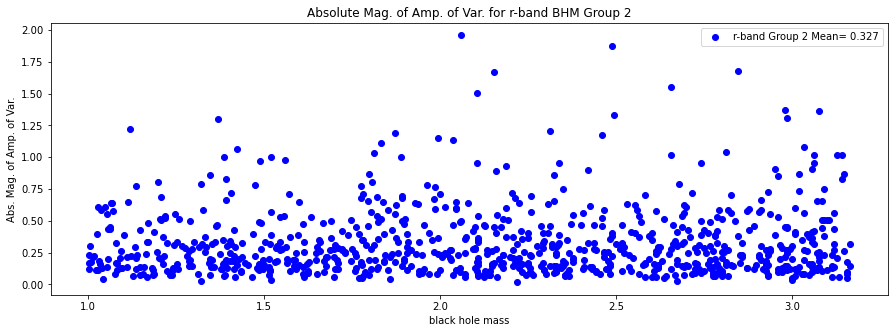

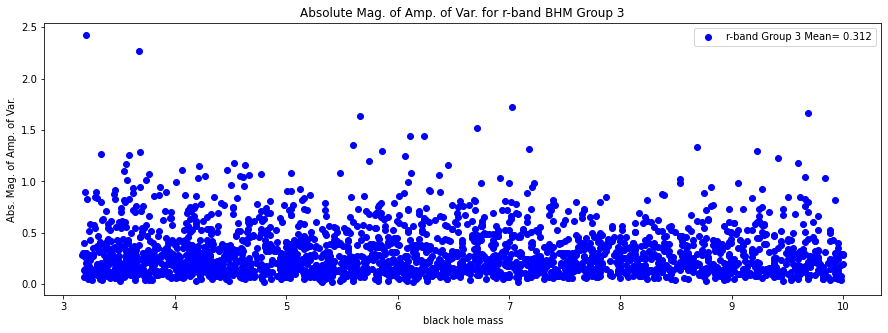

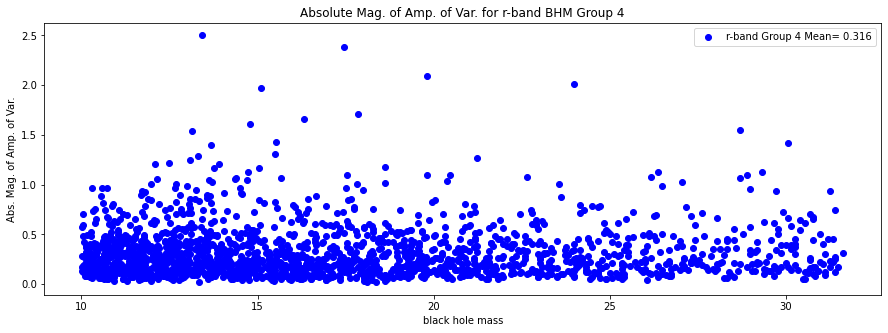

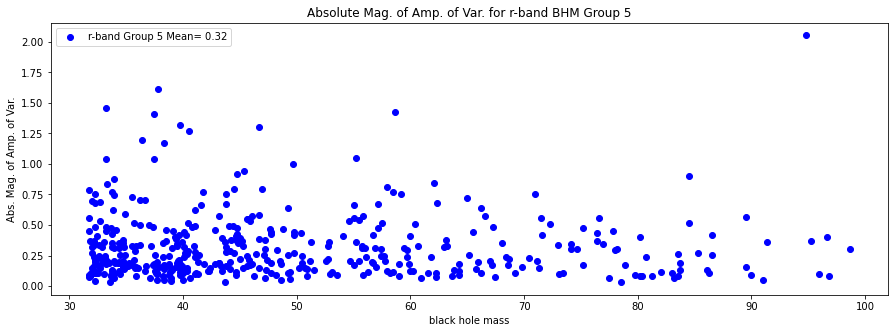

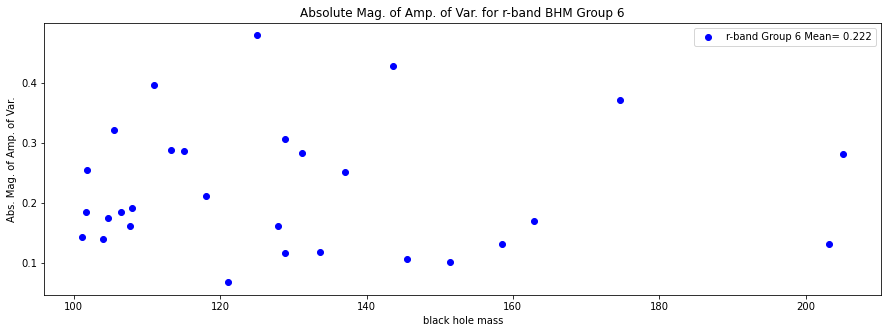

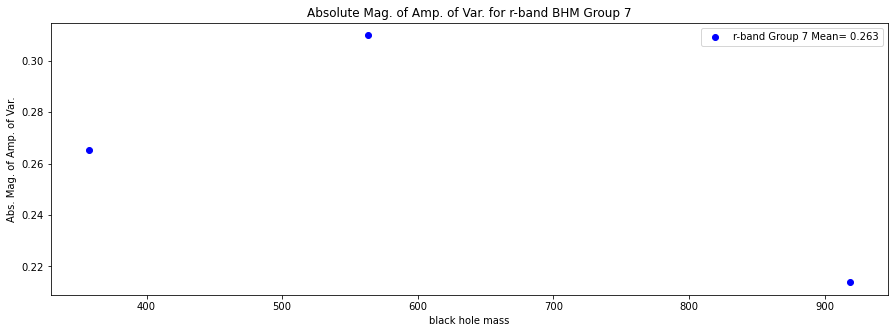

In [25]:
#R-BAND
new_bhm_dict = {datas['Index'][i]: datas['Black Hole Mass'][i] for i in range(len(datas['Index'])) if datas['Black Hole Mass'][i]>0}
new_bhm_dict_keys = []
for i in new_bhm_dict.keys():
    new_bhm_dict_keys.append(i)

clean_bhm = []
for i in bh_masses:
    if i > 0:
        clean_bhm.append(i)
    else:
        pass

cor_units_bhm = []
for i in clean_bhm:
    cor_units_bhm.append((10**i)/(10**8))
    
bhm_dict = {new_bhm_dict_keys[i]: cor_units_bhm[i] for i in range(len(new_bhm_dict_keys))}
bhm_dict_keys = []
bhm_dict_values = []
for i in bhm_dict.keys():
    bhm_dict_keys.append(i)
for i in bhm_dict.values():
    bhm_dict_values.append(i)
#print(len(bhm_dict))
#print(bhm_dict)

new_bhm_dict_rband = {datas['Index'][i]: datas['r amp var'][i] for i in range(len(datas['Index']))}
new_bhm_dict_keys_rband = []
new_bhm_dict_values_rband = []
for i in new_bhm_dict_rband.keys():
    new_bhm_dict_keys_rband.append(i)
for i in new_bhm_dict_rband.values():
    new_bhm_dict_values_rband.append(i)

rband_dict = {}
for i in range(len(bhm_dict_keys)):
    if i in new_bhm_dict_keys_rband and bhm_dict_keys:
        rband_dict[new_bhm_dict_values_rband[i]] = bhm_dict_values[i]

rband_dict_keys = []
rband_dict_values = []
for i in rband_dict.keys():
    rband_dict_keys.append(i)
for i in rband_dict.values():
    rband_dict_values.append(i)
    
bhm_group1_rband = []
bhm_group2_rband = []
bhm_group3_rband = []
bhm_group4_rband = []
bhm_group5_rband = []
bhm_group6_rband = []
bhm_group7_rband = []
rband_group1 = []
rband_group2 = []
rband_group3 = []
rband_group4 = []
rband_group5 = []
rband_group6 = []
rband_group7 = []


for i, j in rband_dict.items():
    if j*(10**8) <= 10**8.0:
        bhm_group1_rband.append(j)
        rband_group1.append(i)
    elif j*(10**8) <= 10**8.5 and j*(10**8) > 10**8.0:
        bhm_group2_rband.append(j)
        rband_group2.append(i)
    elif j*(10**8) <= 10**9 and j*(10**8) > 10**8.5:
        bhm_group3_rband.append(j)
        rband_group3.append(i)
    elif j*(10**8) <= 10**9.5 and j*(10**8) > 10**9.0:
        bhm_group4_rband.append(j)
        rband_group4.append(i)
    elif j*(10**8) <= 10**10.0 and j*(10**8) > 10**9.5:
        bhm_group5_rband.append(j)
        rband_group5.append(i)
    elif j*(10**8) <= 10**10.5 and j*(10**8) > 10**10.0:
        bhm_group6_rband.append(j)
        rband_group6.append(i)
    elif j*(10**8) <= 10**11.0 and j*(10**8) > 10**10.5:
        bhm_group7_rband.append(j)
        rband_group7.append(i)
        
print(np.mean(rband_group1))
print(np.mean(rband_group2))
print(np.mean(rband_group3))
print(np.mean(rband_group4))
print(np.mean(rband_group5))
print(np.mean(rband_group6))
print(np.mean(rband_group7))        
plt.figure(figsize = (15,5))
plt.scatter(bhm_group1_rband, rband_group1, color = 'b', label = 'r-band Group 1 Mean= '+ str(round(np.mean(rband_group1), 3)))
plt.title('Absolute Mag. of Amp. of Var. for r-band BHM Group 1')
plt.xlabel('black hole mass')
plt.ylabel('Abs. Mag. of Amp. of Var.')
plt.legend()

plt.figure(figsize = (15,5))
plt.scatter(bhm_group2_rband, rband_group2, color = 'b', label = 'r-band Group 2 Mean= '+ str(round(np.mean(rband_group2), 3)))
plt.title('Absolute Mag. of Amp. of Var. for r-band BHM Group 2')
plt.xlabel('black hole mass')
plt.ylabel('Abs. Mag. of Amp. of Var.')
plt.legend()

plt.figure(figsize = (15,5))
plt.scatter(bhm_group3_rband, rband_group3, color = 'b', label = 'r-band Group 3 Mean= '+ str(round(np.mean(rband_group3), 3)))
plt.title('Absolute Mag. of Amp. of Var. for r-band BHM Group 3')
plt.xlabel('black hole mass')
plt.ylabel('Abs. Mag. of Amp. of Var.')
plt.legend()

plt.figure(figsize = (15,5))
plt.scatter(bhm_group4_rband, rband_group4, color = 'b', label = 'r-band Group 4 Mean= '+ str(round(np.mean(rband_group4), 3)))
plt.title('Absolute Mag. of Amp. of Var. for r-band BHM Group 4')
plt.xlabel('black hole mass')
plt.ylabel('Abs. Mag. of Amp. of Var.')
plt.legend()

plt.figure(figsize = (15,5))
plt.scatter(bhm_group5_rband, rband_group5, color = 'b', label = 'r-band Group 5 Mean= '+ str(round(np.mean(rband_group5), 3)))
plt.title('Absolute Mag. of Amp. of Var. for r-band BHM Group 5')
plt.xlabel('black hole mass')
plt.ylabel('Abs. Mag. of Amp. of Var.')
plt.legend()

plt.figure(figsize = (15,5))
plt.scatter(bhm_group6_rband, rband_group6, color = 'b', label = 'r-band Group 6 Mean= '+ str(round(np.mean(rband_group6), 3)))
plt.title('Absolute Mag. of Amp. of Var. for r-band BHM Group 6')
plt.xlabel('black hole mass')
plt.ylabel('Abs. Mag. of Amp. of Var.')
plt.legend()

plt.figure(figsize = (15,5))
plt.scatter(bhm_group7_rband, rband_group7, color = 'b', label = 'r-band Group 7 Mean= '+ str(round(np.mean(rband_group7), 3)))
plt.title('Absolute Mag. of Amp. of Var. for r-band BHM Group 7')
plt.xlabel('black hole mass')
plt.ylabel('Abs. Mag. of Amp. of Var.')
plt.legend()

0.2896290489762844
0.31932246065835385
0.30224516943175295
0.3075352201886936
0.3106354062836615
0.22086229806799176
0.256479200709534


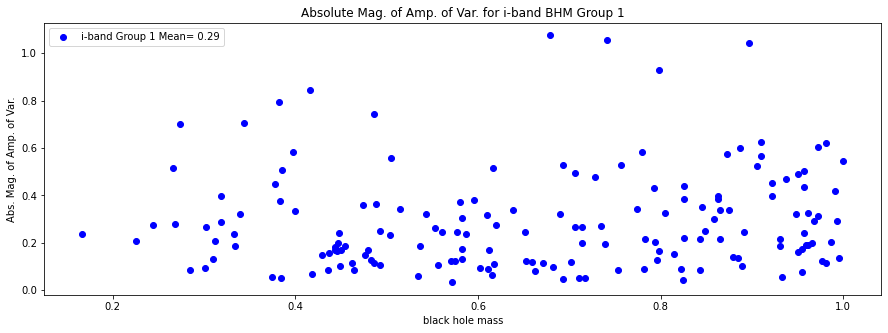

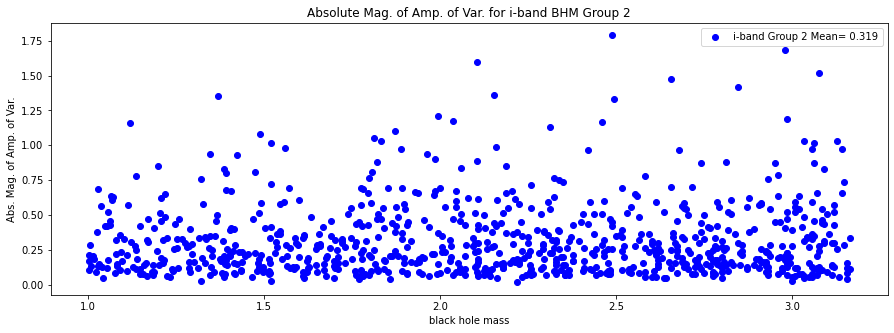

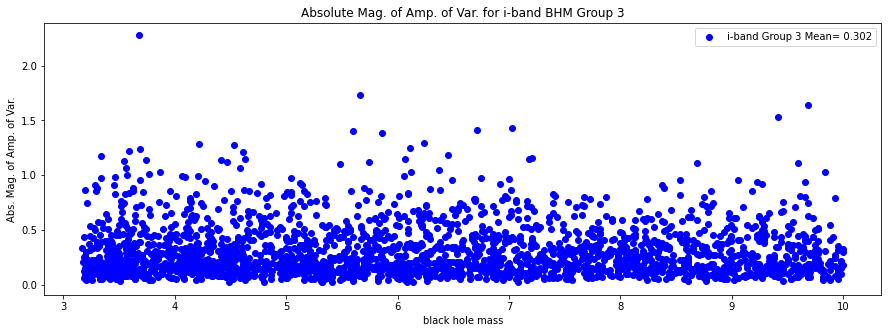

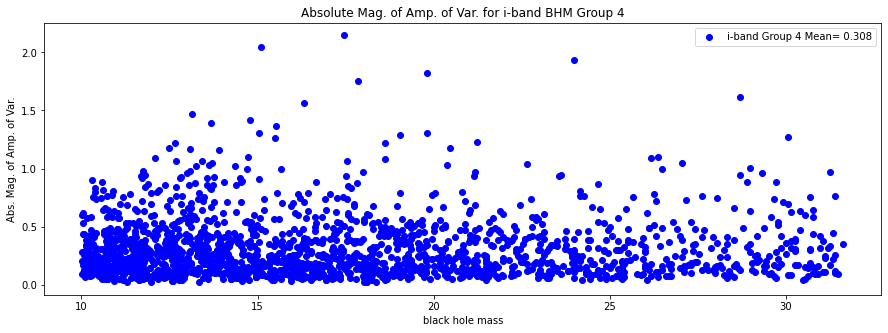

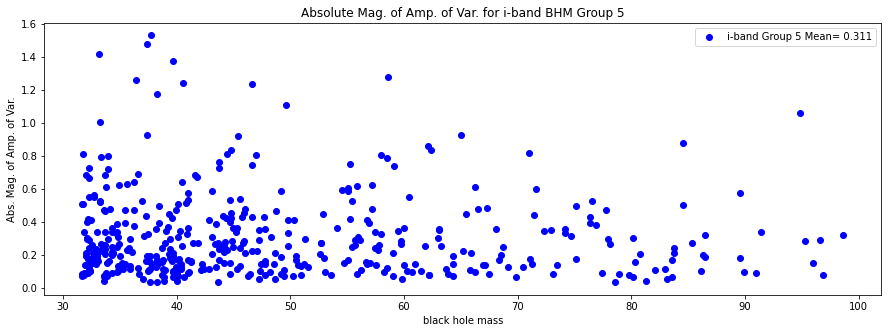

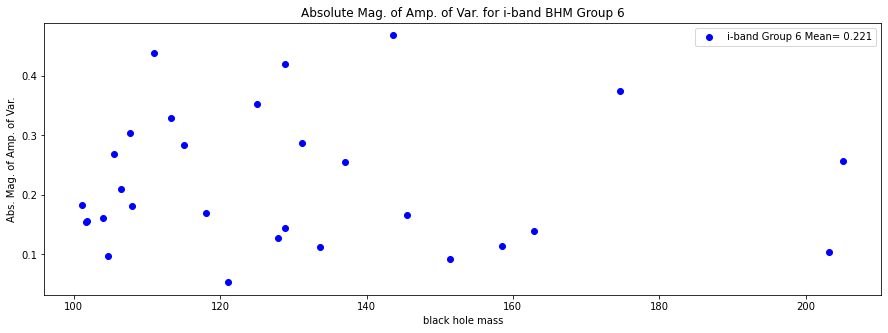

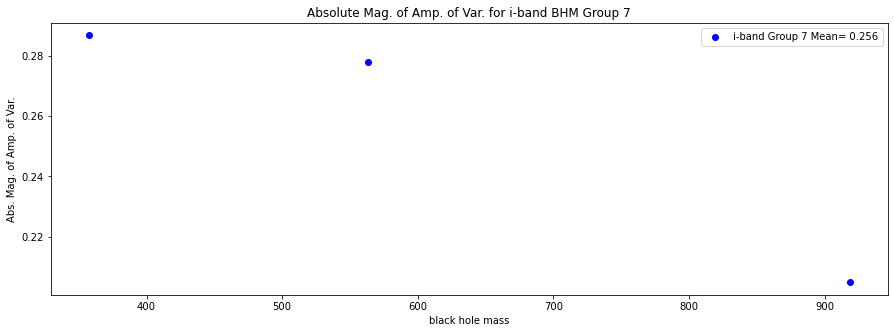

In [26]:
#i-band
new_bhm_dict = {datas['Index'][i]: datas['Black Hole Mass'][i] for i in range(len(datas['Index'])) if datas['Black Hole Mass'][i]>0}
new_bhm_dict_keys = []
for i in new_bhm_dict.keys():
    new_bhm_dict_keys.append(i)

clean_bhm = []
for i in bh_masses:
    if i > 0:
        clean_bhm.append(i)
    else:
        pass

cor_units_bhm = []
for i in clean_bhm:
    cor_units_bhm.append((10**i)/(10**8))
    
bhm_dict = {new_bhm_dict_keys[i]: cor_units_bhm[i] for i in range(len(new_bhm_dict_keys))}
bhm_dict_keys = []
bhm_dict_values = []
for i in bhm_dict.keys():
    bhm_dict_keys.append(i)
for i in bhm_dict.values():
    bhm_dict_values.append(i)
#print(len(bhm_dict))
#print(bhm_dict)

new_bhm_dict_iband = {datas['Index'][i]: datas['i amp var'][i] for i in range(len(datas['Index']))}
new_bhm_dict_keys_iband = []
new_bhm_dict_values_iband = []
for i in new_bhm_dict_iband.keys():
    new_bhm_dict_keys_iband.append(i)
for i in new_bhm_dict_iband.values():
    new_bhm_dict_values_iband.append(i)

iband_dict = {}
for i in range(len(bhm_dict_keys)):
    if i in new_bhm_dict_keys_iband and bhm_dict_keys:
        iband_dict[new_bhm_dict_values_iband[i]] = bhm_dict_values[i]

iband_dict_keys = []
iband_dict_values = []
for i in iband_dict.keys():
    iband_dict_keys.append(i)
for i in iband_dict.values():
    iband_dict_values.append(i)
    
bhm_group1_iband = []
bhm_group2_iband = []
bhm_group3_iband = []
bhm_group4_iband = []
bhm_group5_iband = []
bhm_group6_iband = []
bhm_group7_iband = []
iband_group1 = []
iband_group2 = []
iband_group3 = []
iband_group4 = []
iband_group5 = []
iband_group6 = []
iband_group7 = []


for i, j in iband_dict.items():
    if j*(10**8) <= 10**8.0:
        bhm_group1_iband.append(j)
        iband_group1.append(i)
    elif j*(10**8) <= 10**8.5 and j*(10**8) > 10**8.0:
        bhm_group2_iband.append(j)
        iband_group2.append(i)
    elif j*(10**8) <= 10**9 and j*(10**8) > 10**8.5:
        bhm_group3_iband.append(j)
        iband_group3.append(i)
    elif j*(10**8) <= 10**9.5 and j*(10**8) > 10**9.0:
        bhm_group4_iband.append(j)
        iband_group4.append(i)
    elif j*(10**8) <= 10**10.0 and j*(10**8) > 10**9.5:
        bhm_group5_iband.append(j)
        iband_group5.append(i)
    elif j*(10**8) <= 10**10.5 and j*(10**8) > 10**10.0:
        bhm_group6_iband.append(j)
        iband_group6.append(i)
    elif j*(10**8) <= 10**11.0 and j*(10**8) > 10**10.5:
        bhm_group7_iband.append(j)
        iband_group7.append(i)
        
print(np.mean(iband_group1))
print(np.mean(iband_group2))
print(np.mean(iband_group3))
print(np.mean(iband_group4))
print(np.mean(iband_group5))
print(np.mean(iband_group6))
print(np.mean(iband_group7))

plt.figure(figsize = (15,5))
plt.scatter(bhm_group1_iband, iband_group1, color = 'b', label = 'i-band Group 1 Mean= '+ str(round(np.mean(iband_group1), 3)))
plt.title('Absolute Mag. of Amp. of Var. for i-band BHM Group 1')
plt.xlabel('black hole mass')
plt.ylabel('Abs. Mag. of Amp. of Var.')
plt.legend()

plt.figure(figsize = (15,5))
plt.scatter(bhm_group2_iband, iband_group2, color = 'b', label = 'i-band Group 2 Mean= '+ str(round(np.mean(iband_group2), 3)))
plt.title('Absolute Mag. of Amp. of Var. for i-band BHM Group 2')
plt.xlabel('black hole mass')
plt.ylabel('Abs. Mag. of Amp. of Var.')
plt.legend()

plt.figure(figsize = (15,5))
plt.scatter(bhm_group3_iband, iband_group3, color = 'b', label = 'i-band Group 3 Mean= '+ str(round(np.mean(iband_group3), 3)))
plt.title('Absolute Mag. of Amp. of Var. for i-band BHM Group 3')
plt.xlabel('black hole mass')
plt.ylabel('Abs. Mag. of Amp. of Var.')
plt.legend()

plt.figure(figsize = (15,5))
plt.scatter(bhm_group4_iband, iband_group4, color = 'b', label = 'i-band Group 4 Mean= '+ str(round(np.mean(iband_group4), 3)))
plt.title('Absolute Mag. of Amp. of Var. for i-band BHM Group 4')
plt.xlabel('black hole mass')
plt.ylabel('Abs. Mag. of Amp. of Var.')
plt.legend()

plt.figure(figsize = (15,5))
plt.scatter(bhm_group5_iband, iband_group5, color = 'b', label = 'i-band Group 5 Mean= '+ str(round(np.mean(iband_group5), 3)))
plt.title('Absolute Mag. of Amp. of Var. for i-band BHM Group 5')
plt.xlabel('black hole mass')
plt.ylabel('Abs. Mag. of Amp. of Var.')
plt.legend()

plt.figure(figsize = (15,5))
plt.scatter(bhm_group6_iband, iband_group6, color = 'b', label = 'i-band Group 6 Mean= '+ str(round(np.mean(iband_group6), 3)))
plt.title('Absolute Mag. of Amp. of Var. for i-band BHM Group 6')
plt.xlabel('black hole mass')
plt.ylabel('Abs. Mag. of Amp. of Var.')
plt.legend()

plt.figure(figsize = (15,5))
plt.scatter(bhm_group7_iband, iband_group7, color = 'b', label = 'i-band Group 7 Mean= '+ str(round(np.mean(iband_group7), 3)))
plt.title('Absolute Mag. of Amp. of Var. for i-band BHM Group 7')
plt.xlabel('black hole mass')
plt.ylabel('Abs. Mag. of Amp. of Var.')
plt.legend()

0.3101331873450938
0.33430190759307515
0.32189871577664414
0.32301134550877714
0.3280054010202507
0.2566781007304911
0.23967411471976405


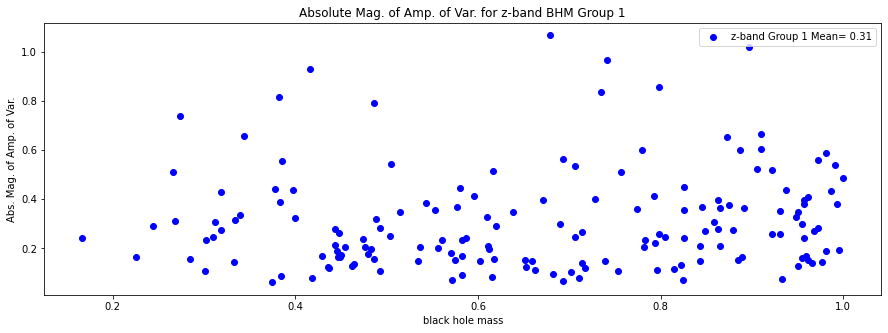

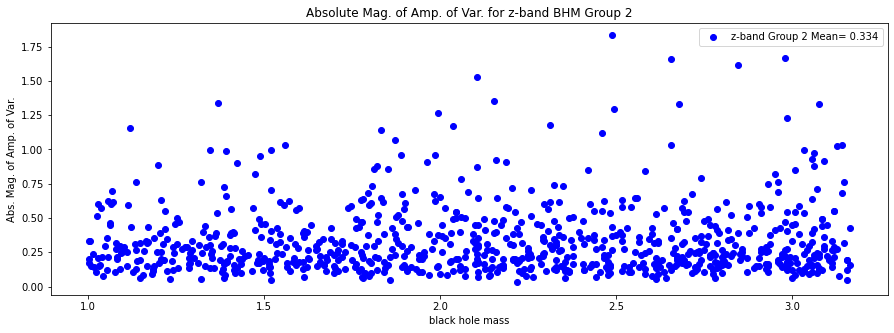

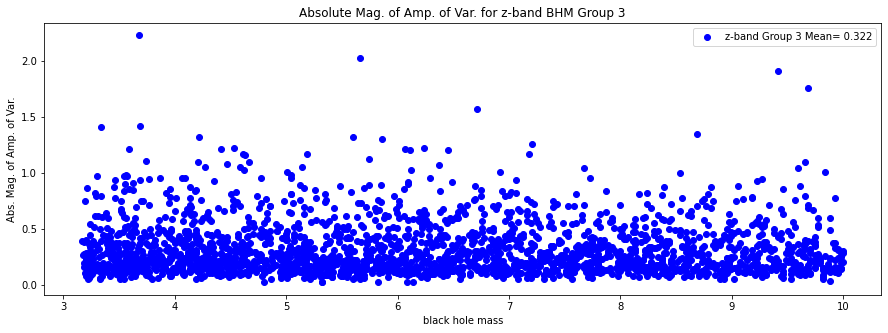

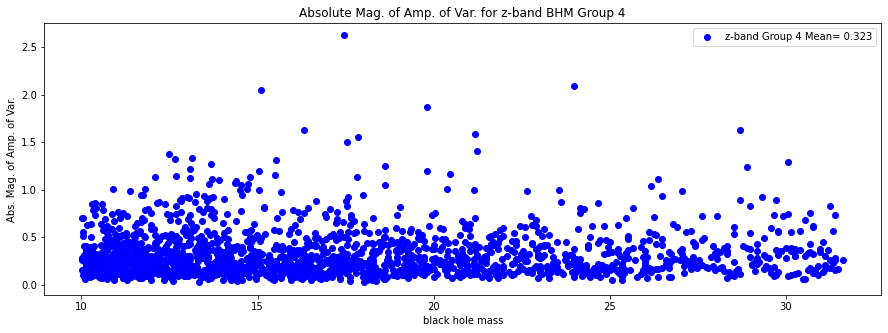

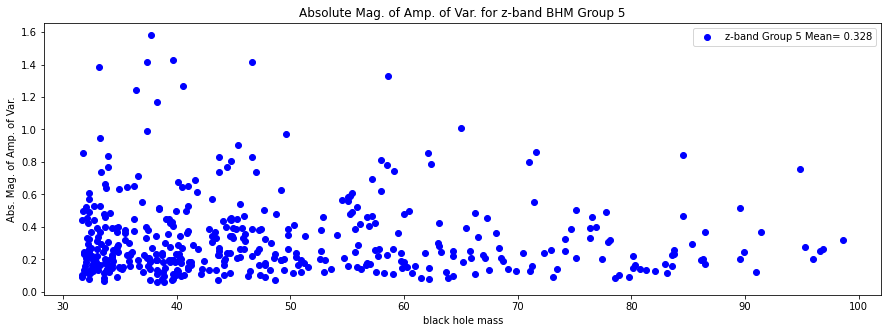

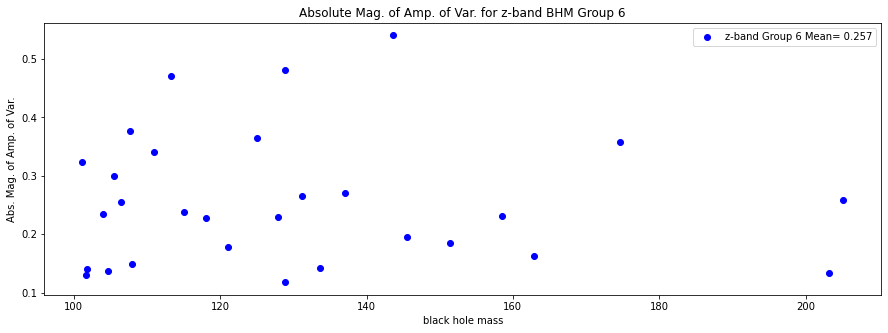

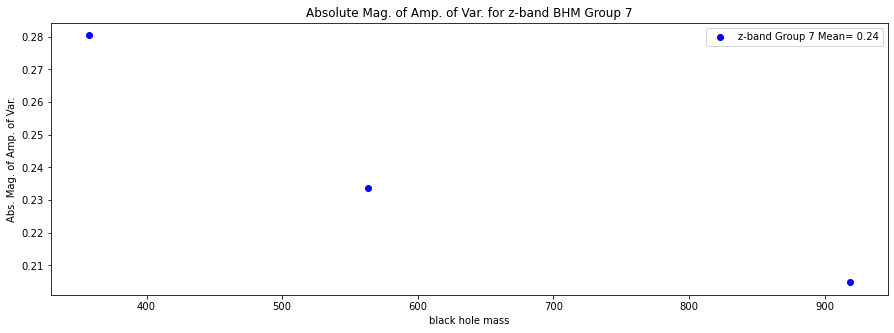

In [27]:
#z-band
new_bhm_dict = {datas['Index'][i]: datas['Black Hole Mass'][i] for i in range(len(datas['Index'])) if datas['Black Hole Mass'][i]>0}
new_bhm_dict_keys = []
for i in new_bhm_dict.keys():
    new_bhm_dict_keys.append(i)

clean_bhm = []
for i in bh_masses:
    if i > 0:
        clean_bhm.append(i)
    else:
        pass

cor_units_bhm = []
for i in clean_bhm:
    cor_units_bhm.append((10**i)/(10**8))
    
bhm_dict = {new_bhm_dict_keys[i]: cor_units_bhm[i] for i in range(len(new_bhm_dict_keys))}
bhm_dict_keys = []
bhm_dict_values = []
for i in bhm_dict.keys():
    bhm_dict_keys.append(i)
for i in bhm_dict.values():
    bhm_dict_values.append(i)
#print(len(bhm_dict))
#print(bhm_dict)

new_bhm_dict_zband = {datas['Index'][i]: datas['z amp var'][i] for i in range(len(datas['Index']))}
new_bhm_dict_keys_zband = []
new_bhm_dict_values_zband = []
for i in new_bhm_dict_zband.keys():
    new_bhm_dict_keys_zband.append(i)
for i in new_bhm_dict_zband.values():
    new_bhm_dict_values_zband.append(i)

zband_dict = {}
for i in range(len(bhm_dict_keys)):
    if i in new_bhm_dict_keys_zband and bhm_dict_keys:
        zband_dict[new_bhm_dict_values_zband[i]] = bhm_dict_values[i]

zband_dict_keys = []
zband_dict_values = []
for i in zband_dict.keys():
    zband_dict_keys.append(i)
for i in zband_dict.values():
    zband_dict_values.append(i)
    
bhm_group1_zband = []
bhm_group2_zband = []
bhm_group3_zband = []
bhm_group4_zband = []
bhm_group5_zband = []
bhm_group6_zband = []
bhm_group7_zband = []
zband_group1 = []
zband_group2 = []
zband_group3 = []
zband_group4 = []
zband_group5 = []
zband_group6 = []
zband_group7 = []


for i, j in zband_dict.items():
    if j*(10**8) <= 10**8.0:
        bhm_group1_zband.append(j)
        zband_group1.append(i)
    elif j*(10**8) <= 10**8.5 and j*(10**8) > 10**8.0:
        bhm_group2_zband.append(j)
        zband_group2.append(i)
    elif j*(10**8) <= 10**9 and j*(10**8) > 10**8.5:
        bhm_group3_zband.append(j)
        zband_group3.append(i)
    elif j*(10**8) <= 10**9.5 and j*(10**8) > 10**9.0:
        bhm_group4_zband.append(j)
        zband_group4.append(i)
    elif j*(10**8) <= 10**10.0 and j*(10**8) > 10**9.5:
        bhm_group5_zband.append(j)
        zband_group5.append(i)
    elif j*(10**8) <= 10**10.5 and j*(10**8) > 10**10.0:
        bhm_group6_zband.append(j)
        zband_group6.append(i)
    elif j*(10**8) <= 10**11.0 and j*(10**8) > 10**10.5:
        bhm_group7_zband.append(j)
        zband_group7.append(i)
        
print(np.mean(zband_group1))
print(np.mean(zband_group2))
print(np.mean(zband_group3))
print(np.mean(zband_group4))
print(np.mean(zband_group5))
print(np.mean(zband_group6))
print(np.mean(zband_group7))        
plt.figure(figsize = (15,5))
plt.scatter(bhm_group1_zband, zband_group1, color = 'b', label = 'z-band Group 1 Mean= '+ str(round(np.mean(zband_group1), 3)))
plt.title('Absolute Mag. of Amp. of Var. for z-band BHM Group 1')
plt.xlabel('black hole mass')
plt.ylabel('Abs. Mag. of Amp. of Var.')
plt.legend()

plt.figure(figsize = (15,5))
plt.scatter(bhm_group2_zband, zband_group2, color = 'b', label = 'z-band Group 2 Mean= '+ str(round(np.mean(zband_group2), 3)))
plt.title('Absolute Mag. of Amp. of Var. for z-band BHM Group 2')
plt.xlabel('black hole mass')
plt.ylabel('Abs. Mag. of Amp. of Var.')
plt.legend()

plt.figure(figsize = (15,5))
plt.scatter(bhm_group3_zband, zband_group3, color = 'b', label = 'z-band Group 3 Mean= '+ str(round(np.mean(zband_group3), 3)))
plt.title('Absolute Mag. of Amp. of Var. for z-band BHM Group 3')
plt.xlabel('black hole mass')
plt.ylabel('Abs. Mag. of Amp. of Var.')
plt.legend()

plt.figure(figsize = (15,5))
plt.scatter(bhm_group4_zband, zband_group4, color = 'b', label = 'z-band Group 4 Mean= '+ str(round(np.mean(zband_group4), 3)))
plt.title('Absolute Mag. of Amp. of Var. for z-band BHM Group 4')
plt.xlabel('black hole mass')
plt.ylabel('Abs. Mag. of Amp. of Var.')
plt.legend()

plt.figure(figsize = (15,5))
plt.scatter(bhm_group5_zband, zband_group5, color = 'b', label = 'z-band Group 5 Mean= '+ str(round(np.mean(zband_group5), 3)))
plt.title('Absolute Mag. of Amp. of Var. for z-band BHM Group 5')
plt.xlabel('black hole mass')
plt.ylabel('Abs. Mag. of Amp. of Var.')
plt.legend()

plt.figure(figsize = (15,5))
plt.scatter(bhm_group6_zband, zband_group6, color = 'b', label = 'z-band Group 6 Mean= '+ str(round(np.mean(zband_group6), 3)))
plt.title('Absolute Mag. of Amp. of Var. for z-band BHM Group 6')
plt.xlabel('black hole mass')
plt.ylabel('Abs. Mag. of Amp. of Var.')
plt.legend()

plt.figure(figsize = (15,5))
plt.scatter(bhm_group7_zband, zband_group7, color = 'b', label = 'z-band Group 7 Mean= '+ str(round(np.mean(zband_group7), 3)))
plt.title('Absolute Mag. of Amp. of Var. for z-band BHM Group 7')
plt.xlabel('black hole mass')
plt.ylabel('Abs. Mag. of Amp. of Var.')
plt.legend()